<a href="https://colab.research.google.com/github/BrunoMinetti/BootcampAluraDataScienceAplicada2021/blob/main/Bruno_Sanches_ProjetoM%C3%B3dulo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Acidentes de Trânsito Utilizando como Indicadores Dados de Óbitos do DATASUS**
Autor: Bruno Cesar Minetti Sanches<p>
GitHub: https://github.com/BrunoMinetti<p>
Linkedin: https://www.linkedin.com/in/brunocmsanches/<p>

###Breve currículo:<p> 
Gestor de Trânsito | Tecnólogo em Microeletrônica | Estudante de Análise e Desenvolvimento de Sistemas

##Resumo:

O projeto traz informações referentes a segurança viária, levantados através do DATASUS considerando os óbitos em acidentes de transporte no período de 5 anos entre 2014 e 2018, analisando os dados para verificar variações previstas, possíveis causas e politicas públicas que as justifiquem.


##Objetivo:
>No meu projeto, pretendo buscar mais informações referentes a segurança viária, levando em conta os dados relativos a óbitos do DATASUS no período de 5 anos entre 2014 e 2018.<p>
>Vou utilizar conteúdos e dados retirados de conteúdos jornalísticos para tentar justificar os resultados obtidos e se alguma pólitica pública aplicada pode ter contribuído com os resultados.<p>
 
>Os dados em questão utilizam a classificação da organização mundial da saúde - OMS -  Classificação Estatística Internacional de Doenças e Problemas Relacionados com a Saúde - CID 10, a mais recente classificação é a CID 11, porém os dados do DATASUS ainda não a utilizam a época.<p>
 
>Os dados que utilizaremos são os de Acidentes de Trasporte (V01-V99) contidos no capítulo XX - Causas externas de morbilidade e mortalidade.<p>

### Os Acidentes de Transporte são classificados da seguinte forma:

>**-> (V01-V99) Acidentes de transporte:**<p>
- (V01-V09) Pedestre traumatizado em um acidente de transporte<p>
- (V10-V19) Ciclista traumatizado em um acidente de transporte<p>
- (V20-V29) Motociclista traumatizado em um acidente de transporte<p>
- (V30-V39) Ocupante de triciclo motorizado traumatizado em um acidente de  transporte<p>
- (V40-V49) Ocupante de um automóvel traumatizado em um acidente de transporte<p>
- (V50-V59) Ocupante de uma caminhonete traumatizado em um acidente de transporte<p>
- (V60-V69) Ocupante de um veículo de transporte pesado traumatizado em um acidente de transporte<p>
- (V70-V79) Ocupante de um ônibus traumatizado em um acidente de transporte<p>
- (V80-V89) Outros acidentes de transporte terrestre<p>
- (V90-V94) Acidentes de transporte por água<p>
- (V95-V97) Acidentes de transporte aéreo e espacial<p>
- (V98-V99) Outros acidentes de transporte e os não especificados<p>

###Serão objeto de nosso estudo os dados abaixo:<p>

**-> (V01-V99) Acidentes de transporte:**

>- (V01-V09) Pedestre traumatizado em um acidente de transporte
- (V10-V19) Ciclista traumatizado em um acidente de transporte
- (V20-V29) Motociclista traumatizado em um acidente de transporte
- (V40-V49) Ocupante de um automóvel traumatizado em um acidente de transporte
- (V50-V59) Ocupante de uma caminhonete traumatizado em um acidente de - transporte
- (V60-V69) Ocupante de um veículo de transporte pesado traumatizado em um acidente de transporte
- (V70-V79) Ocupante de um ônibus traumatizado em um acidente de transporte

As séries abaixo não são objeto do nosso estudo:
>- (V80-V89) Outros acidentes de transporte terrestre:<p>
Essa classificação envolve acidentes com animais montados, trens, bondes, veículos industriais de serviço e veículos rurais.<p>
- (V90-V94) Acidentes de transporte por água
- (V95-V97) Acidentes de transporte aéreo e espacial
- V98-V99) Outros acidentes de transporte e os não especificados
 
Também iremos desconsiderar os dados relativos a triciclos motorizados, que possuem pouca relevância para o estudo:
>- (V30-V39) Ocupante de triciclo motorizado traumatizado em um acidente de transporte.

##Base de dados:
>Dataframes, dicionários, listas, métodos, funções e códigos acessórios.

## Dados compilados de DATASUS  Tecnologia da Informação a Serviço do SUS:
>- DATASUS: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sim/cnv/ext10uf.def <p>
- Classificação CID 10 de doenças -  https://icd.who.int/browse10/2019/en#/XX <p>
- Classificação oficial OMS no DATASUS: http://www.datasus.gov.br/cid10/v2008/cid10.htm (PÁGINA SE ENCONTRA FORA DO AR).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

##**Filtros**: <p>
>Óbitos p/Ocorrênc por Unidade da Federação e Mês do Óbito
Grupo CID10: Pedestre traumatizado em um acidente de transporte, Ciclista traumatizado em um acidente de transporte, Motociclista traumat em um acidente de transporte, Ocupante triciclo motorizado traumat acid transp, Ocupante automóvel traumat acidente transporte, Ocupante caminhonete traumat acidente transporte, Ocupante veíc transp pesado traumat acid transp, Ocupante ônibus traumat acidente de transporte, Outros acidentes de transporte terrestre, Acidentes de transporte por água, Acidentes de transporte aéreo e espacial, Outros acidentes de transporte e os não especif
Período:2014-2018

In [ ]:
dados_AC_2014_2018_mes = pd.read_csv("/content/drive/MyDrive/DADOS/GrupoCID_2014-2018mes.csv", encoding = "ISO-8859-1", sep=";" ,na_values="-", skipfooter=2)
dados = dados_AC_2014_2018_mes.replace(np.nan, 0)

In [ ]:
dados = dados.set_index('Grupo CID10')

In [ ]:
dadosT = dados.T

In [ ]:
#Função para plotagem de gráficos
def plottar_grafico(serie, grupo, nome, corBarra='#36a3c5', corLinha='#a74444', cor='#36a3c5', posicao=1):
    veiculo = grupo[serie]

    ax = plt.figure(figsize=(22,8)) 
    ax = plt.bar(veiculo.index, veiculo.values, label=f'Óbitos de {nome}', color=corBarra)
    ax = plt.plot(veiculo.index, veiculo.values, label=f'Linha de evolução de óbitos de {nome}', color = corLinha)
    COLOR = cor
    ax = plt.grid(b=True)
    ax = plt.title(f"Acidentes de Trânsito de 2014 a 2018 - {nome}", fontsize=22, color=COLOR, fontweight='bold')
    ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
    ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
    ax = plt.xticks(color = COLOR, rotation = 55, fontsize=16)
    ax = plt.yticks(color = COLOR, fontsize=16)
    ax = plt.ylim((veiculo.values.min()-1),(veiculo.values.max()+10))
    ax = plt.legend(loc=posicao)
    ax = plt.show()
    print()
    print(f'No período tivemos um total de {veiculo.sum()} {nome}, mortos, com uma média de {(veiculo.mean()):.0f} óbitos mensais.')
    print()

##**Filtros:**<p>
>Óbitos p/Ocorrênc por Unidade da Federação segundo Ano/mês do Óbito
Grupo CID10: Pedestre traumatizado em um acidente de transporte, Ciclista traumatizado em um acidente de transporte, Motociclista traumat em um acidente de transporte, Ocupante automóvel traumat acidente transporte, Ocupante caminhonete traumat acidente transporte, Ocupante veíc transp pesado traumat acid transp, Ocupante ônibus traumat acidente de transporte
Período: 2014-2018

In [ ]:
dados_uf_2014_2018_mes = pd.read_csv('/content/drive/MyDrive/DADOS/uf_2014-2018_mes.csv', encoding = "ISO-8859-1", sep=";" ,na_values="-")
dadosUF = dados_uf_2014_2018_mes.replace(np.nan, 0)
dadosUF

In [ ]:
grupoUF = list(dadosUF.columns)

In [ ]:
grupoCID = list(dados_AC_2014_2018_mes["Grupo CID10"])
grupoCID

In [ ]:
grupoUF = list(dadosUF["Unidade da Federação"])

In [ ]:
dadosUF = dadosUF.set_index('Unidade da Federação')

In [ ]:
dadosUFT = dadosUF.T

In [ ]:
grupo1 = [
'(V10-V19) Ciclista traumatizado em um acidente de transporte',
 '(V60-V69) Ocupante de um veículo de transporte pesado traumatizado em um acidente de transporte',
 '(V50-V59) Ocupante de uma caminhonete traumatizado em um acidente de - transporte',
 '(V70-V79) Ocupante de um ônibus traumatizado em um acidente de transporte']

In [ ]:
dadosTgrupo1 = dadosT[grupo1]

In [ ]:
grupo2 = ['(V20-V29) Motociclista traumatizado em um acidente de transporte',
 '(V40-V49) Ocupante de um automóvel traumatizado em um acidente de transporte',
 '(V01-V09) Pedestre traumatizado em um acidente de transporte']

In [ ]:
dadosTgrupo2 = dadosT[grupo2]

In [ ]:
totalObitosAutomoveis = dadosTgrupo2['(V40-V49) Ocupante de um automóvel traumatizado em um acidente de transporte'].sum()
obitosAutomoveisMedia = dadosTgrupo2['(V40-V49) Ocupante de um automóvel traumatizado em um acidente de transporte'].mean()
totalObitosMotocicletas = dadosTgrupo2['(V20-V29) Motociclista traumatizado em um acidente de transporte'].sum()
obitosMotocicletasMedia = dadosTgrupo2['(V20-V29) Motociclista traumatizado em um acidente de transporte'].mean()
print(f'O total de motociclistas mortos no período foi de {totalObitosMotocicletas}, já o total de ocupantes de automóveis mortos foi de {totalObitosAutomoveis}.')
print(f'Em média, {(obitosMotocicletasMedia):.0f} motociclistas perdem suas vidas todos os meses, enquanto o número de ocupantes de automóveis que perdem as vidas todos os meses é de {(obitosAutomoveisMedia):.0f}.')
print(f'A quantidade de motociclistas mortos é {(totalObitosMotocicletas/totalObitosAutomoveis*100):.0f} % maior do que a de ocupantes de automóveis.')

In [ ]:
estados =  [['SP','São Paulo', 'Sudeste', 46289333],
    ['MG','Minas Gerais', 'Sudeste', 21292666],
    ['PR', 'Paraná', 'Sul', 11516840],
    ['BA','Bahia', 'Nordeste', 14930634],
    ['PE','Pernambuco', 'Nordeste', 9616621],
    ['RJ', 'Rio de Janeiro', 'Sudeste', 17366189],
    ['RS', 'Rio Grande do Sul', 'Sul', 11422973],
    ['SC', 'Santa Catarina', 'Sul', 7252502],
    ['CE', 'Ceará', 'Nordeste', 9187103],
    ['GO', 'Goiás', 'Centro-Oeste', 7113540],
    ['MA', 'Maranhão', 'Nordeste', 7114598],
    ['PI', 'Piauí', 'Nordeste', 3281480],
    ['PA', 'Pará', 'Norte', 8690745],
    ['MT', 'Mato Grosso', 'Centro-Oeste', 3526220],
    ['ES', 'Espírito Santo', 'Sudeste', 4064052],
    ['PB', 'Paraíba', 'Nordeste', 4039277],
    ['MS', 'Mato Grosso do Sul', 'Centro-Oeste', 2809394],
    ['TO', 'Tocantins', 'Norte', 1590248],
    ['SE', 'Sergipe', 'Nordeste', 2318822],
    ['RN', 'Rio Grande do Norte', 'Nordeste', 3534165],
    ['DF', 'Distrito Federal', 'Centro-Oeste', 3055149],
    ['AM', 'Amazonas', 'Norte', 4207714],
    ['RO', 'Rondônia', 'Norte', 1796460],
    ['AL', 'Alagoas', 'Nordeste', 3351543], 
    ['RR', 'Roraíma', 'Norte', 631181],
    ['AP', 'Amapá', 'Norte', 861773],
    ['AC', 'Acre', 'Norte', 894470]]

In [ ]:
def buscar_estado(uf):
    estados =  [['SP','São Paulo', 'Sudeste', 46289333],
        ['MG','Minas Gerais', 'Sudeste', 21292666],
        ['PR', 'Paraná', 'Sul', 11516840],
        ['BA','Bahia', 'Nordeste', 14930634],
        ['PE','Pernambuco', 'Nordeste', 9616621],
        ['RJ', 'Rio de Janeiro', 'Sudeste', 17366189],
        ['RS', 'Rio Grande do Sul', 'Sul', 11422973],
        ['SC', 'Santa Catarina', 'Sul', 7252502],
        ['CE', 'Ceará', 'Nordeste', 9187103],
        ['GO', 'Goiás', 'Centro-Oeste', 7113540],
        ['MA', 'Maranhão', 'Nordeste', 7114598],
        ['PI', 'Piauí', 'Nordeste', 3281480],
        ['PA', 'Pará', 'Norte', 8690745],
        ['MT', 'Mato Grosso', 'Centro-Oeste', 3526220],
        ['ES', 'Espírito Santo', 'Sudeste', 4064052],
        ['PB', 'Paraíba', 'Nordeste', 4039277],
        ['MS', 'Mato Grosso do Sul', 'Centro-Oeste', 2809394],
        ['TO', 'Tocantins', 'Norte', 1590248],
        ['SE', 'Sergipe', 'Nordeste', 2318822],
        ['RN', 'Rio Grande do Norte', 'Nordeste', 3534165],
        ['DF', 'Distrito Federal', 'Centro-Oeste', 3055149],
        ['AM', 'Amazonas', 'Norte', 4207714],
        ['RO', 'Rondônia', 'Norte', 1796460],
        ['AL', 'Alagoas', 'Nordeste', 3351543], 
        ['RR', 'Roraíma', 'Norte', 631181],
        ['AP', 'Amapá', 'Norte', 861773],
        ['AC', 'Acre', 'Norte', 894470]]
    for estado in estados:
        if (uf == estado[0]):
            return (estado)

In [ ]:
def taxa100mil (uf):
    return dadosUFT[uf][:-1].sum() / buscar_estado(uf)[3] * 100000

In [ ]:
def relatorio_estado (uf):

    estado = buscar_estado(uf)
    
    a = f'Gráfico: "Acidentes de Trânsito de 2014 a 2018 - {estado[1]}"'
    b = f'- Mínimo: {(dadosUFT[uf][:-1].min())} óbitos em {(dadosUFT[uf][:-1].idxmin())};'
    c = f'- Máximo: {(dadosUFT[uf][:-1].max())} óbitos em {(dadosUFT[uf][:-1].idxmax())};'
    d = f'- Média:  {(dadosUFT[uf][:-1].mean()):.0f} óbitos por mês;'
    e = f'- Total {(dadosUFT[uf][:-1].sum()):.0f} mortes no período;'
    f = f'- Taxa de {taxa100mil(uf):.0f} óbitos a cada 100.000 habitantes.'
    g = ''

    texto = [a,b,c,d,e,f,g]
    lista = []

    for letra in texto:
        lista.append(letra)
        
    return lista

In [ ]:
def relatorio_estado_lista(estados):
    relatorio = []
    for estado in estados:
        relatorio.append(relatorio_estado(estado[0]))
    return relatorio

In [ ]:
def relatorio_estado_prt(estados):    
    for estado in estados:
        estado = relatorio_estado(estado[0])
        print (estado[0])
        print (estado[1])
        print (estado[2])
        print (estado[3])
        print (estado[4])
        print (estado[5])
        print (estado[6])    

In [ ]:
def plot_UF_mes (uf, cor = '#4c569a'):
    ax = dadosUFT[uf][:-1].plot(figsize=(30,8), fontsize=15, kind='bar', color=cor)
    ax = plt.grid(b=True)
    ax = plt.legend(loc = 'center right', bbox_to_anchor=(1.04, 0.5))
    
    estado = buscar_estado(uf)

    ax = plt.title(f"Acidentes de Trânsito de 2014 a 2018 - {estado[1]}", fontsize=22, color=cor, fontweight='bold')
    ax = plt.xlabel('MÊS', color = cor, labelpad= 18, fontsize = 20)
    ax = plt.ylabel('ÓBITOS', color = cor, labelpad= 18, fontsize = 20)
    ax = plt.xticks(color = cor, rotation = 65)
    ax = plt.yticks(color = cor)

    if (dadosUFT[uf][:-1].max() > 100):
        ax = plt.ylim(((dadosUFT[uf][:-1].min())-10),(dadosUFT[uf][:-1].max()+10))
    else:
        ax = plt.ylim(0,(dadosUFT[uf][:-1].max()+1))

    plt.show()

    e = relatorio_estado(estado[0])
    i=0
    for i in range(6):
        print(e[i])   

In [ ]:
dados_frota = pd.read_csv('/content/drive/MyDrive/DADOS/graficoIBGEAutomoveis.csv', encoding = "ISO-8859-1", sep=";" ,na_values="-")
dados_frota = dados_frota.replace(np.nan, 0)

In [ ]:
dados_frota = dados_frota.set_index('Nome')

In [ ]:
from collections import OrderedDict as OD
dicio = {}

for estado in estados:
    dicio[estado[1]] = taxa100mil(estado[0])

dicio = OD(sorted(dicio.items(), key=lambda x: x[1], reverse=True))

print('Quandidade de óbitos para 100 mil habitantes:')
print()
cont = 1
for estado in dicio:
    print(f'{cont}º - {estado}: {(dicio[estado]):.2f};</p>')
    cont+=1

In [ ]:
x = 0
lista = []
aux = []
for estado in estados:
    aux.append (estado[1])
    aux.append (estado[3])    
    lista.append(aux)
    aux = []
sortedEstados = sorted(lista, key=lambda taxa: taxa[1], reverse=True)
cont=1
print('Quantidade de habitantes por estado em 2020 de acordo com o IBGE')
for taxa in sortedEstados:
    print(f'{cont}º - {taxa[0]}: {taxa[1]} habitantes;</p>')
    cont+=1

In [ ]:
listaTaxa = []
aux=[]
for estado in estados:
    aux.append(estado[1])
    aux.append(taxa100mil(estado[0]))
    listaTaxa.append(aux)
    aux=[]

listaTaxa = sorted(listaTaxa, key=lambda taxa: taxa[1], reverse=True)

In [ ]:
listaTaxa = pd.DataFrame(np.array(listaTaxa).reshape(27,2), columns=list(['uf','taxa']))

## Análise dos dados:



## Gráfico "Acidentes de Trânsito de 2014 a 2018"

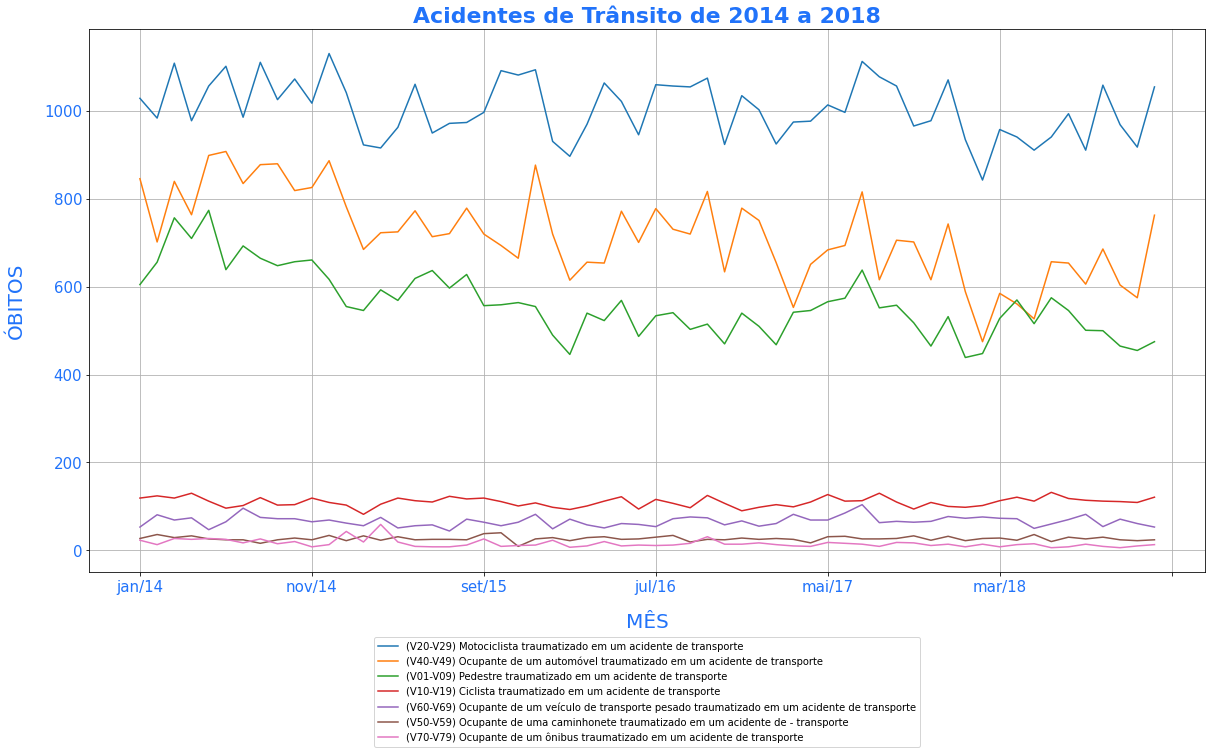

In [ ]:
ax = dados.T.plot(figsize=(20,10), fontsize=15)
ax = plt.grid(b=True)
ax = plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.33))

COLOR='#2173fa'
ax = plt.title("Acidentes de Trânsito de 2014 a 2018", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

## Dedução parcial:
>- Embora o Gráfico "Acidentes de Trânsito de 2014 a 2018" não nos traga um grau de detalhamento muito abragente, podemos identificar claramente que existem dois grupos de séries com tendências distintas.
- Para melhor diagramação vou chamar o Grupo 1, que possui os registros de óbitos inferiores a 200 por mês.
- O Grupo 2 possui os registros de óbitos superiores a 350 por mês.
 
#### Observação importante
>Nosso levantamento leva em consideração o conceito de engenharia de trânsito Visão Zero, que é uma forma de compreender e desenvolver um Sistema Seguro de mobilidade. O sistema é baseado na premissa que nenhuma morte prematura é aceitável, entendendo que a vida humana é a principal prioridade, sobrepondo-se à eficiência da mobilidade e quaisquer outros objetivos dos sistemas viários e de transporte.
 
### Análise do Grupo 1:
>- No Grupo 1 podemos enxergar claramente uma tendência de estabilidade, com as curvas variando muito pouco ao longo do tempo.
 
### Análise do Grupo 2:
>- O Grupo 2 é possível visualizar tendências bastante distintas entre as séries.
- As séries desses grupos tem muita oscilação ao longo do período.

##Grupo 1:
>O Grupo 1 trará informações relativas aos dados de:
 + Ciclista traumatizado em um acidente de transporte;
 + Ocupante veículo de transporte pesado traumatizado em acidente de transporte;
 + Ocupante caminhonete traumatizado em acidente de transporte;
 + Ocupante ônibus traumatizado em acidente de transporte.

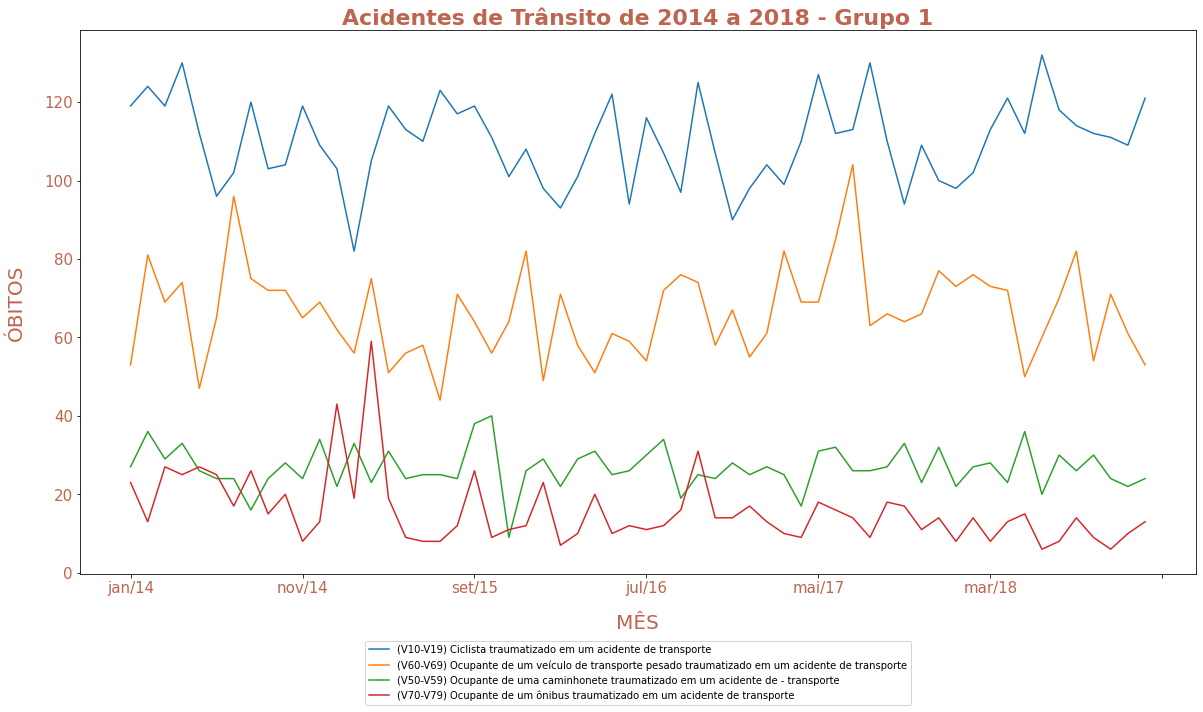

In [ ]:
ax = dadosTgrupo1.plot(figsize=(20,10), fontsize=15)

ax = plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.25))
COLOR = '#bf654f'
ax = plt.title("Acidentes de Trânsito de 2014 a 2018 - Grupo 1", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

##Análise do gráfico "Acidentes de Trânsito de 2014 a 2018 - Grupo 1":
> Podemos perceber nesse gráfico que as bases de dados não demonstram temporalidade, ainda não sendo interessante para análise.<p>
Vamos então separar cada uma das tipificações.

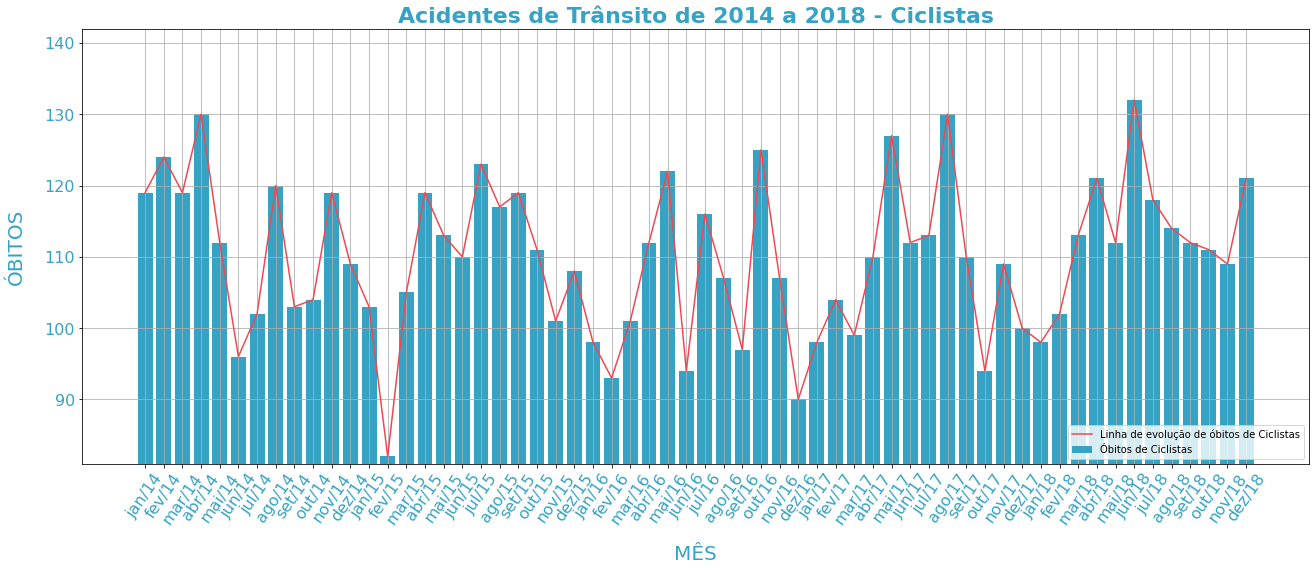


No período tivemos um total de 6599 Ciclistas, mortos, com uma média de 110 óbitos mensais.



In [ ]:
plottar_grafico('(V10-V19) Ciclista traumatizado em um acidente de transporte', dadosTgrupo1, 'Ciclistas', '#36a3c5', '#ef4853', '#36a3c5', 4)

##**Análise do gráfico "Acidentes de Trânsito de 2014 a 2018 - Ciclistas".<p>**
>No gráfico percebemos claramente que não existe nenhuma tendência, existe sim um padrão aleatório.<p>
O trânsito de bicicletas seja em áreas rurais ou urbanas tem forte conflito com os demais modais como carros, ônibus e caminhões, sendo depois dos pedestres os entes mais frágeis do sistema viário.<p>
Considerando que no período tivemos um total de 6599 ciclistas mortos, com uma média de 110 óbitos mensais, acho que o poder público deve começar a observar com mais cuidado esses cidadãos, pois a presença da aleatoriedade do gráfico indica que ou não existem politicas públicas nacionais para redução desses acidentes, ou elas são inadequadas e insuficientes.<p>
Existem em algumas cidades como São Paulo e Curitiba a implantação de ciclovias e ciclofaixas, que é um tipo de técnica que visa segregar o modal dos demais e diminuir os conflitos. Contudo não há uma política nacional de redução de acidentes cicloviários.

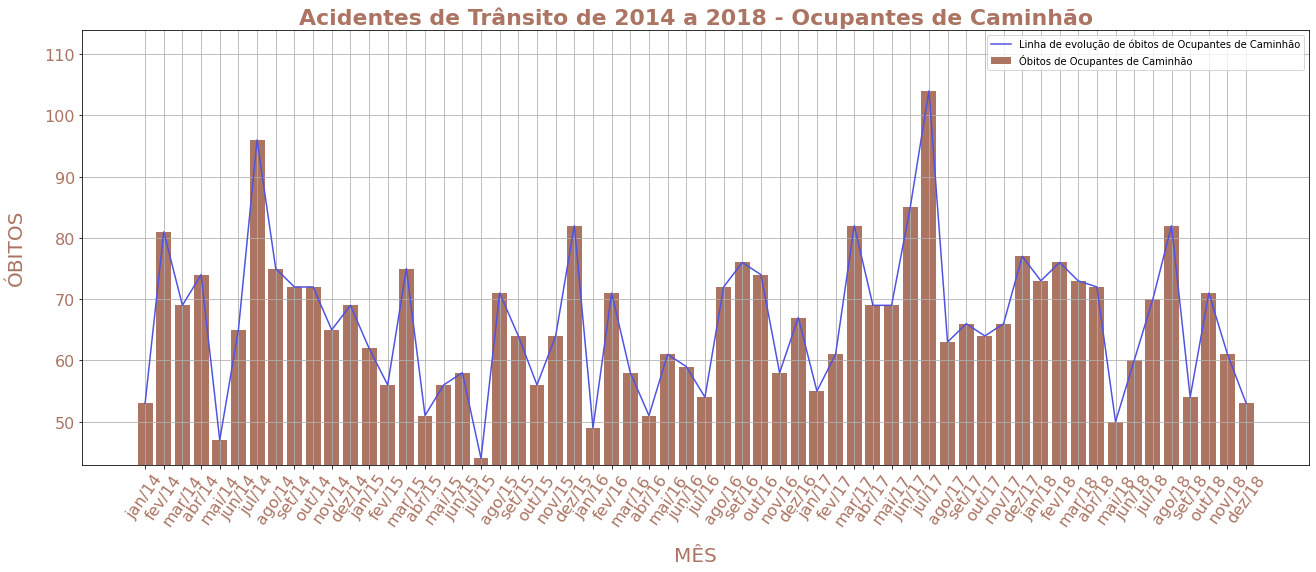


No período tivemos um total de 3983 Ocupantes de Caminhão, mortos, com uma média de 66 óbitos mensais.



In [ ]:
plottar_grafico('(V60-V69) Ocupante de um veículo de transporte pesado traumatizado em um acidente de transporte', dadosTgrupo1, 'Ocupantes de Caminhão', '#ab7463', '#5052e2', '#ab7463')

##**Análise do gráfico "Acidentes de Trânsito de 2014 a 2018 - Ocupantes de Caminhão".**<p>
>No gráfico também existe um padrão aletório, o que pode indicar políticas públicas escassas para essa classe de trabalhadores.<p>
No período tivemos um total de 3983 ocupamtes de caminhões mortos, com uma média de 66 óbitos mensais.<p>
Acredito que no caso dos acidentes dos caminhoneiros temos o problema da situação precária de muitas estradas pelo país, falta de fiscalização do estado de manutênção dos caminhões, e escalas de trabalho muito extensas.
Conforme a Confederação Nacional do Transporte:<p>
Em 2018 foram registrados 18.239 acidentes nas rodovia federais brasileiras com pelo menos um caminhão envolvido.  Causas dos acidentes com caminhões:
1. Grande distância percorrida;
2. Cumprimento de prazos;
3. Dificuldades de planejamento;
4. Falta de descanso;
5. Excesso de confiança;
6. Excesso de carga;
7. Manutenção do veículo;
8. Imprudência;
9. Deficiências na formação;
10. Falta de atenção;
11. Mal súbito;
12. Sono;
13. Problemas de saúde dos caminhoneiros;
14. Infraestrutura precária.<p>
No caso dos caminhoneiros podemos dizer que existem leis que regulamentam a profissão, mas são mais recentes, e exige um estudo futuro, para saber se vão funcionar de modo efetivo para redução dos acidentes e consequente redução da mortalidade no trânsito, o que também irá envolver fiscalização para que seja verificada se a lei está sendo seguida.<p>
A melhora da infraestrutura viária também é muito sensível nesse modal, e a precariedade do nosso sistema exigiria constantes e voluptuosos investimentos, o que não parece ser alvo das políticas públicas de redução de acidadentes.<p>

**Fonte:**<p>
- https://cdn.cnt.org.br/diretorioVirtualPrd/34e78e55-5b3e-4355-9ebc-acf1b8e7b4a4.pdf <p>

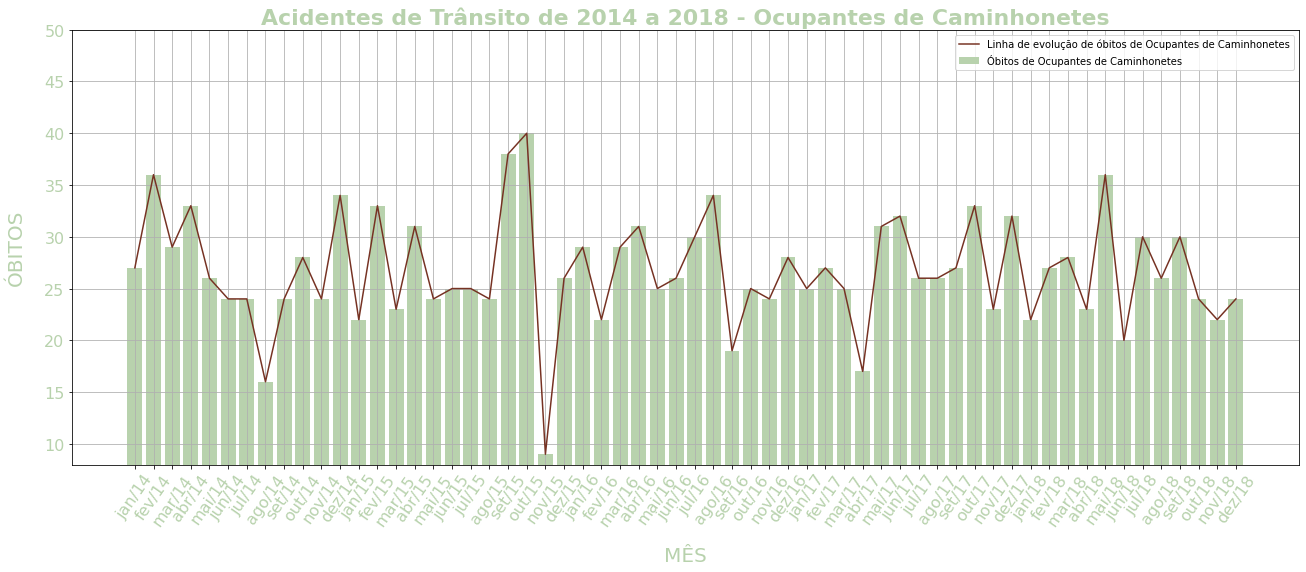


No período tivemos um total de 1603 Ocupantes de Caminhonetes, mortos, com uma média de 27 óbitos mensais.



In [ ]:
plottar_grafico('(V50-V59) Ocupante de uma caminhonete traumatizado em um acidente de - transporte', dadosTgrupo1, 'Ocupantes de Caminhonetes', '#b8d2ad', '#763223', '#b8d2ad')

##**Análise do gráfico "Acidentes de Trânsito de 2014 a 2018 - Ocupantes de Caminhonetes":**<p>
>Outro gráfico que demonstra um padrão aleatório, não acredito que existam políticas públicas exclusivas para essa categoria de veículos, e também não entendo que tipo de profundidade o SUS e a OMS ganham em separar caminhonete dos demais veículos, como caminhões ou automóveis.<p>
Na minha análise, esse dado poderia ser agregado em uma dessas categorias, acredito que como os dados são mundiais, em outros paízes essa separação possa ter alguma relevância.

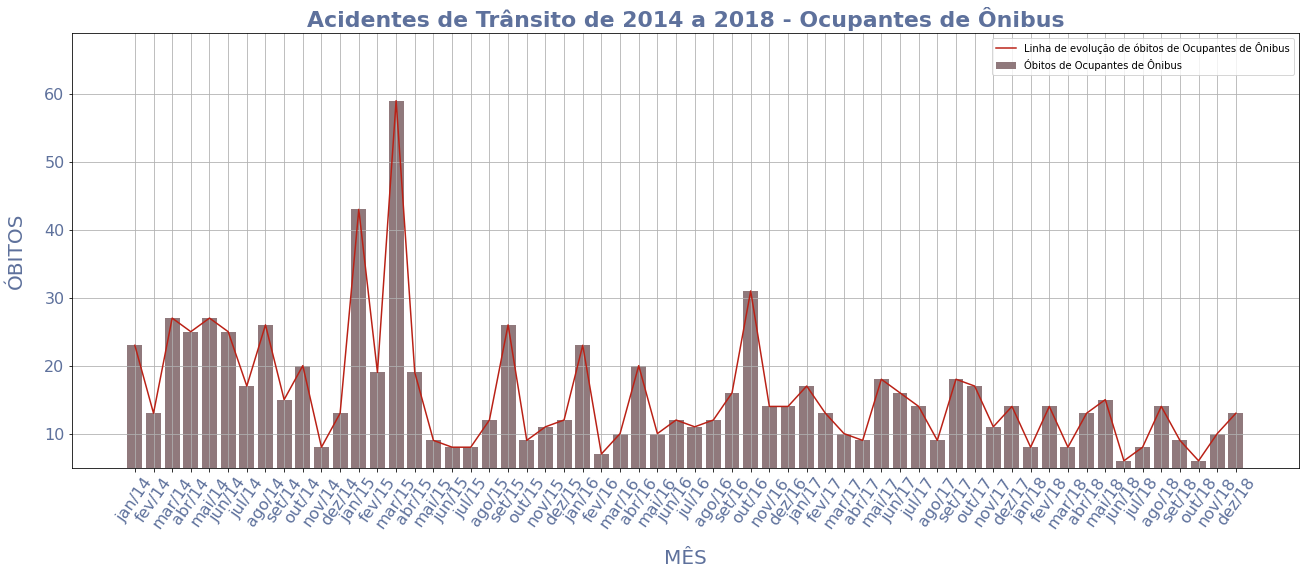


No período tivemos um total de 944 Ocupantes de Ônibus, mortos, com uma média de 16 óbitos mensais.



In [ ]:
plottar_grafico('(V70-V79) Ocupante de um ônibus traumatizado em um acidente de transporte', dadosTgrupo1, 'Ocupantes de Ônibus','#90797c', '#ba2116', '#5e719c')

##**Análise do gráfico "Acidentes de Trânsito de 2014 a 2018 - Ônibus":**<p>
>Embora exista um padrão de aleatoridade, é possível visualizar um perfil sutil de redução nos óbitos nesse modal.<p>
Em minhas pesquisas, localizei a implementação da Resolução nº 4.777 da Agencia Nacional de Transportes Terrestres - ANTT, que entrou em vigor em 07 de agosto de 2015.<p>
A Resolução define que as prestadoras de serviço de fretamento para poderem atuar devem contar com um termo de autorização emitido pela ANTT. Termo que será renovado a cada 3 anos, os ônibus e micro-ônibus, na categoria aluguel, deverão ter até 15 anos de fabricação, serão submetidos a inspeções anuais e as empresas deverão dar garantias de assistência aos usuários em caso de ocorrências que impeçam a continuidade da viagem.<p>
As operadoras também devem atender a Resolução nº 4499/2014 da ANTT, que trata da implantação e gerenciamento dos sistemas de monitoramento de transporte rodoviário de passageiros (Monitriip), que coleta dados em tempo real da velocidade, localização e distância percorrida, com a data e hora da gravação desses em disco não volátil.<p>
A maior parte das empresas de fretamento são homologadas pela ANTT, então a implementação dessas políticas acabam sendo mais efetivas, e o motorista desse modal acaba não tendo muita margem para desrespeitar as leis de trânsito, além de dirigir ônibus mais modernos e seguros, o que não vemos com a mesma frequência no caso dos caminhões por exemplo.<p>
Podemos verificar que mais ou menos após março de 2015, o gráfico entra em uma decrescente, o que pode indicar que a política pública implementada vem surtindo efeitos.<p>
 
**Fontes:**
- https://www.gov.br/infraestrutura/pt-br/assuntos/noticias/ultimas-noticias/antt-divulga-nova-regulamentacao-de-transporte-rodoviario-de-passageiros-sob-regime-de-fretamento
- https://anttlegis.datalegis.inf.br/action/UrlPublicasAction.php?acao=abrirAtoPublico&num_ato=00004499&sgl_tipo=RES&sgl_orgao=DG/ANTT/MT&vlr_ano=2014&seq_ato=000

## Grupo 2
> O Grupo 2 trará informações relativas aos dados de:
 + Pedestre traumatizado em um acidente de transporte;
 + Motociclista traumatizado em um acidente de transporte;
 + Ocupante de um automóvel traumatizado em um acidente de transporte

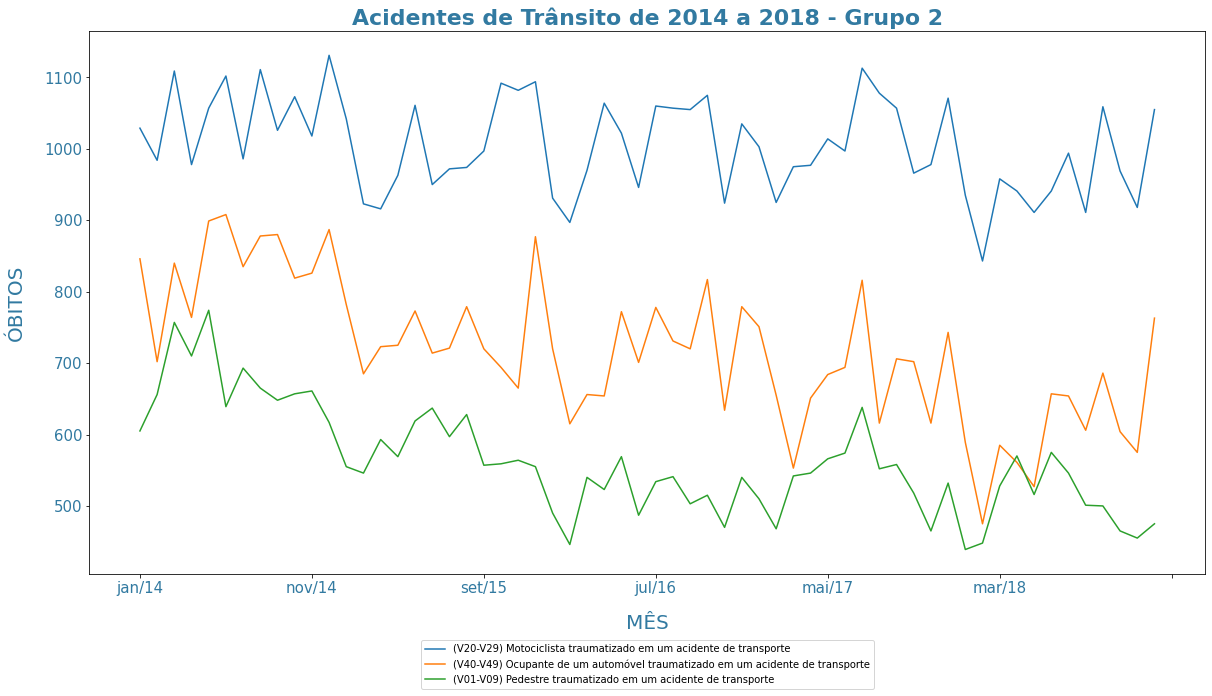

In [ ]:
ax = dadosTgrupo2.plot(figsize=(20,10), fontsize=15)

ax = plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.22))
COLOR = '#327aa1'
ax = plt.title("Acidentes de Trânsito de 2014 a 2018 - Grupo 2", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

##**Análise do gráfico "Acidentes de Trânsito de 2014 a 2018 - Grupo 2"**:<p>
>Nesse gráfico é possivel indicar comportamentos de temporariedade, também podemos perceber em duas curvas uma sútil inclinação descrescente, indicando que a contagem de óbitos cai com o passar do tempo.<p>
Já para as motos o efeito da sazionalidade é menor e a inclinação se mantem relativamente estável dentro do período analizado, além de ser o maior registro de toda a série de Acidentes de transporte.<p>
Para melhorar a análise vamos tratar as curvas separadas.

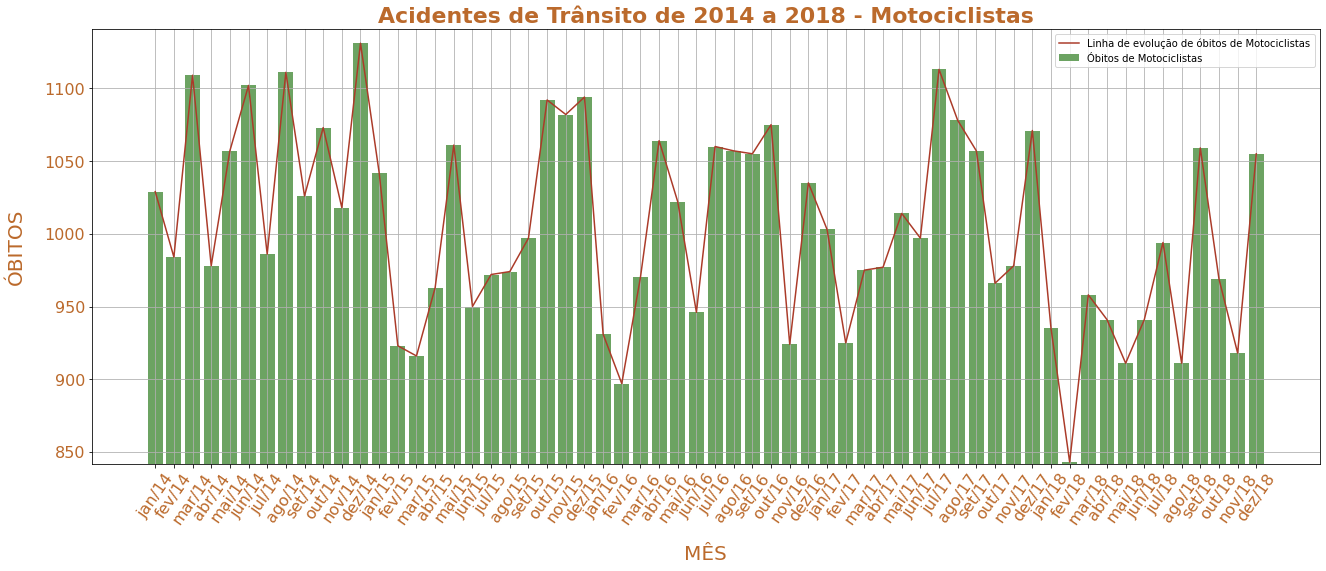


No período tivemos um total de 60295 Motociclistas, mortos, com uma média de 1005 óbitos mensais.



In [ ]:
plottar_grafico('(V20-V29) Motociclista traumatizado em um acidente de transporte', dadosTgrupo2, "Motociclistas", "#6ca362", "#ab3b29", "#bb6a2c"  )

##**Análise do gráfico "Acidentes de Trânsito de 2014 a 2018 - Motociclistas":**<p>
>Nesse gráfico nos podemos verificar um grande índice de letalidade, praticamente não existe políticas públicas de redução de acidentes para esse modal, a fiscalização é muito complicadada, pois a maioria dos radares de velocidade aferem apenas as placas dianteiras dos veículos, as placas da motocicleta tem um padrão menor que a dos carros, e são colocadas somente na parte traseira do veículo sobre o paralama.<p>
É um veículo que depende muito da agilidade do motociclista, é o terceiro modal mais frágil depois dos pedestres e dos ciclistas, conta apenas com o capacete com viseira devidamente preso na jugular, calçado apropriado, que se firme aos pés e roupa que proteja bem o corpo, como calça e jaqueta conforme Art. 54 e 55 do Código de Trânsito Brasileiro - CTB.<p>
Na prática isso influí pouco ou quase nada na segurança do motociclistas, pois na quase totalidade dos acidentes o motocilcistas é atirado ao solo, e seja pela velocidade da própria moto, pela velocidade do outro veículo envolvido ou pela soma das duas forças, as chances de mortalidade e de morbilidade são muito altas, as quantidade de politraumatismos são gigantescas.<p>
Outra questão que devemos nos atentar é a crescente taxa de novos motociclistas no país, o número cresceu 54,3% entre 2009 e 2019, "33.024.249 brasileiros estavam habilitados na categoria A, ou combinadas (AB, AC, AD e AE), o que representa 44,7% do total de pessoas com CNH no país - essa porcentagem era de 41,4% dez anos atrás."<p>
"Outro dado relevante do estudo divulgado no início de setembro pela Abraciclo, associação brasileira que reúne os fabricantes de motocicletas, é que a frota de motos praticamente dobrou no período. Passou de quase 15 milhões de motos em 2009, para mais de 28 milhões no ano passado"<p>
Mesmo o número de automóveis sendo muito maior, a taxa de mortalidade dos motociclistas é muito maior, o total de motociclistas mortos no período foi de 60295, já o total de ocupantes de automóveis mortos foi de 42988. Em média, 1005 motociclistas perdem suas vidas todos os meses, enquanto o número de ocupantes de automóveis que perdem as vidas todos os meses é de 716. A quantidade de motociclistas mortos é 140 % maior do que a de ocupantes de automóveis.<p>
Com a situação da pandemia de COVID-19 em 2020 que provocou a crescente busca por aplicativos de delivery, acredito que deve haver uma substancial alta nos índices desse tipo de acidente, acarretando em taxas de letalidade ainda maiores, mas para isso precisaremos que o DATASUS libere novos dados.
 
**Fontes:**
- http://www.senado.gov.br/noticias/Jornal/emdiscussao/motos/equipamentos/em-resolusoes-do-conselho-nacional-de-transito-contran-obrigatoriedades-de-protecao-viseira-e-capacete-para-motociclistas.aspx
 
- https://www.uol.com.br/carros/colunas/infomoto/2020/09/13/motociclistas-crescem-54-em-dez-anos-no-brasil-veja-o-perfil-de-quem-roda.htm
 
- http://www.planalto.gov.br/ccivil_03/leis/l9503.htm
 
- https://www.uol.com.br/carros/colunas/infomoto/2020/09/13/motociclistas-crescem-54-em-dez-anos-no-brasil-veja-o-perfil-de-quem-roda.htm?cmpid=copiaecola

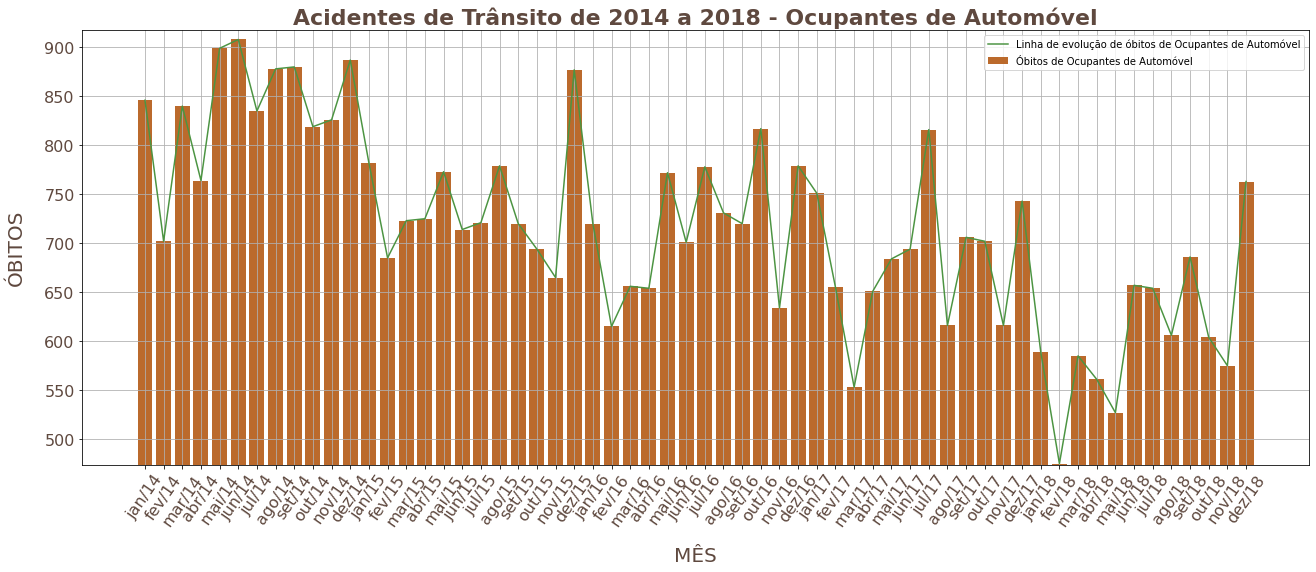


No período tivemos um total de 42988 Ocupantes de Automóvel, mortos, com uma média de 716 óbitos mensais.



In [ ]:
plottar_grafico('(V40-V49) Ocupante de um automóvel traumatizado em um acidente de transporte', dadosTgrupo2, 'Ocupantes de Automóvel', '#bb6a2c', '#4c9442', '#5f493f')

##**Análise do gráfico "Acidentes de Trânsito de 2014 a 2018 - Ocupantes de Automóvel":**<p>
>Nesse gráfico podemos verficar que existe um padrão decrescente, ou seja, apesar de se mater uma quantidade de óbitos muito alta, percebemos que existe uma efetiva redução dos óbitos durante o período analisado.<p>
Durante esse período, o governo tem estabelecido uma série de políticas públicas que parecem estar surtindo efeito, houve o endurecimento das penalidade para as infrações de trânsito, muitas discuções sobre a tipificação dos crimes de trânsito, que recentemente acarretou na não substituição de pena por outras mais brandas, hoje se você for flagrado dirigindo embriagado, e se envolver em um acidente que vitimize alguém por exemplo, se for considerado culpado, você irá para prisão, não sendo mais possivel a transição automática para os regimes abertos ou semi-abertos.<p>
"Desde 2008 até 2018, foi possível notar uma redução de 14% nas mortes de trânsito causadas por motoristas bêbados, porém, o número de autuações subiu de 44.697 para 235.951 de 2008 a 2017. Um crescimento também foi notado nas internações do SUS de vítimas de acidentes."<p>
"Quem for flagrado dirigindo embriagado acabará sofrendo as penalidades previstas na Lei Seca. Ela passou por algumas mudanças e ficou mais rígida e isso significa que qualquer concentração de álcool no sangue já gera problemas."<p>
"Isso pode ser provado com o uso de bafômetro, um instrumento que mede quantidade de álcool no organismo de forma rápida e simples. Se a pessoa se recusar a fazer o teste, o policial pode constatar a embriaguez por meio de sinais."<p>
"A nova Lei 14.071/20  proíbe a conversão de pena privativa de liberdade em pena restritiva de direitos quando o motorista comete homicídio culposo ou lesão corporal sob efeito de álcool ou outro psicoativo".<p>
Embora essa nova lei aumente a validade da carteira de motorista para 10 anos, o que irá diminuir a checagem e monitoramento da aptidão dos motoristas regularmente, aumente a quantidade de pontos necessários para os motoristas perderem a carteira em determinadas situações, essa lei ainda entrará em vigor em abril de 2021, e tem pontos positivos em negativos nos quesitos que analisamos.<p>
 
**Fonte:**
- https://www.portaldotransito.com.br/noticias/dirigir-embriagado-nao-gera-apenas-multa-veja-o-que-pode-acontecer-2/

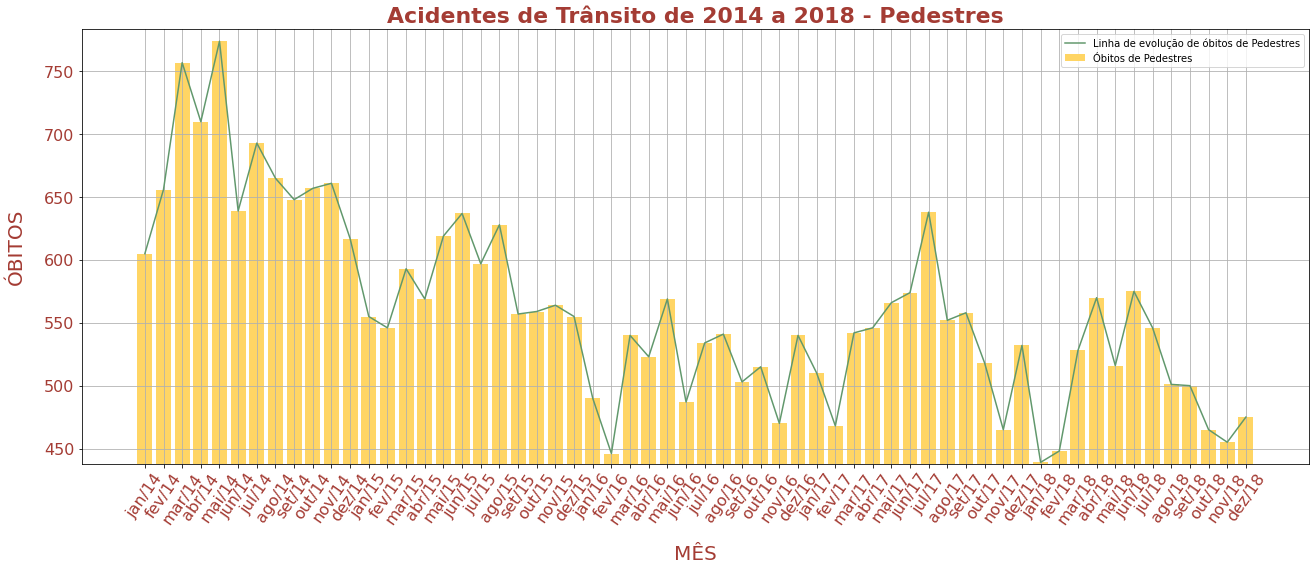


No período tivemos um total de 33706 Pedestres, mortos, com uma média de 562 óbitos mensais.



In [ ]:
plottar_grafico('(V01-V09) Pedestre traumatizado em um acidente de transporte',dadosTgrupo2, 'Pedestres', '#ffd564', '#61986c', '#a43c34')

##**Análise do gráfico "Acidentes de Trânsito de 2014 a 2018 - Pedestres":**<p>
>Nesse gráfico é o que podemos perceber a maior variação decrescente de toda série que analisamos até então, o que pode indicar forte implementação de políticas públicas muito bem sucedidas.<p>
Também é possível notar fortíssima tendencia de temporariedade, pois existe uma queda realmente abrupta nos índices de óbitos nos meses de férias escolares, quando também ocorre a redução do fluxo de pessoas transitando pelas ruas das cidades.<p>
O pedestre é o ator mais vunerável entre todos os modais do sistema viário, e por isso necessita ter especial atenção do porder público, que deve assegurar o princípio fundamental contido no art. 5º da Constituição Federal, "XV - é livre a locomoção no território nacional em tempo de paz, podendo qualquer pessoa, nos termos da lei, nele entrar, permanecer ou dele sair com seus bens;", garantindo que os cidadãos possam caminhar seguramente pelas ruas, sinalizando adequadamente, promovendo campanhas educativas, tanto para os motoristas como para os próprios pedestres.<p>
Você pode se orientar através do vídeo do Observatório Nacional de Segurança Viária - ONSV.<p> ( https://www.facebook.com/watch/?v=1312611902159796 )<p>
Em 2012 a OMS lançou a cartilha de Segurança de Pedestres enfatizando a importância de uma abordagem abrangente e holistica sobre o tema, que inclui medidas de engenharia de trânsito, legislação e fiscalização além de outras, como uma abordagem comportamental do pedestre. <p>
"O manual descreve a magnitude das mortes e lesões em pedestres; os principais fatores de risco; as formas de avaliação situacional da segurança destes usuários das vias públicas num dado cenário e a elaboração de um plano de ação; além de como selecionar, desenhar, implantar e avaliar medidas preventivas."<p> "A publicação chama também a atenção para os benefícios de caminhar, em face aos benefícios para a saúde e para o meio ambiente. O manual, elaborado para um público multidisciplinar busca contribuir o para o fortalecimento da capacidade local para implantar medidas para a segurança de pedestres em todo o mundo."<p>
Cada cidade também tem os seus programas de proteção aos pedestres, o que torna as vias mais seguras e democráticas, pois os espaços públicos acabam sendo compartilhados igualitariamente. Em são Paulo, por exemplo a cidade, vem implantando desde 2010, através da Companhia de Engenharia de Tráfego - CET-SP programas exclusivos, como a zona máxima de proteção ao pedestre - ZMPP.<p>
Essas políticas públicas parecem fazer efeito e justificam a tendência de queda nos óbitos de pedestres.

**Fontes:**
- https://www.justica.gov.br/news/seguranca-do-pedestre-e-foco-da-semana-nacional-de-transito-2014
- https://www.onsv.org.br/momento-seguranca-no-transito-destaca-responsabilidade-dos-pedestres/
- https://www.paho.org/bra/index.php?option=com_content&view=article&id=4554:opas-oms-no-brasil-lanca-manual-seguranca-de-pedestres-em-portugues&Itemid=839

#Análise acidentes de trânsito por Unidades da Federação

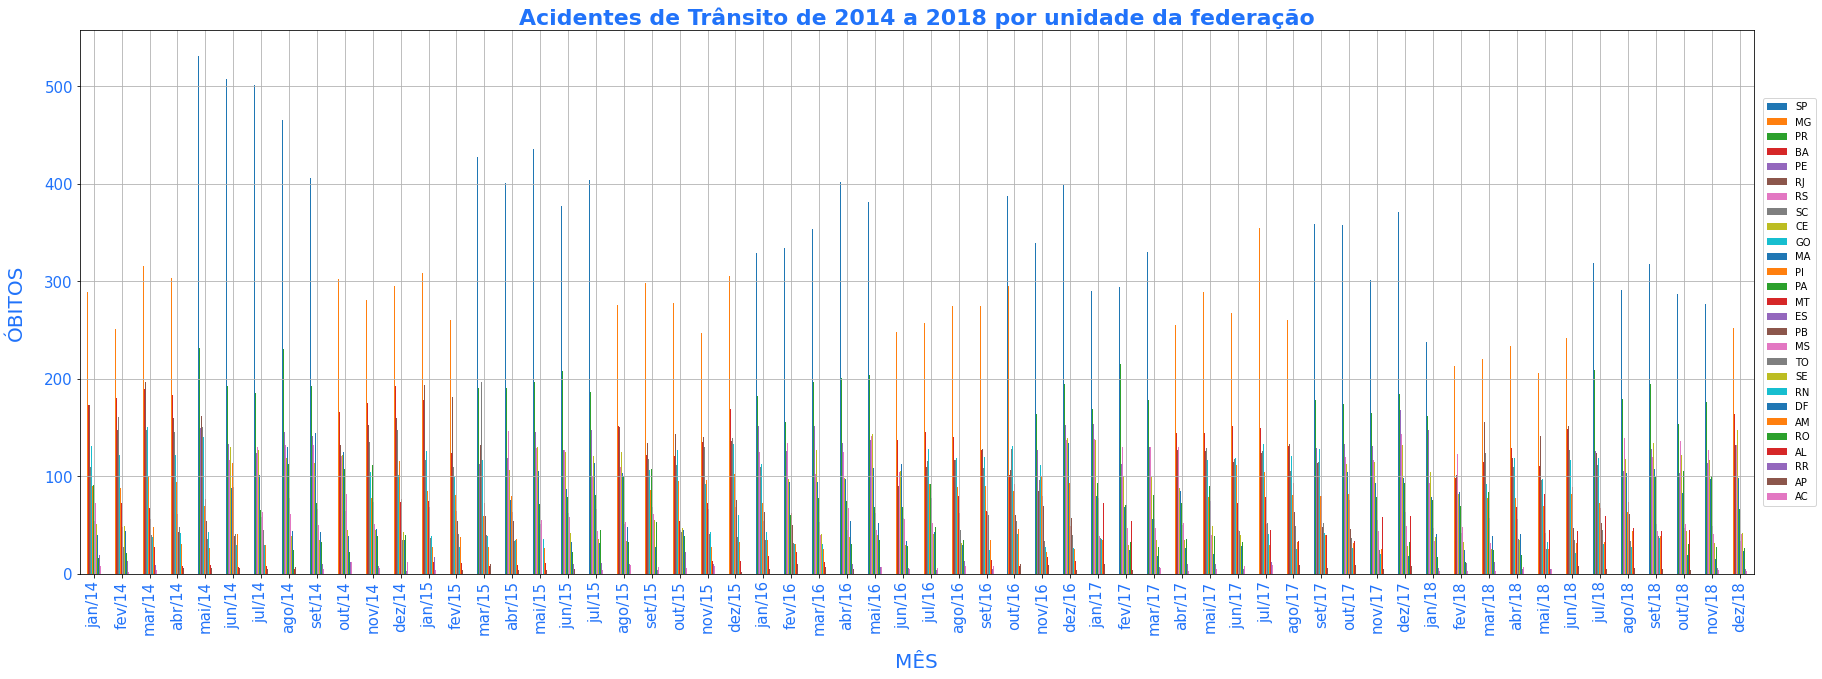

In [ ]:
ax = dadosUFT[:-1].plot(figsize=(30,10), fontsize=15, kind='bar')
ax = plt.grid(b=True)
ax = plt.legend(loc = 'center right', bbox_to_anchor=(1.04, 0.5))

COLOR='#2173fa'
ax = plt.title("Acidentes de Trânsito de 2014 a 2018 por unidade da federação", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

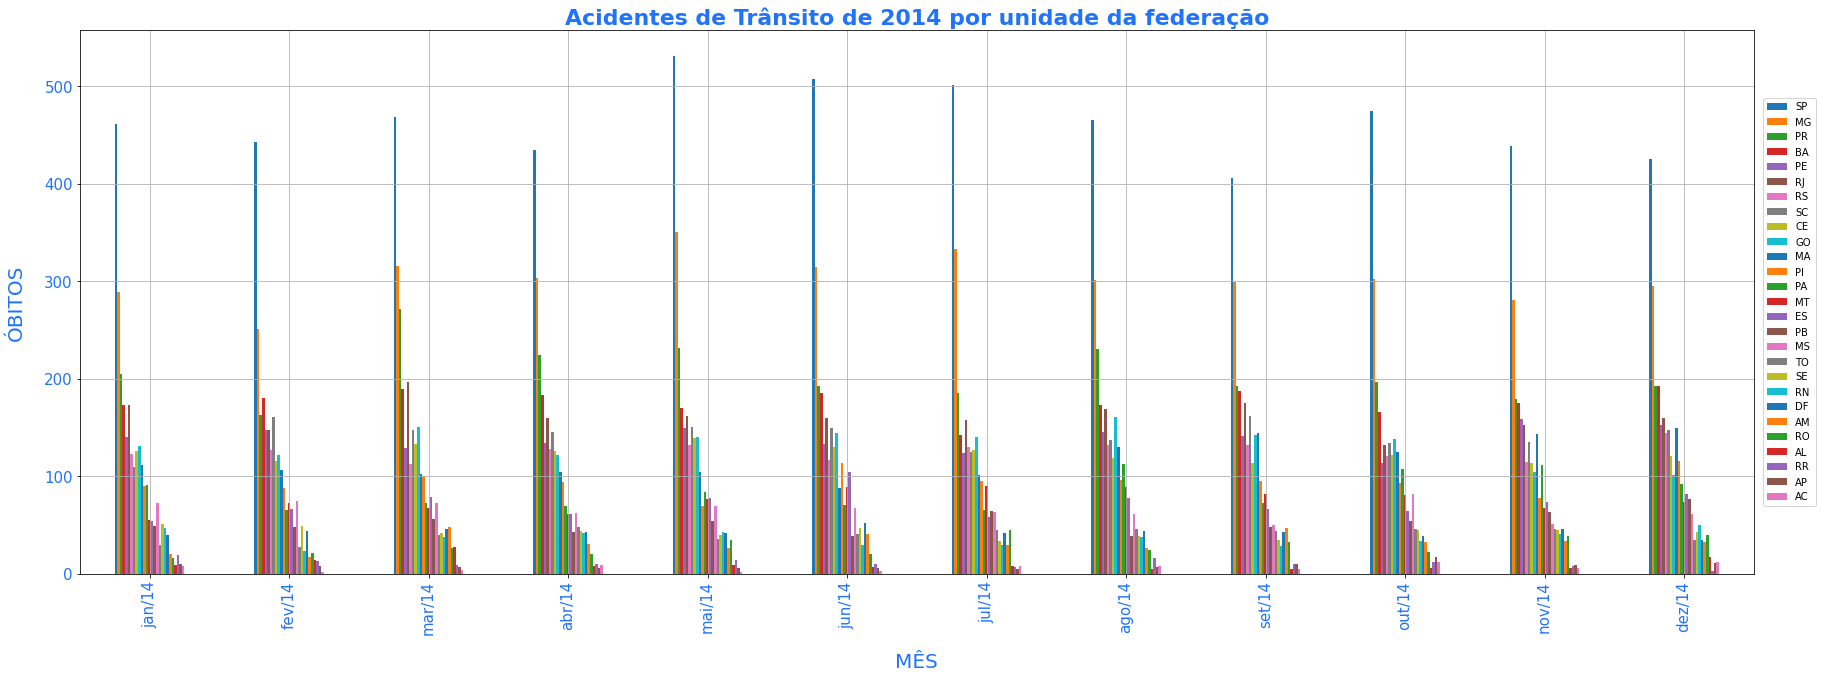

In [ ]:
ax = dadosUFT[0:12].plot(figsize=(30,10), fontsize=15, kind='bar')
ax = plt.grid(b=True)
ax = plt.legend(loc = 'center right', bbox_to_anchor=(1.04, 0.5))

COLOR='#2173fa'
ax = plt.title("Acidentes de Trânsito de 2014 por unidade da federação", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

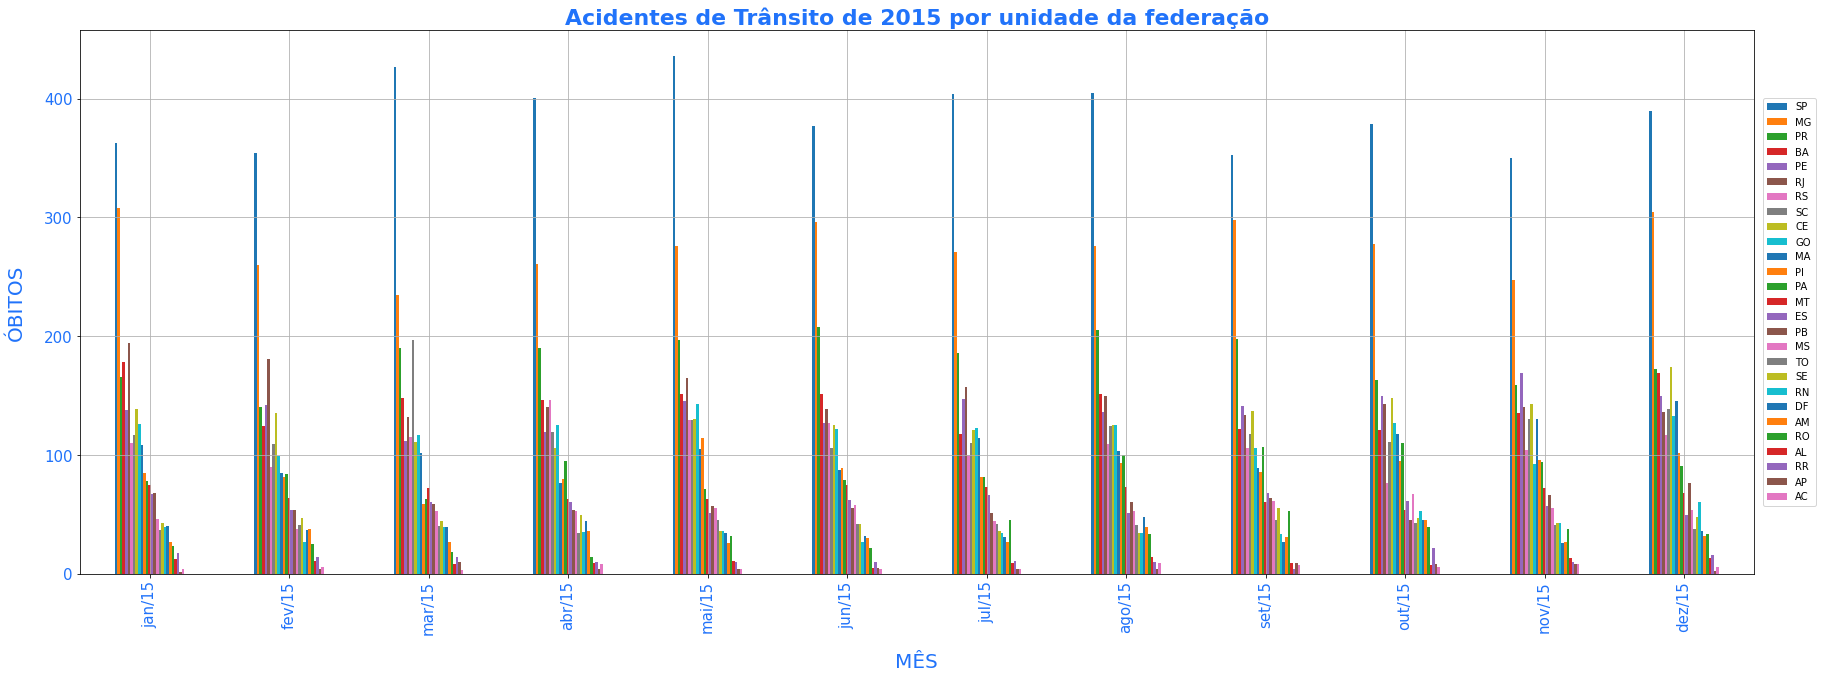

In [ ]:
ax = dadosUFT[12:24].plot(figsize=(30,10), fontsize=15, kind='bar')
ax = plt.grid(b=True)
ax = plt.legend(loc = 'center right', bbox_to_anchor=(1.04, 0.5))

COLOR='#2173fa'
ax = plt.title("Acidentes de Trânsito de 2015 por unidade da federação", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

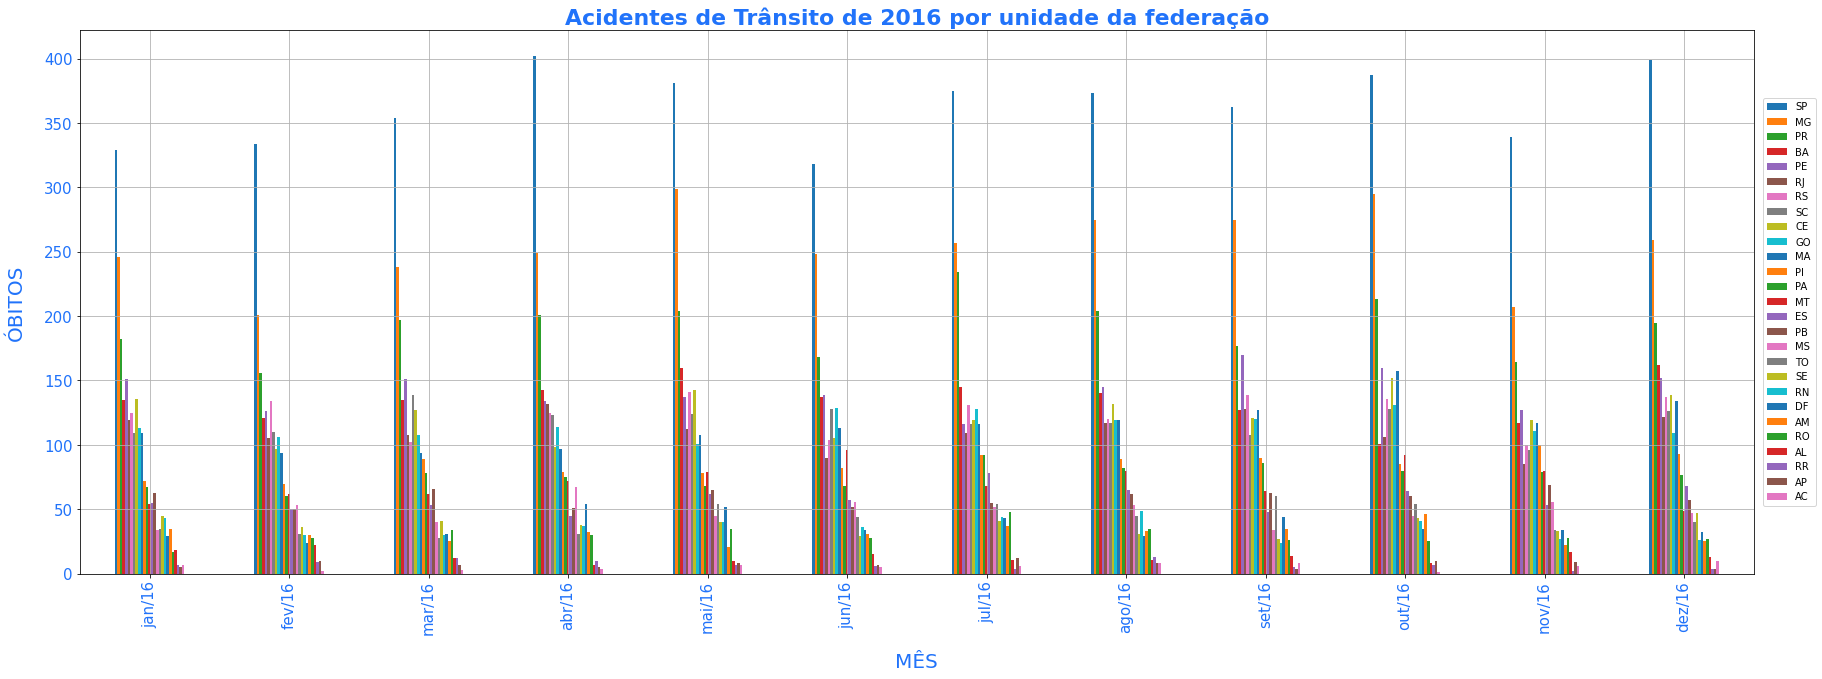

In [ ]:
ax = dadosUFT[24:36].plot(figsize=(30,10), fontsize=15, kind='bar')
ax = plt.grid(b=True)
ax = plt.legend(loc = 'center right', bbox_to_anchor=(1.04, 0.5))

COLOR='#2173fa'
ax = plt.title("Acidentes de Trânsito de 2016 por unidade da federação", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

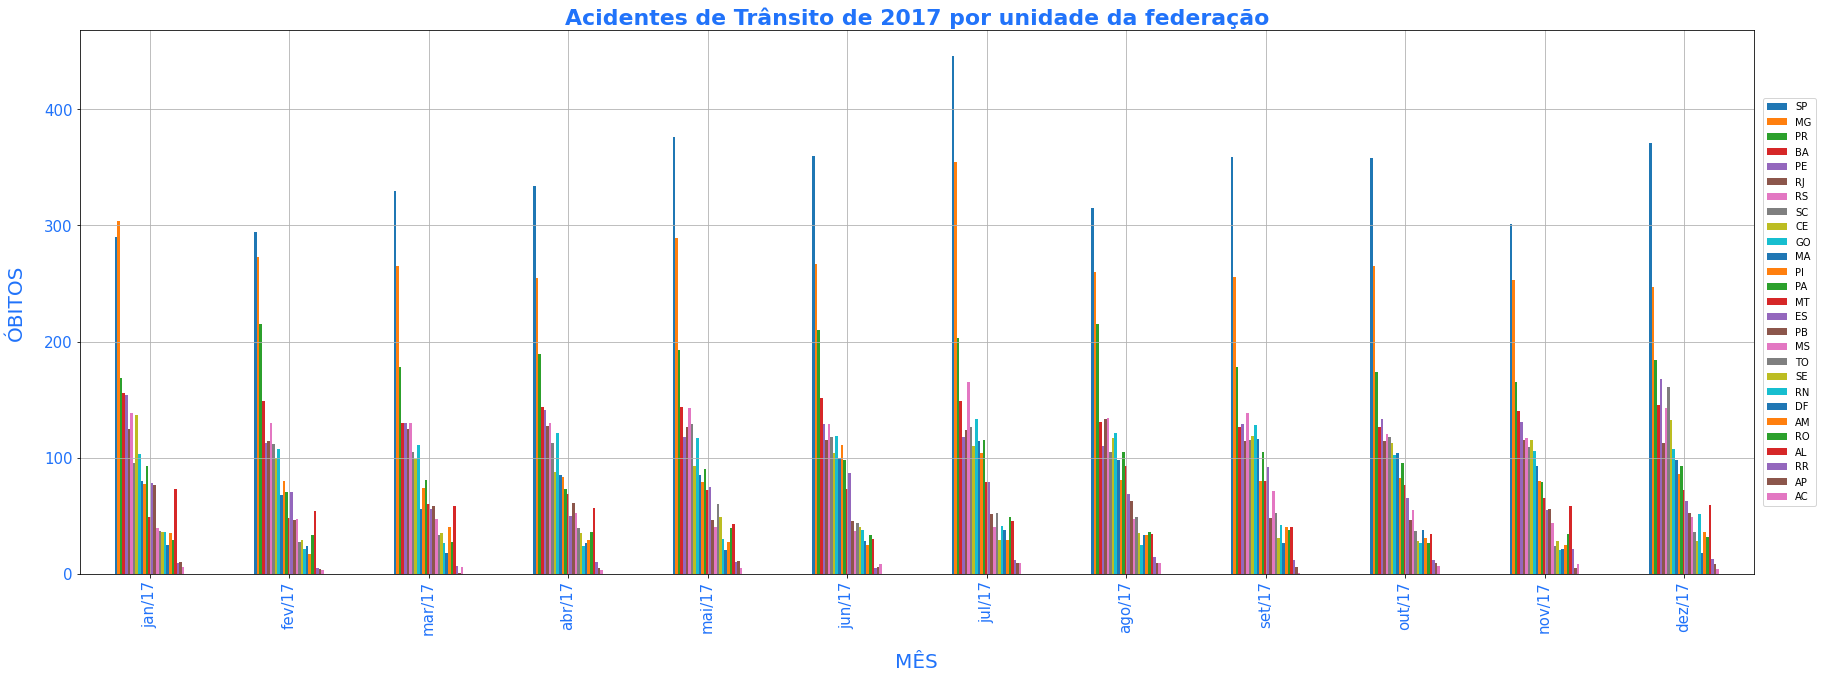

In [ ]:
ax = dadosUFT[36:48].plot(figsize=(30,10), fontsize=15, kind='bar')
ax = plt.grid(b=True)
ax = plt.legend(loc = 'center right', bbox_to_anchor=(1.04, 0.5))

COLOR='#2173fa'
ax = plt.title("Acidentes de Trânsito de 2017 por unidade da federação", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

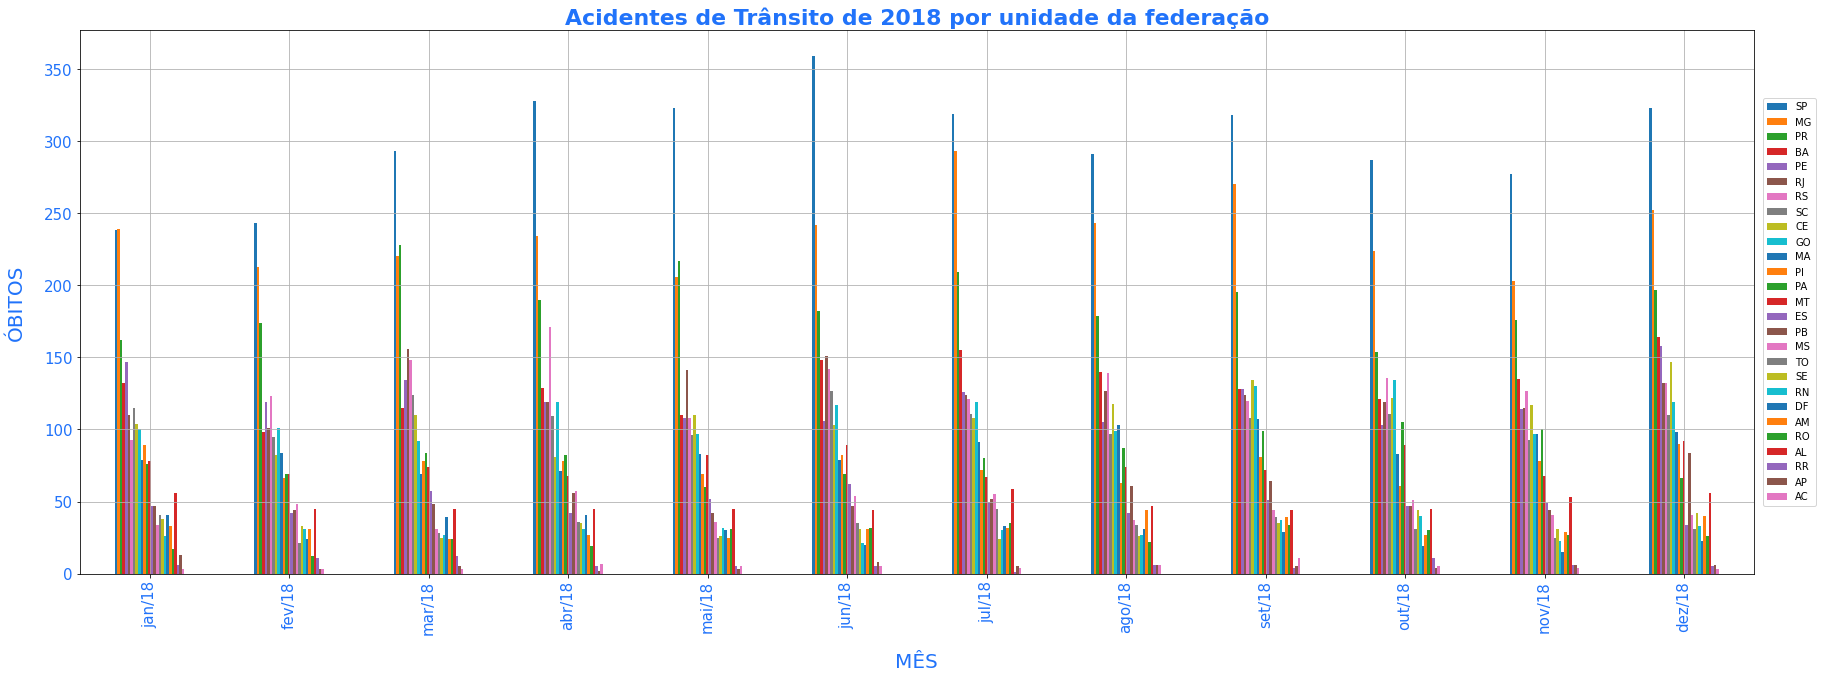

In [ ]:
ax = dadosUFT[48:60].plot(figsize=(30,10), fontsize=15, kind='bar')
ax = plt.grid(b=True)
ax = plt.legend(loc = 'center right', bbox_to_anchor=(1.04, 0.5))

COLOR='#2173fa'
ax = plt.title("Acidentes de Trânsito de 2018 por unidade da federação", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

In [ ]:
SE = ['MG','ES','RJ','SP']

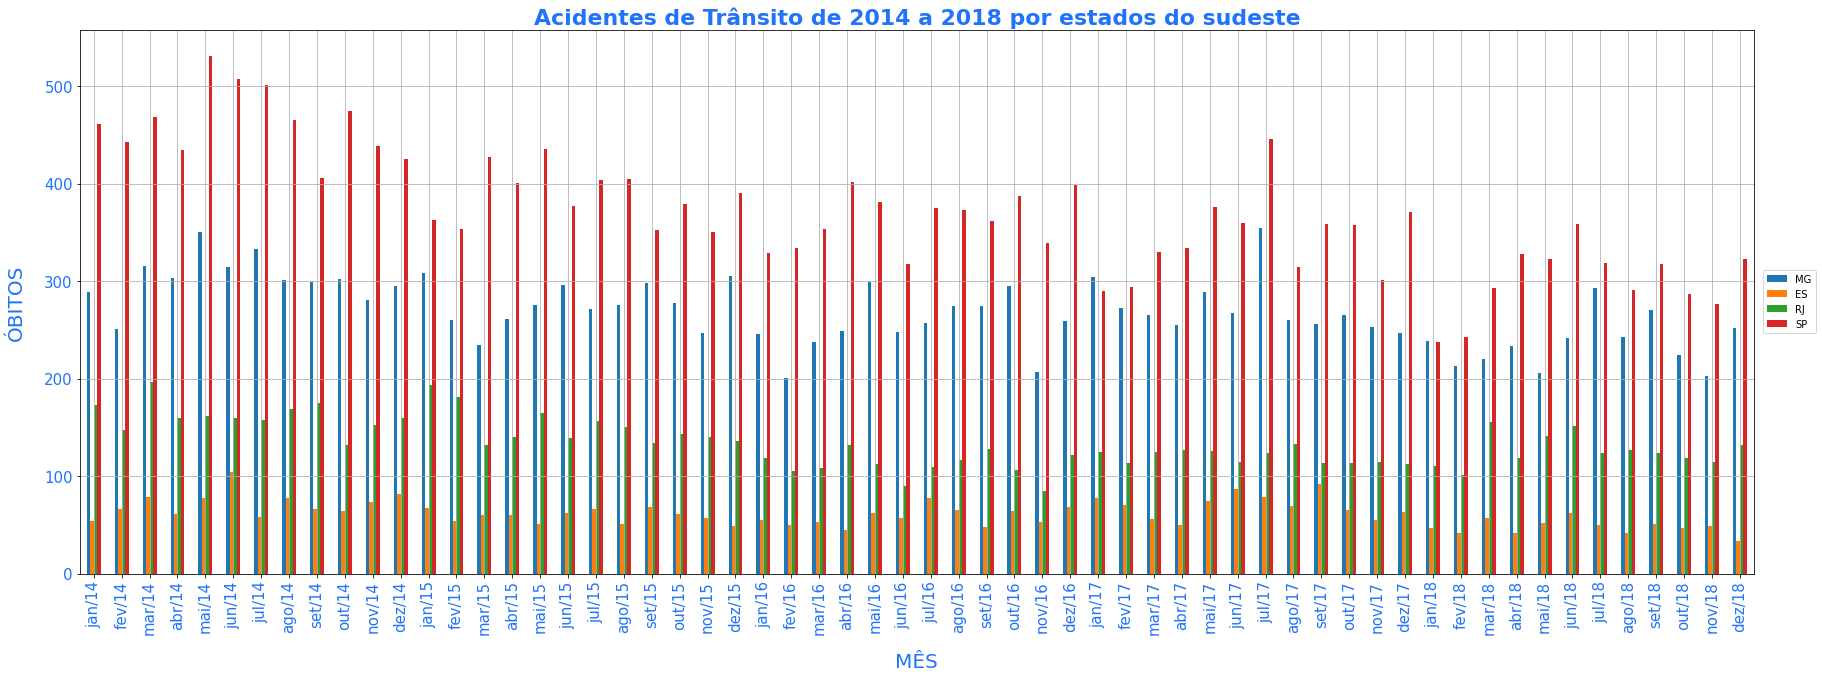

In [ ]:
ax = dadosUFT[SE][:-1].plot(figsize=(30,10), fontsize=15, kind='bar')
ax = plt.grid(b=True)
ax = plt.legend(loc = 'center right', bbox_to_anchor=(1.04, 0.5))

COLOR='#2173fa'
ax = plt.title("Acidentes de Trânsito de 2014 a 2018 por estados do sudeste", fontsize=22, color=COLOR, fontweight='bold')
ax = plt.xlabel('MÊS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.ylabel('ÓBITOS', color = COLOR, labelpad= 18, fontsize = 20)
ax = plt.xticks(color = COLOR)
ax = plt.yticks(color = COLOR)

plt.show()

## Dedução parcial:
>Inicialmente gerei o gráfico "Acidentes de Trânsito de 2014 a 2018 por unidade da federação", mas era muito denso e poluído, não sendo possível realizar nenhuma análise.<p>
Então tentei separar ano a ano, gerando os graficos "Acidentes de Trânsito de 2014 por unidade da federação", "Acidentes de Trânsito de 2015 por unidade da federação", "Acidentes de Trânsito de 2016 por unidade da federação", "Acidentes de Trânsito de 2017 por unidade da federação", "Acidentes de Trânsito de 2018 por unidade da federação", não trouxeram bons pontos, ainda são muito poluídos, as informações não estão claras,  não possíbilitando assim a análise adequada, e ainda se perdia possíveis variações entre os anos, que é um dos objetivos da minha análise, perceber se ao final dos cinco anos analisados, se houve mudanças nos padrões dos gráficos.<p>
Então gerei um novo gráfico "Acidentes de Trânsito de 2014 a 2018 por estados do sudeste", tentando segregar os dados por região, o que ainda não se monstrou nada adequado para análise.<p>
Foram mantidos todos os gráficos nesse trabalho somente por fatores didádicos, para que possa haver o entendimento sobre o porque das escolhas que fiz no final, afinal o objetivo é aprender com os meus erros.<p>

### Decisão mais acertada:
>Para perceber os fatores de temporariedade, as possíveis evoluções do gráfico em todo o período, resolvi focar minha análise nos gráficos gerados para cada um dos 27 estados.<p>
Veremos a seguir.

##Série de Gráficos "Acidentes de Trânsito de 2014 a 2018" por Estado:


1 -)


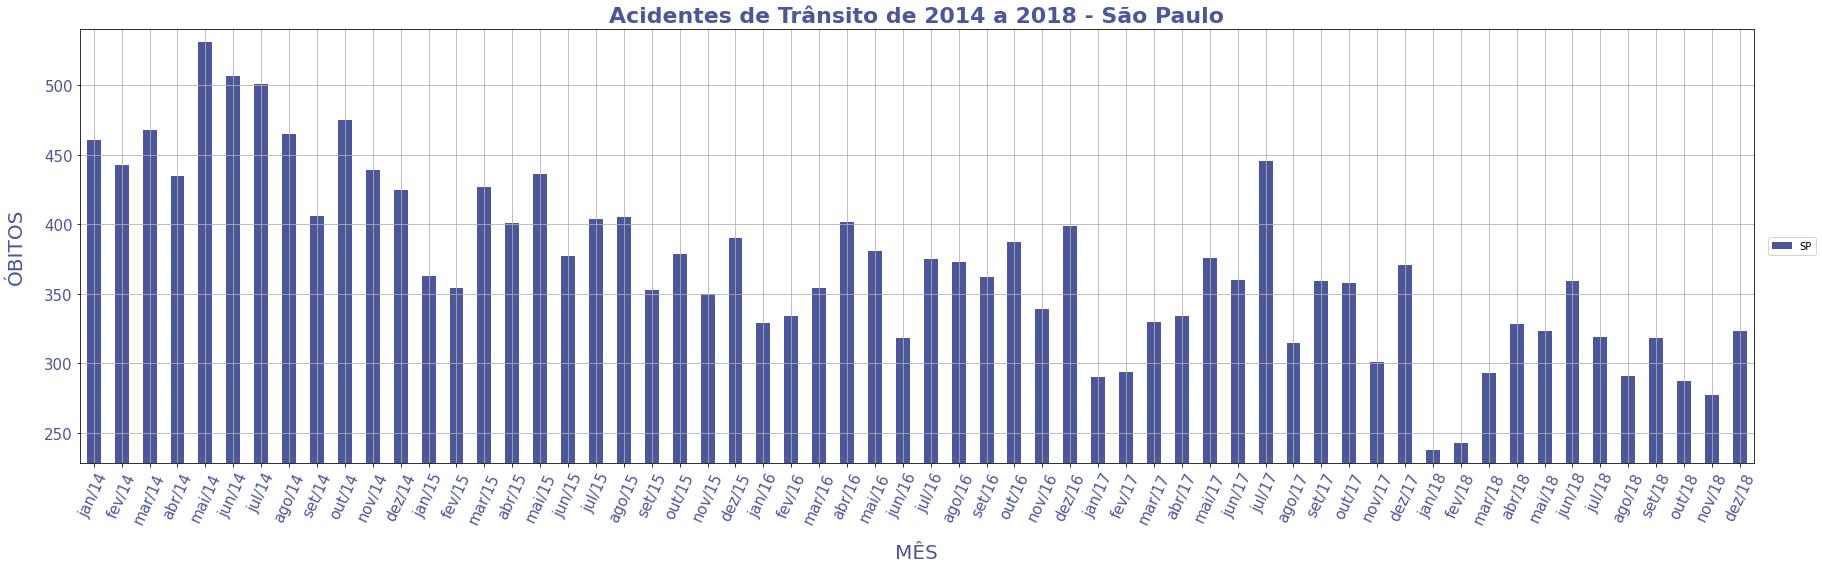

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - São Paulo"
- Mínimo: 238 óbitos em jan/18;
- Máximo: 531 óbitos em mai/14;
- Média:  371 óbitos por mês;
- Total 22281 mortes no período;
- Taxa de 48 óbitos a cada 100.000 habitantes.

2 -)


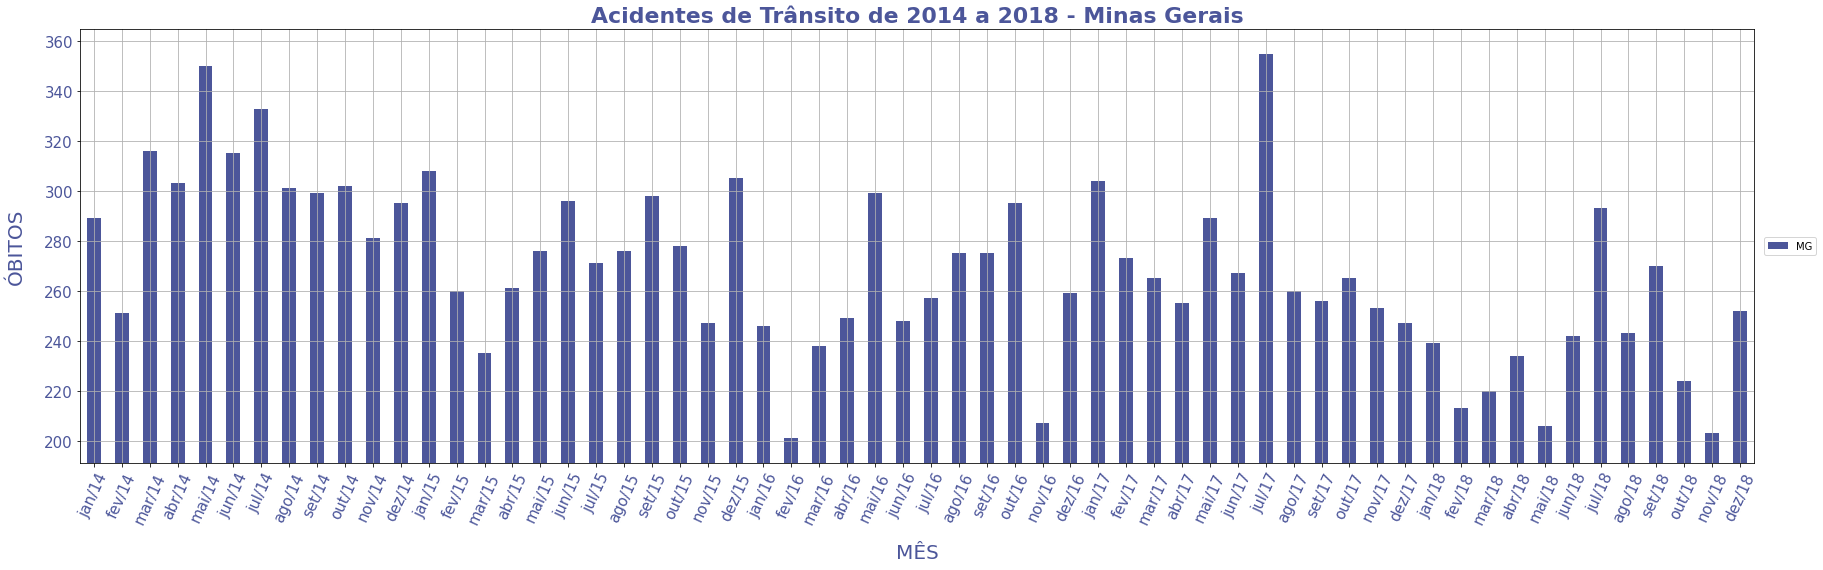

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Minas Gerais"
- Mínimo: 201 óbitos em fev/16;
- Máximo: 355 óbitos em jul/17;
- Média:  269 óbitos por mês;
- Total 16123 mortes no período;
- Taxa de 76 óbitos a cada 100.000 habitantes.

3 -)


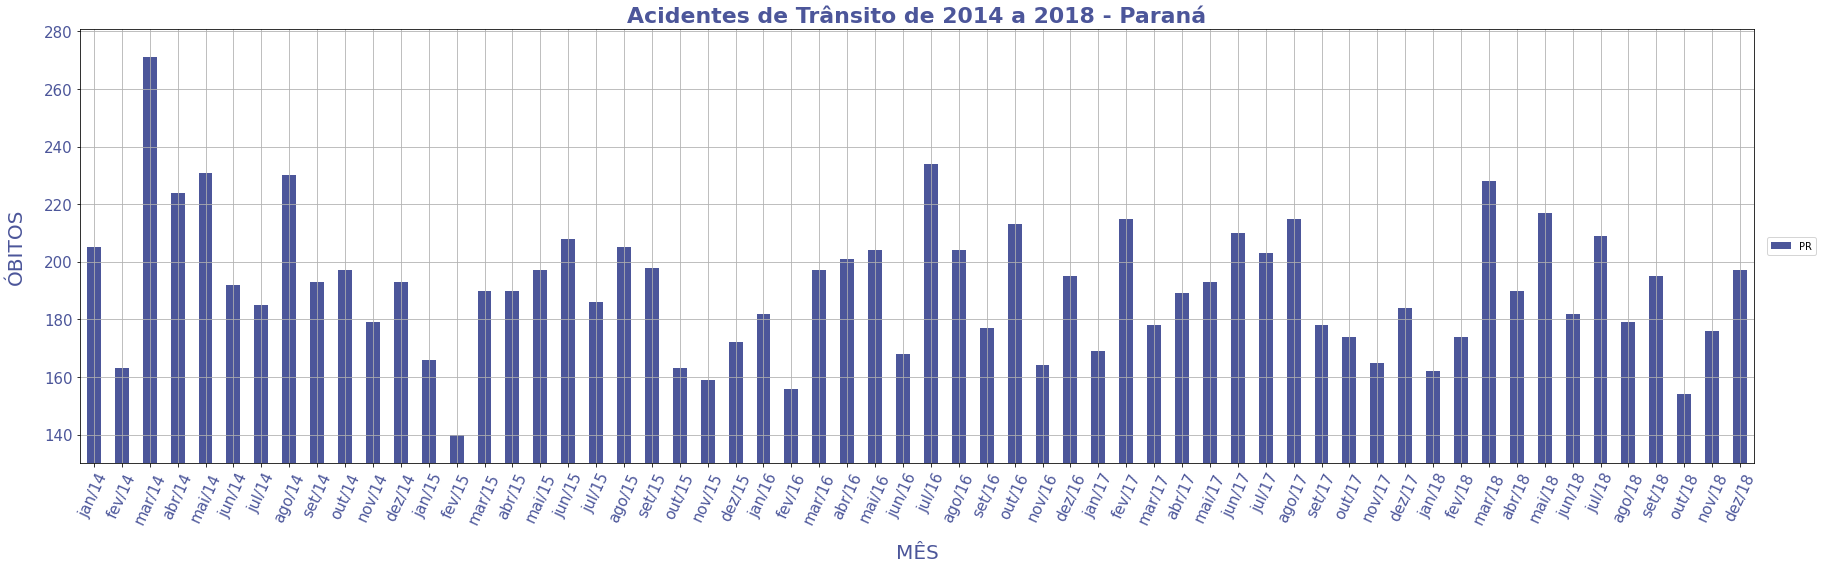

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Paraná"
- Mínimo: 140 óbitos em fev/15;
- Máximo: 271 óbitos em mar/14;
- Média:  191 óbitos por mês;
- Total 11468 mortes no período;
- Taxa de 100 óbitos a cada 100.000 habitantes.

4 -)


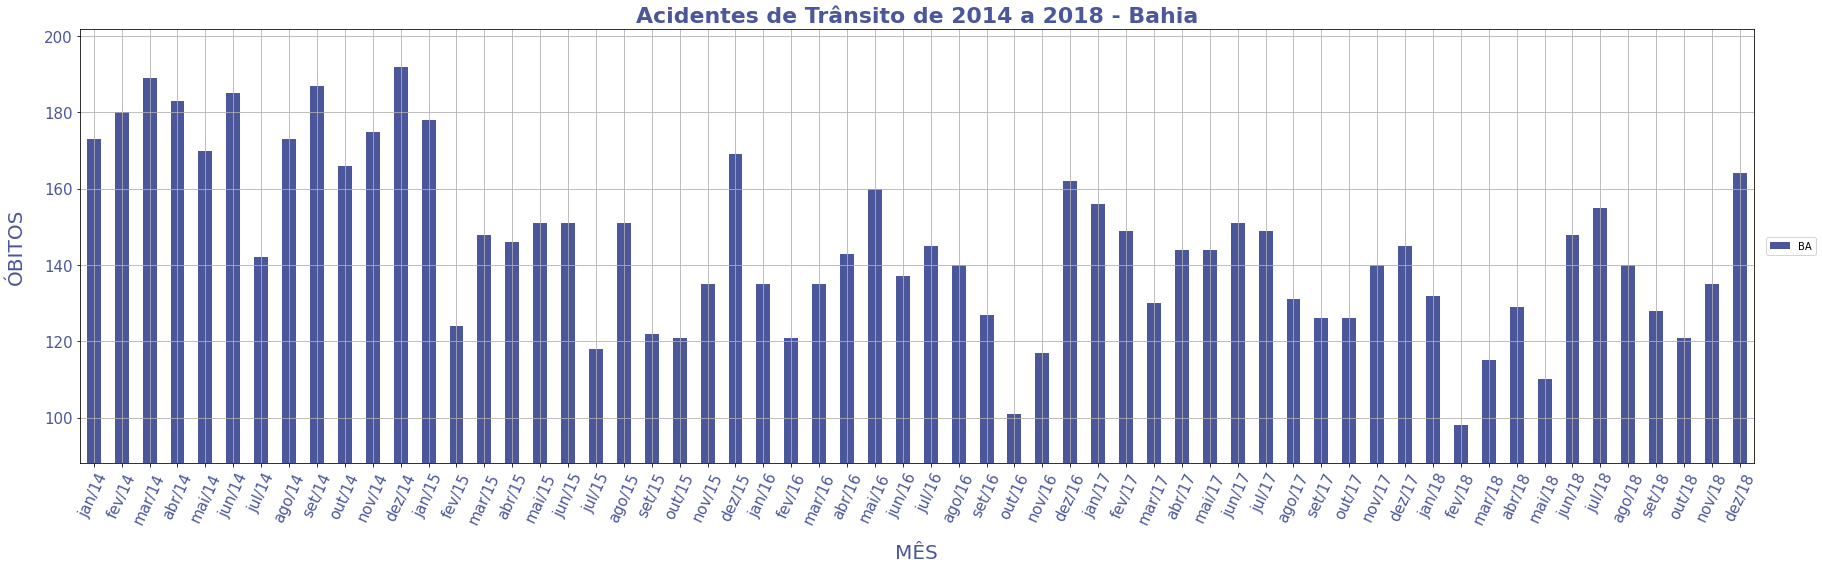

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Bahia"
- Mínimo: 98 óbitos em fev/18;
- Máximo: 192 óbitos em dez/14;
- Média:  145 óbitos por mês;
- Total 8718 mortes no período;
- Taxa de 58 óbitos a cada 100.000 habitantes.

5 -)


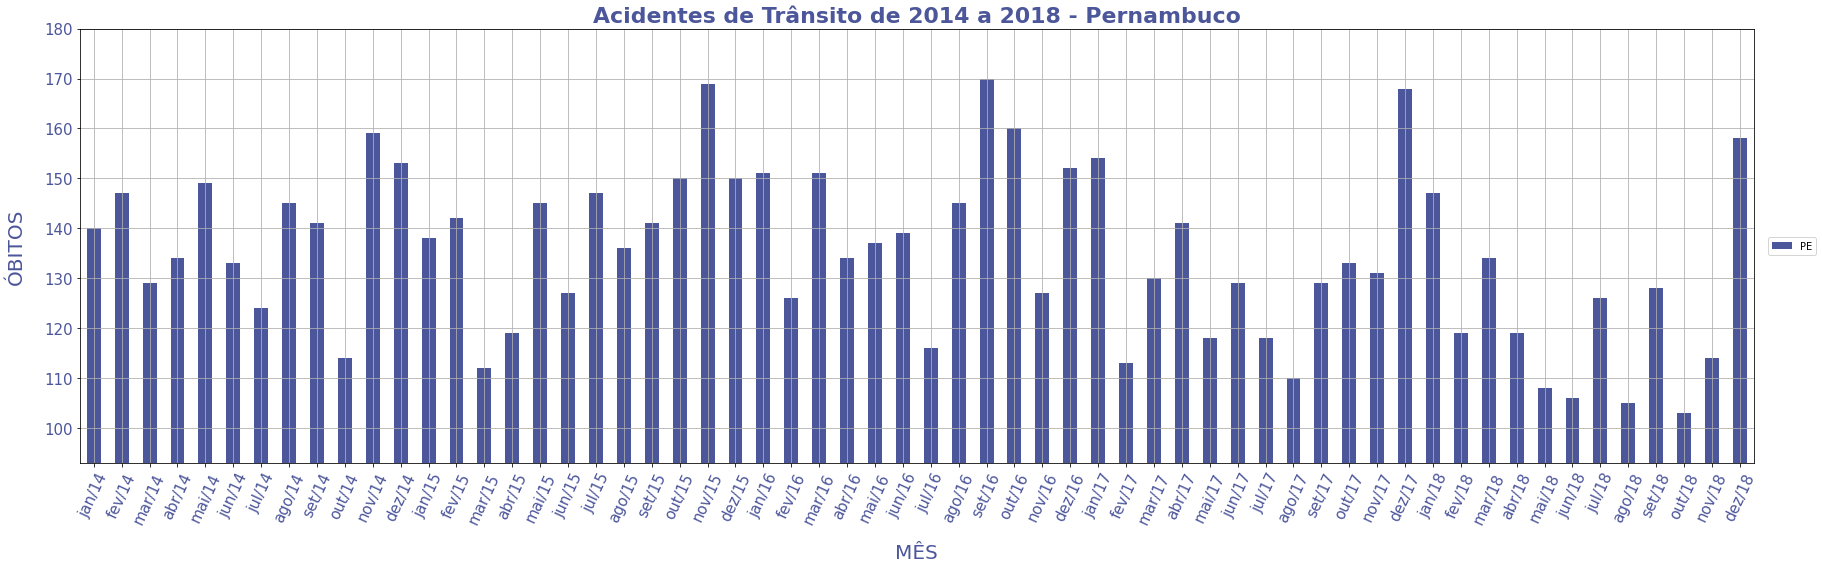

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Pernambuco"
- Mínimo: 103 óbitos em out/18;
- Máximo: 170 óbitos em set/16;
- Média:  135 óbitos por mês;
- Total 8093 mortes no período;
- Taxa de 84 óbitos a cada 100.000 habitantes.

6 -)


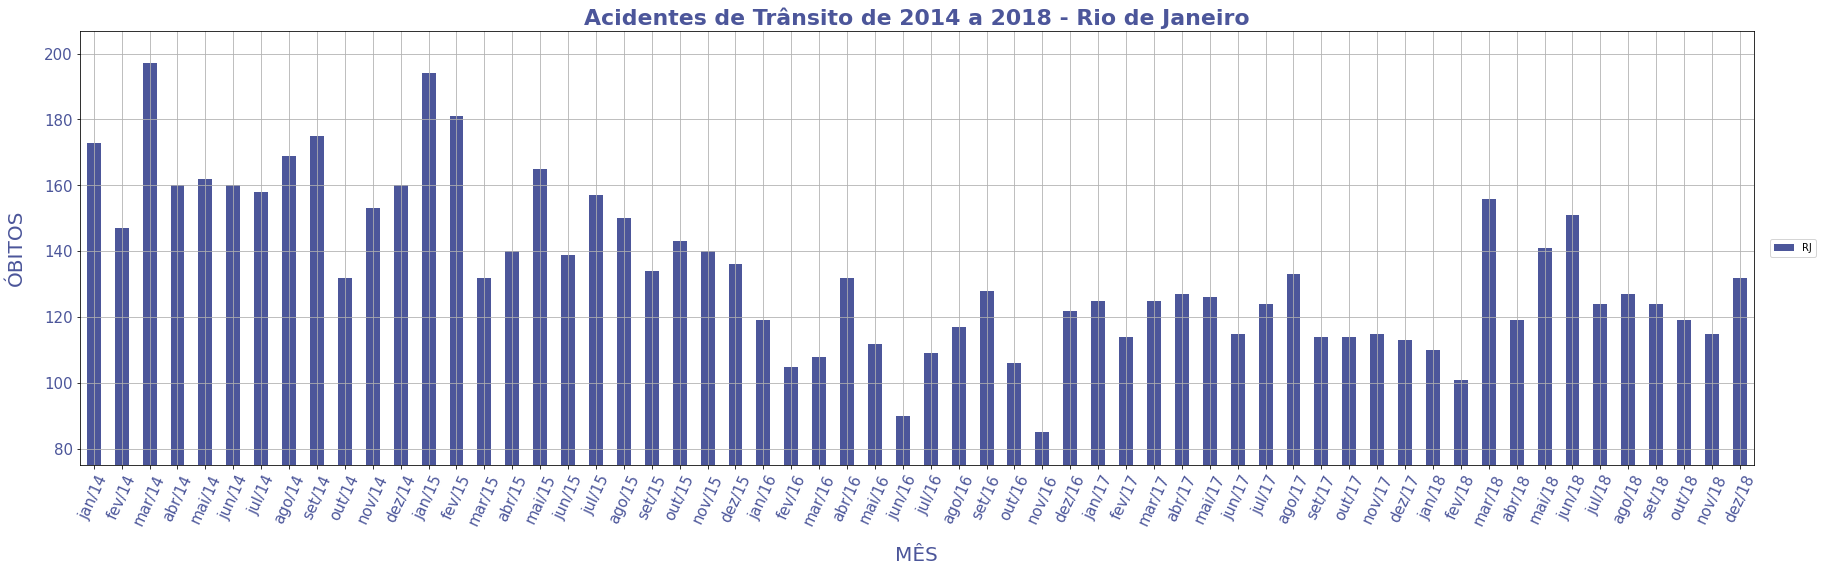

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Rio de Janeiro"
- Mínimo: 85 óbitos em nov/16;
- Máximo: 197 óbitos em mar/14;
- Média:  134 óbitos por mês;
- Total 8054 mortes no período;
- Taxa de 46 óbitos a cada 100.000 habitantes.

7 -)


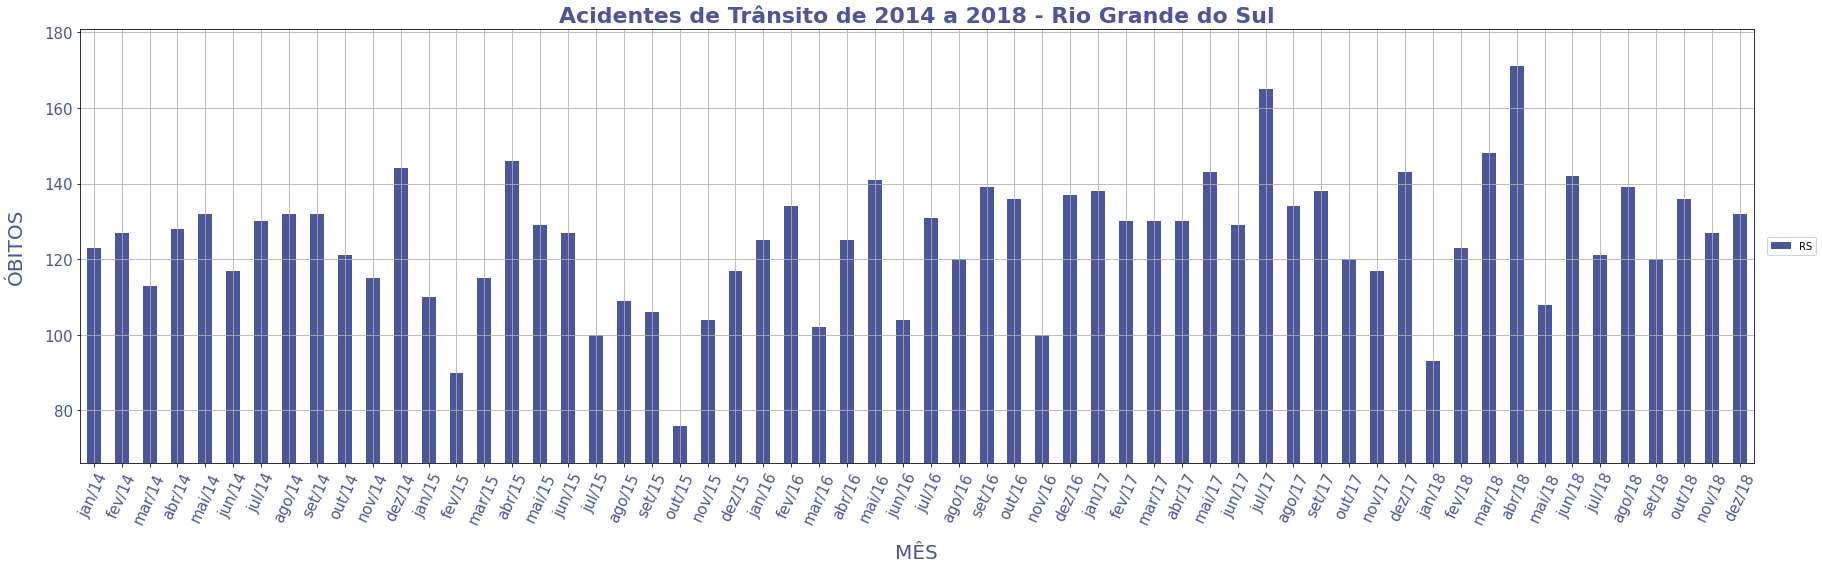

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Rio Grande do Sul"
- Mínimo: 76 óbitos em out/15;
- Máximo: 171 óbitos em abr/18;
- Média:  125 óbitos por mês;
- Total 7514 mortes no período;
- Taxa de 66 óbitos a cada 100.000 habitantes.

8 -)


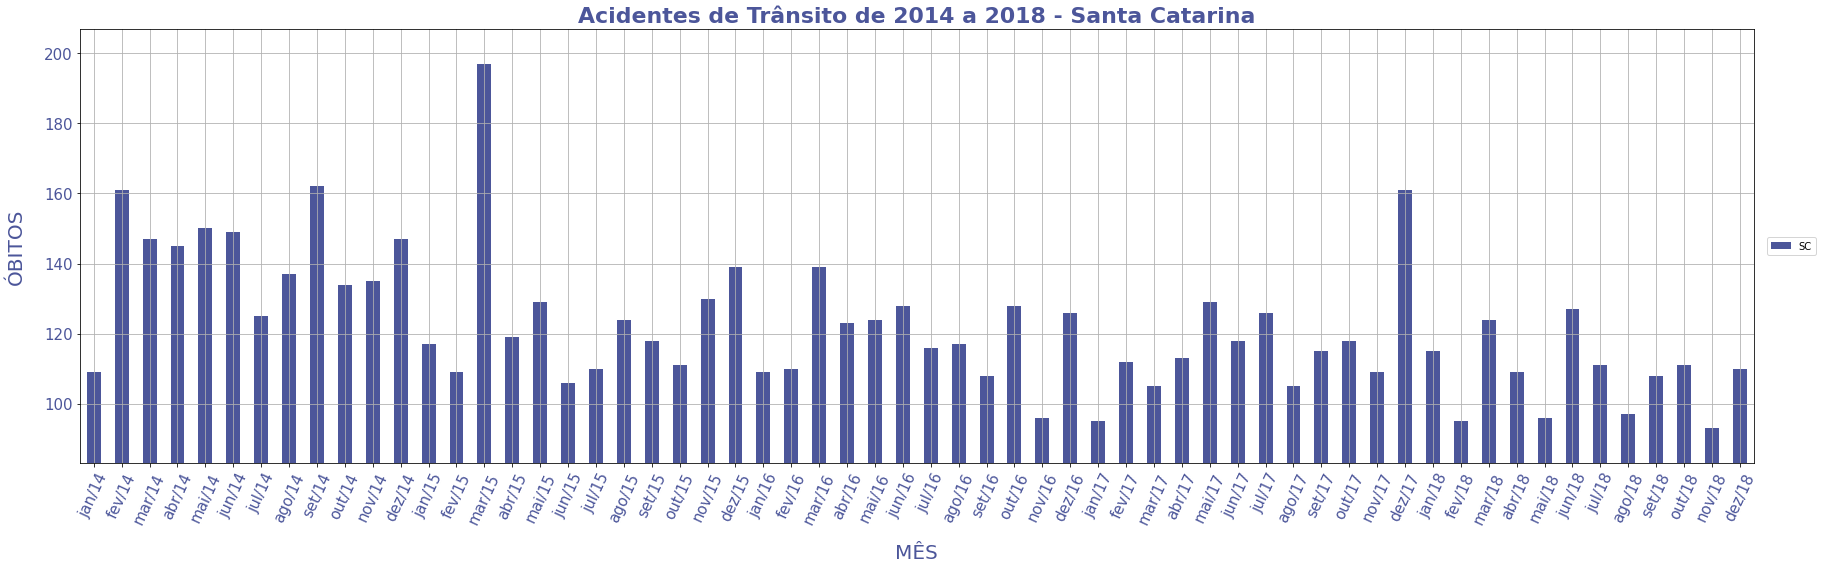

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Santa Catarina"
- Mínimo: 93 óbitos em nov/18;
- Máximo: 197 óbitos em mar/15;
- Média:  122 óbitos por mês;
- Total 7336 mortes no período;
- Taxa de 101 óbitos a cada 100.000 habitantes.

9 -)


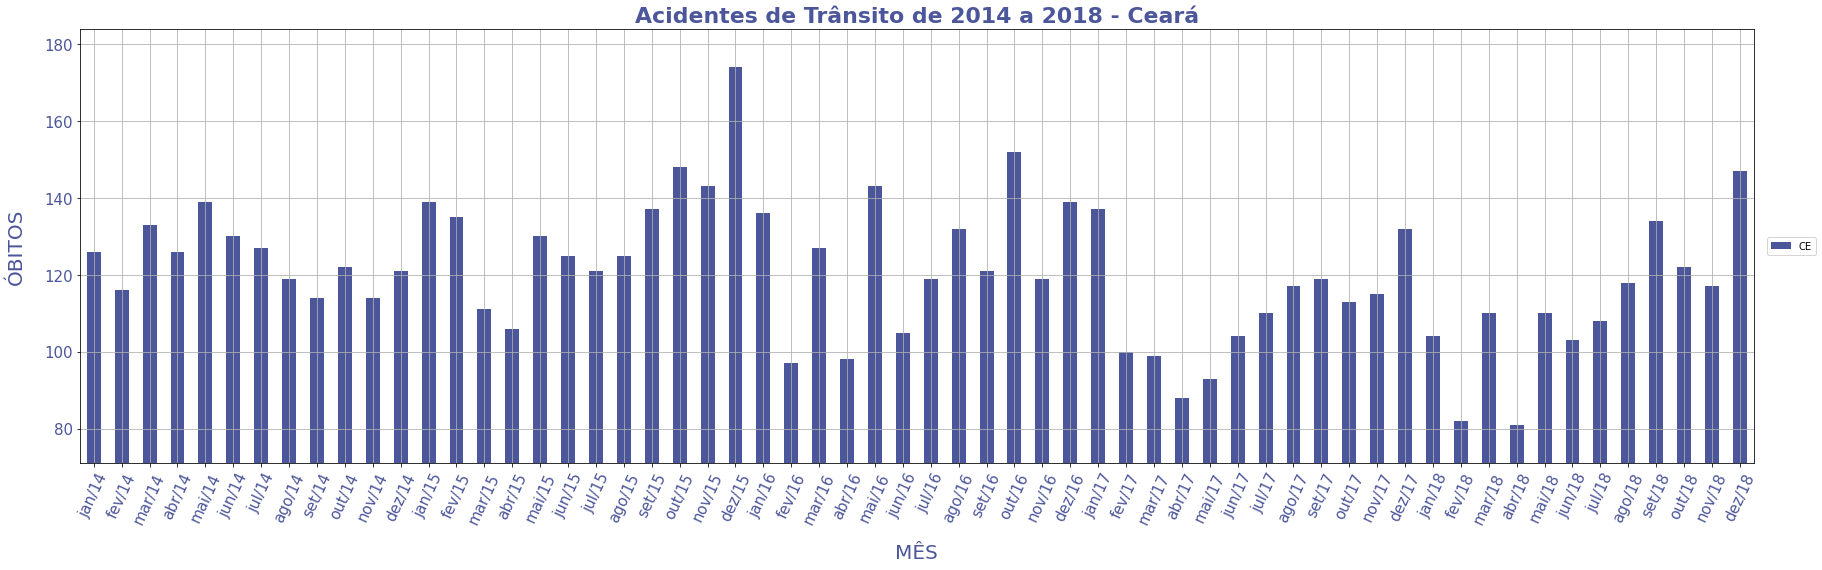

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Ceará"
- Mínimo: 81 óbitos em abr/18;
- Máximo: 174 óbitos em dez/15;
- Média:  121 óbitos por mês;
- Total 7232 mortes no período;
- Taxa de 79 óbitos a cada 100.000 habitantes.

10 -)


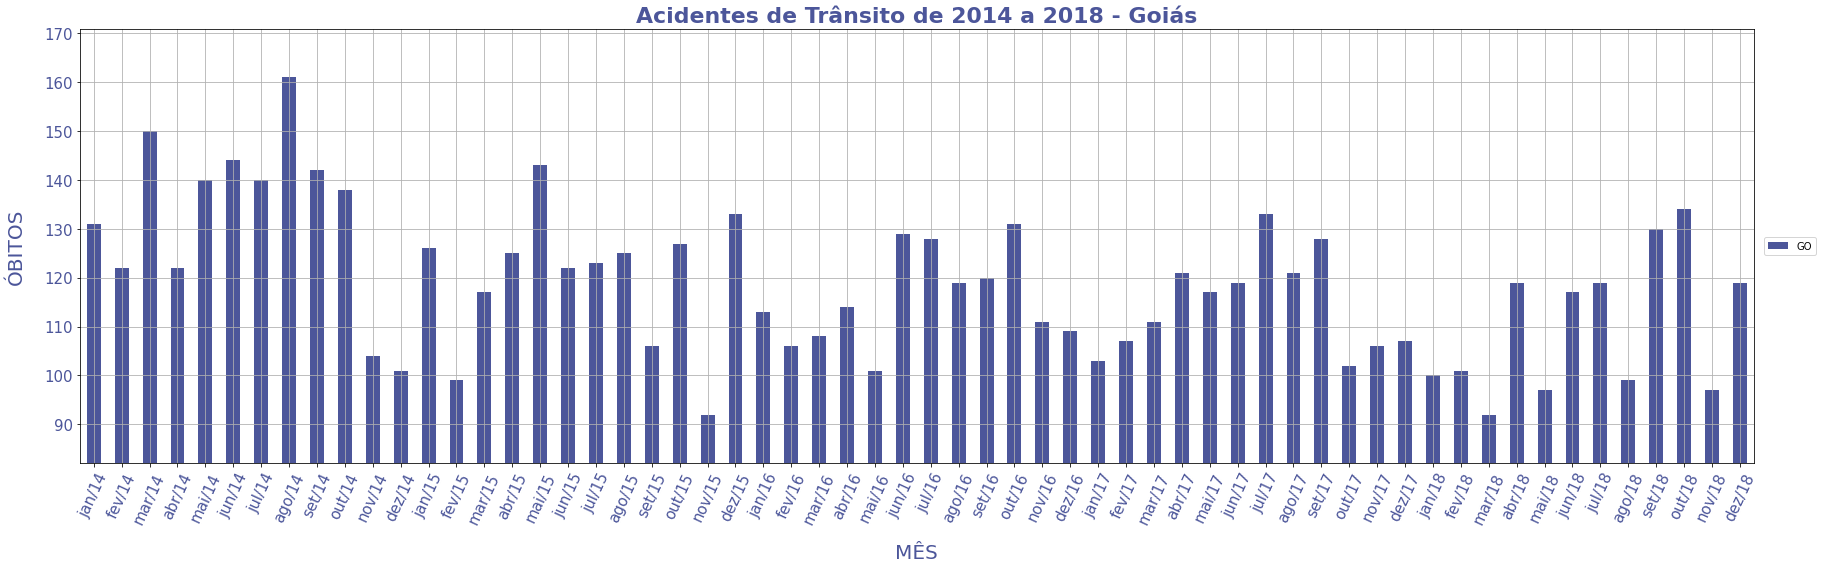

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Goiás"
- Mínimo: 92 óbitos em nov/15;
- Máximo: 161 óbitos em ago/14;
- Média:  119 óbitos por mês;
- Total 7121 mortes no período;
- Taxa de 100 óbitos a cada 100.000 habitantes.

11 -)


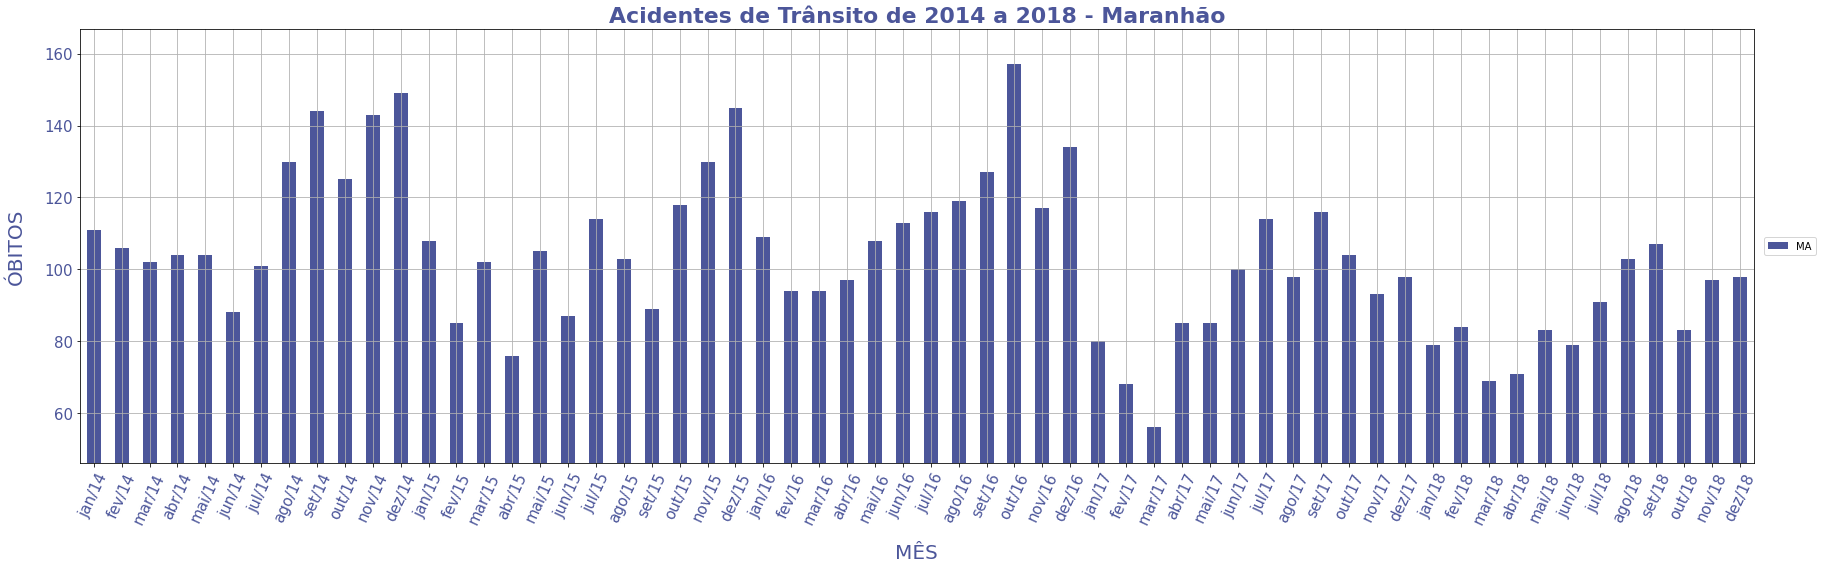

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Maranhão"
- Mínimo: 56 óbitos em mar/17;
- Máximo: 157 óbitos em out/16;
- Média:  103 óbitos por mês;
- Total 6195 mortes no período;
- Taxa de 87 óbitos a cada 100.000 habitantes.

12 -)


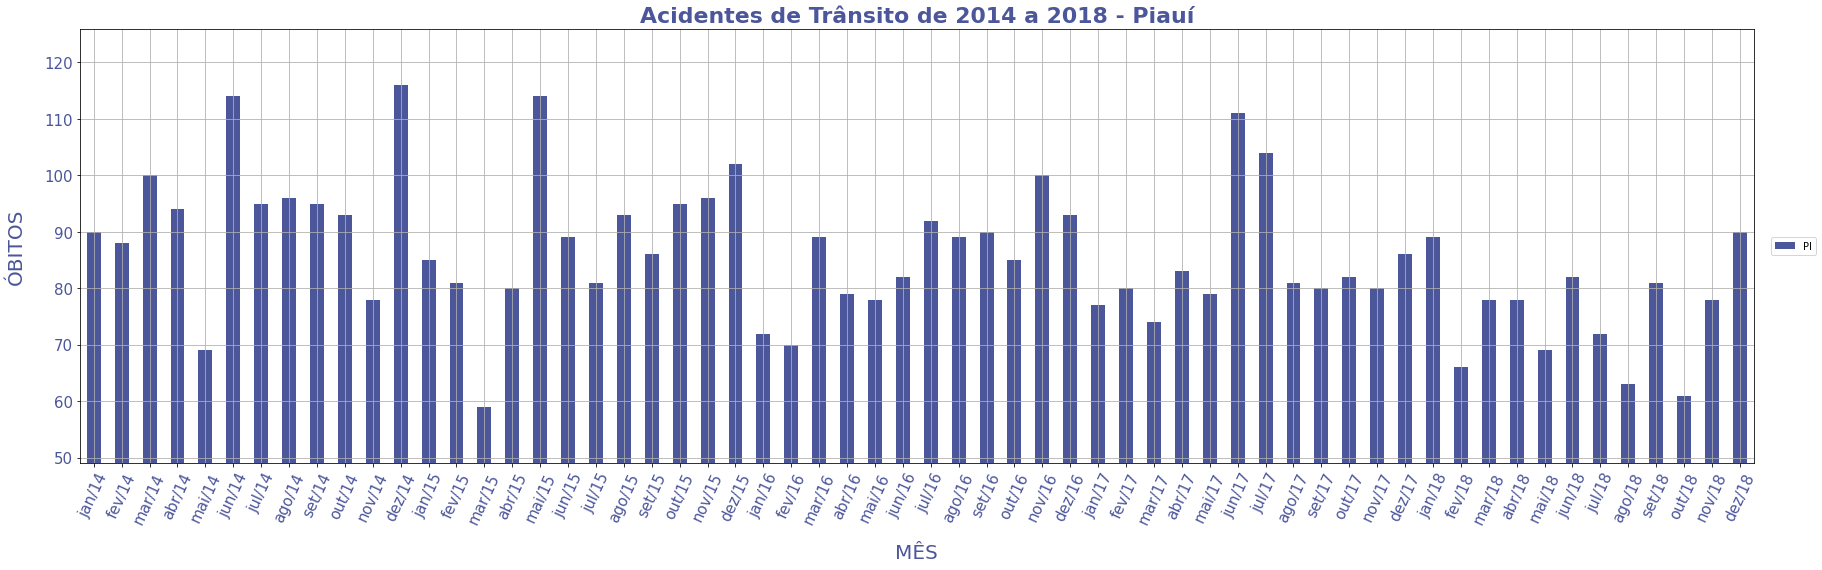

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Piauí"
- Mínimo: 59 óbitos em mar/15;
- Máximo: 116 óbitos em dez/14;
- Média:  86 óbitos por mês;
- Total 5132 mortes no período;
- Taxa de 156 óbitos a cada 100.000 habitantes.

13 -)


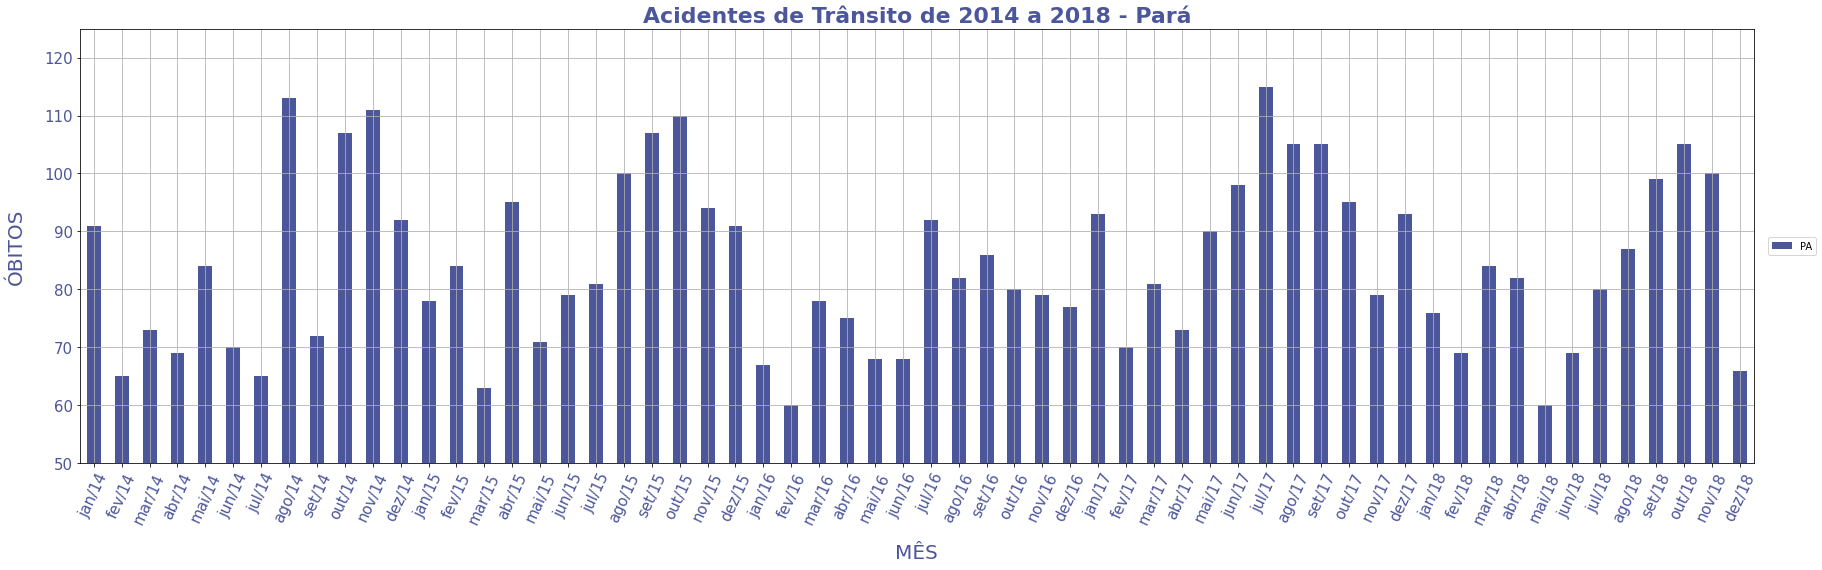

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Pará"
- Mínimo: 60 óbitos em fev/16;
- Máximo: 115 óbitos em jul/17;
- Média:  84 óbitos por mês;
- Total 5051 mortes no período;
- Taxa de 58 óbitos a cada 100.000 habitantes.

14 -)


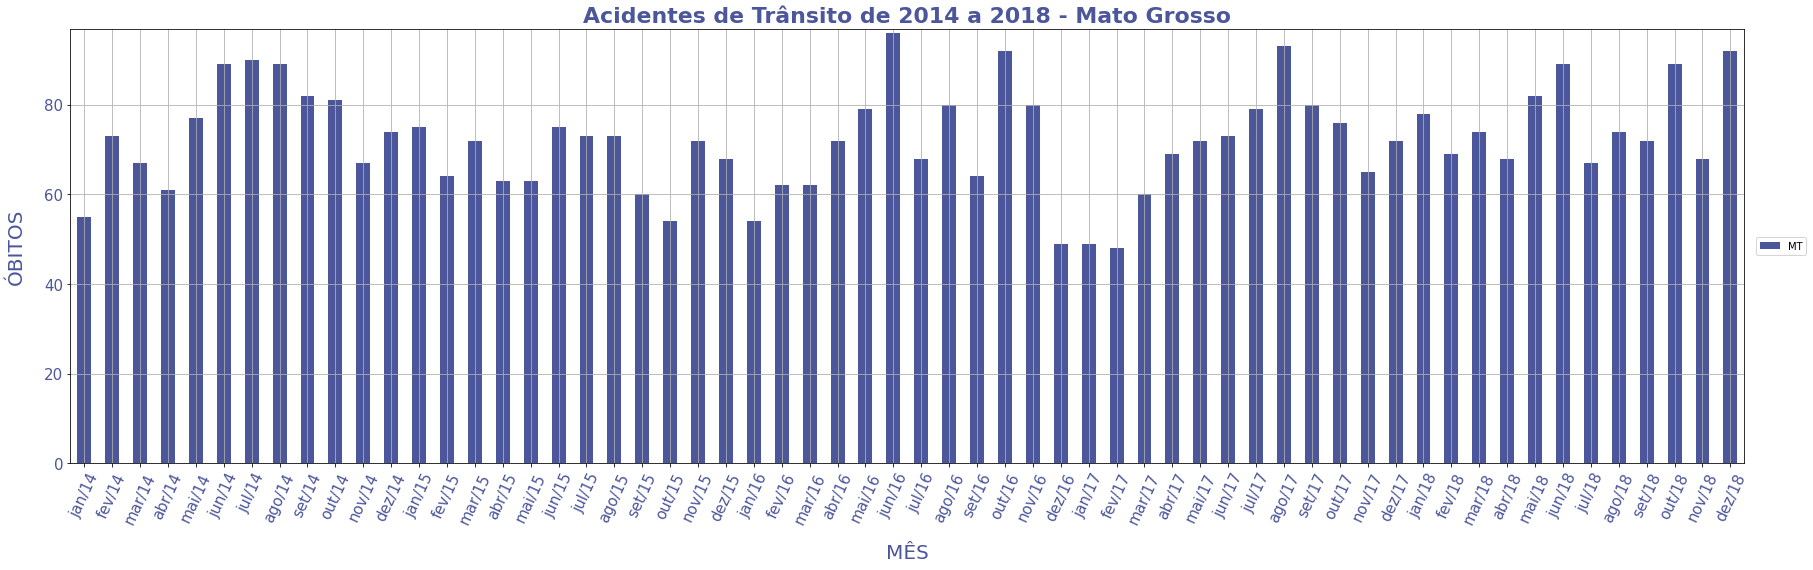

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Mato Grosso"
- Mínimo: 48 óbitos em fev/17;
- Máximo: 96 óbitos em jun/16;
- Média:  72 óbitos por mês;
- Total 4333 mortes no período;
- Taxa de 123 óbitos a cada 100.000 habitantes.

15 -)


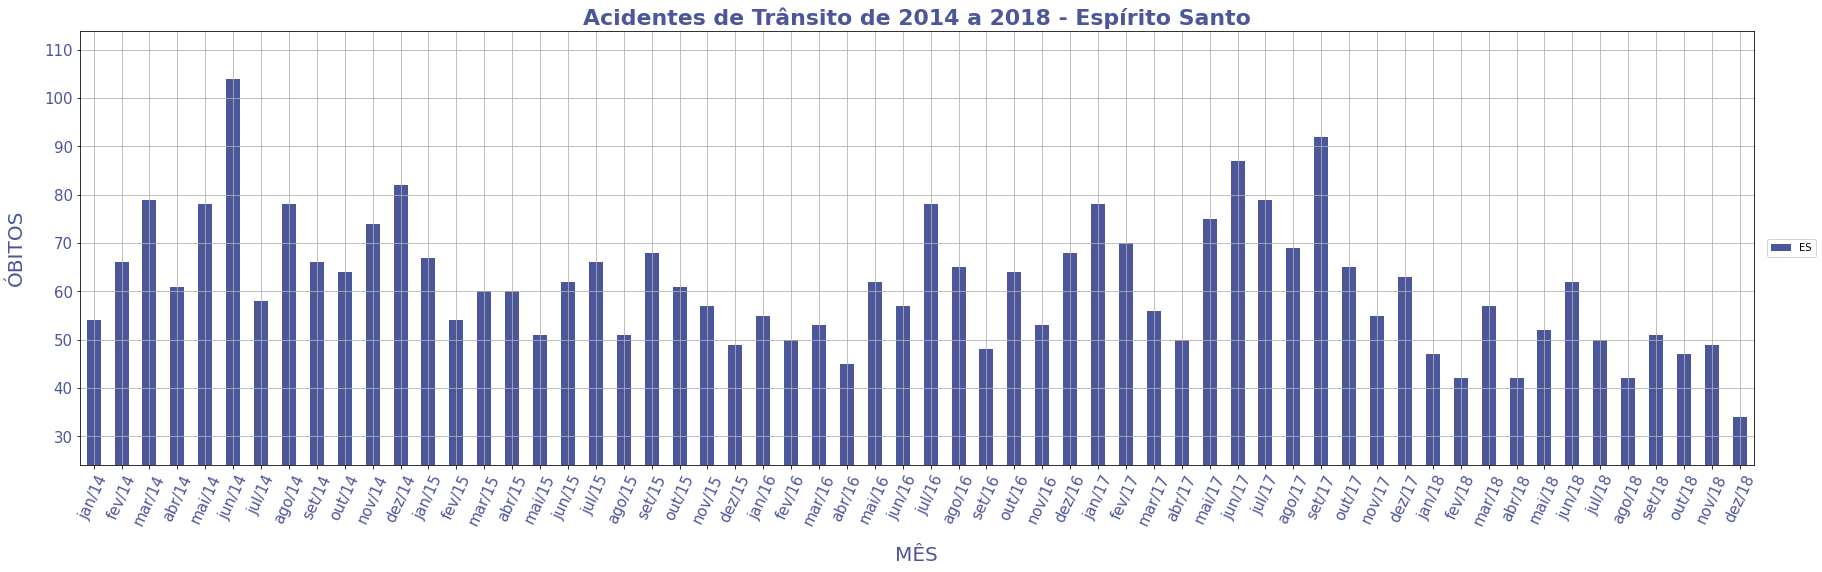

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Espírito Santo"
- Mínimo: 34 óbitos em dez/18;
- Máximo: 104 óbitos em jun/14;
- Média:  61 óbitos por mês;
- Total 3682 mortes no período;
- Taxa de 91 óbitos a cada 100.000 habitantes.

16 -)


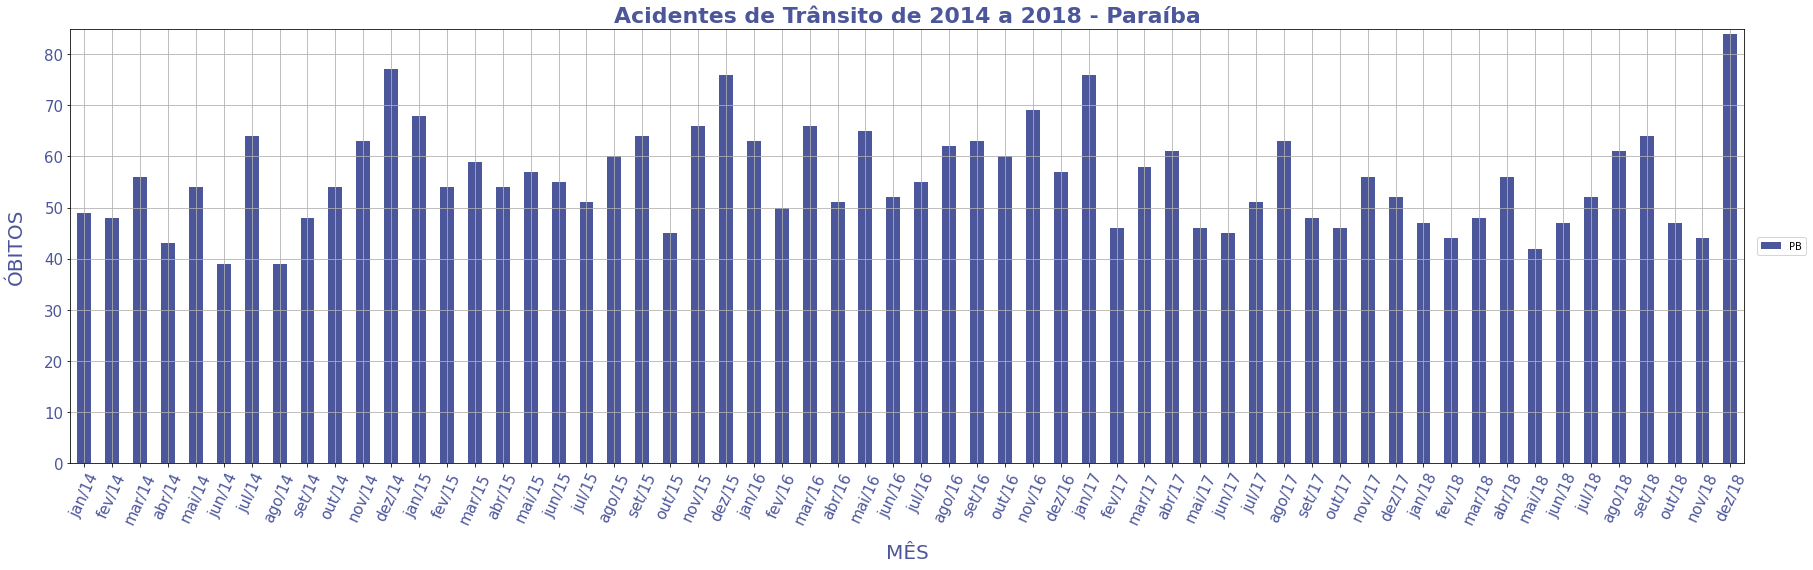

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Paraíba"
- Mínimo: 39 óbitos em jun/14;
- Máximo: 84 óbitos em dez/18;
- Média:  56 óbitos por mês;
- Total 3340 mortes no período;
- Taxa de 83 óbitos a cada 100.000 habitantes.

17 -)


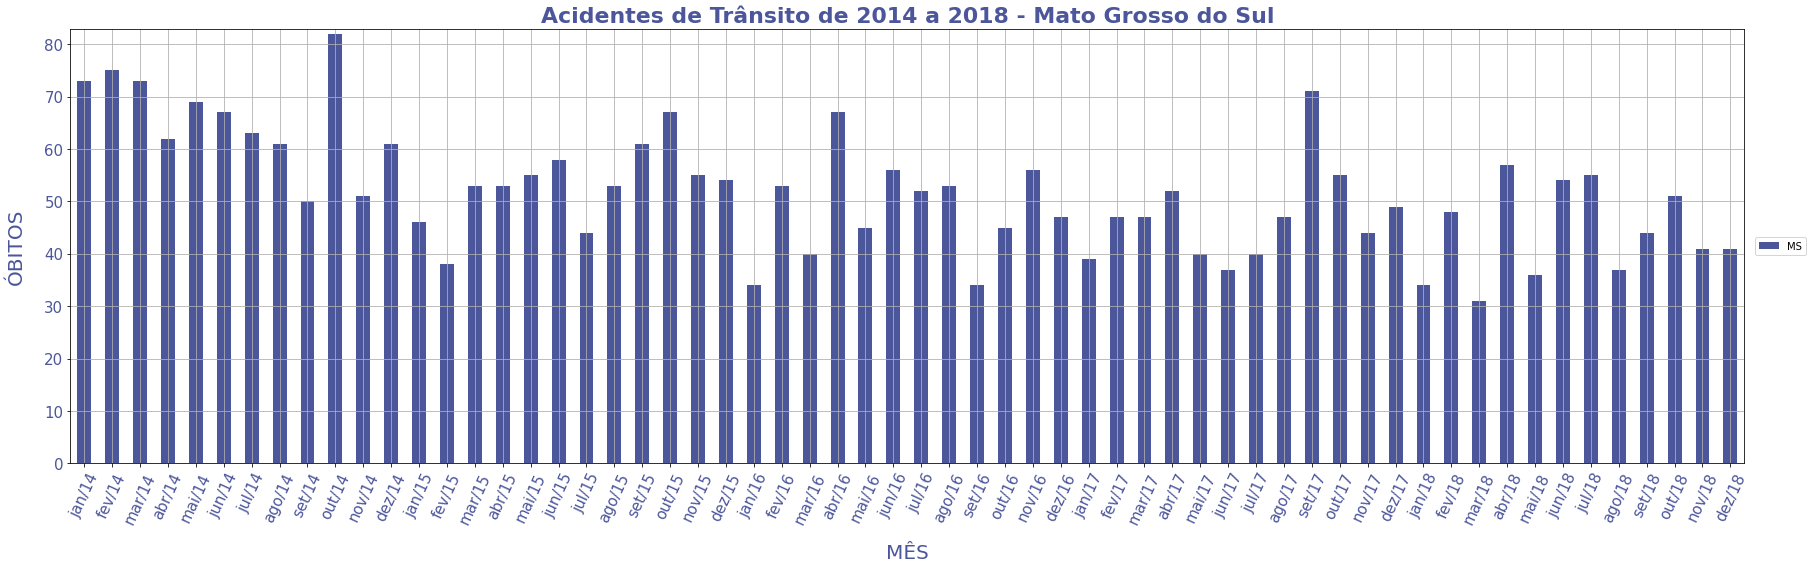

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Mato Grosso do Sul"
- Mínimo: 31 óbitos em mar/18;
- Máximo: 82 óbitos em out/14;
- Média:  52 óbitos por mês;
- Total 3103 mortes no período;
- Taxa de 110 óbitos a cada 100.000 habitantes.

18 -)


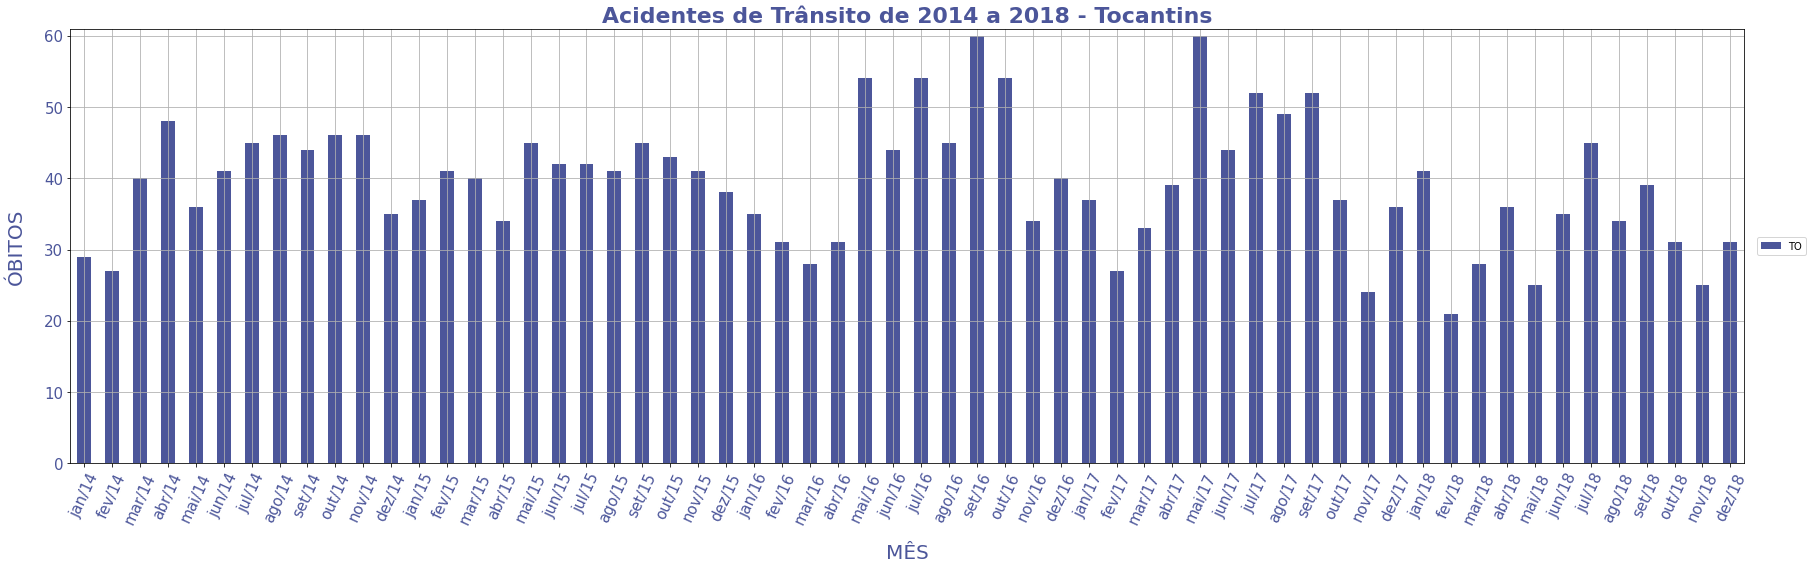

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Tocantins"
- Mínimo: 21 óbitos em fev/18;
- Máximo: 60 óbitos em set/16;
- Média:  39 óbitos por mês;
- Total 2363 mortes no período;
- Taxa de 149 óbitos a cada 100.000 habitantes.

19 -)


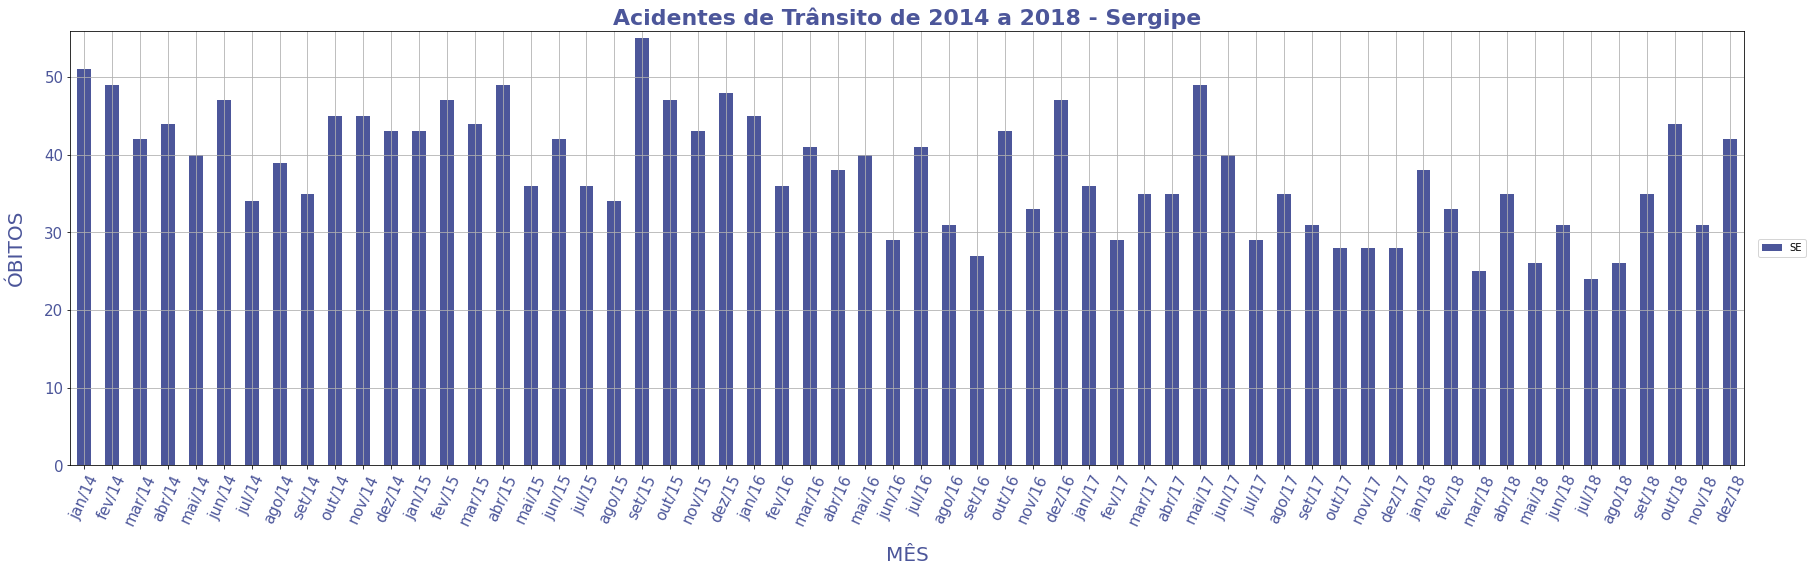

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Sergipe"
- Mínimo: 24 óbitos em jul/18;
- Máximo: 55 óbitos em set/15;
- Média:  38 óbitos por mês;
- Total 2282 mortes no período;
- Taxa de 98 óbitos a cada 100.000 habitantes.

20 -)


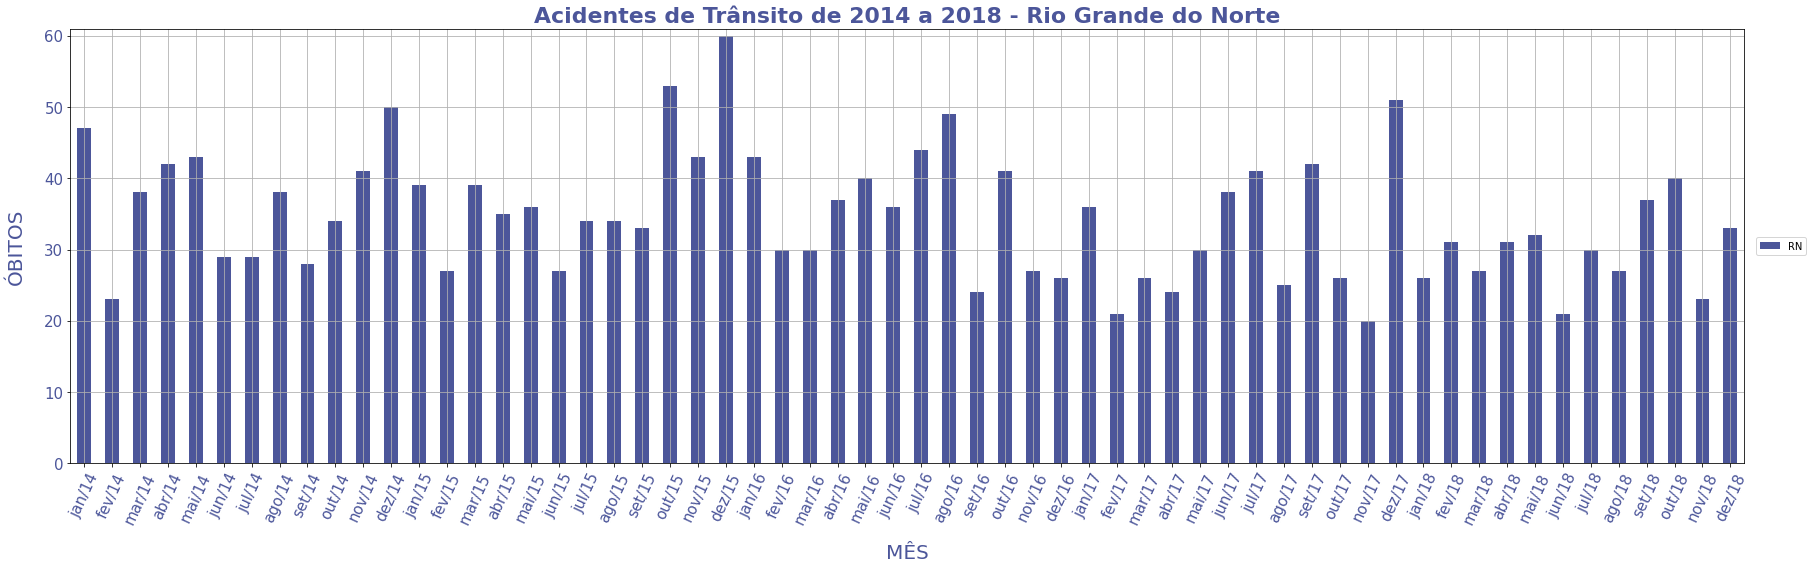

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Rio Grande do Norte"
- Mínimo: 20 óbitos em nov/17;
- Máximo: 60 óbitos em dez/15;
- Média:  34 óbitos por mês;
- Total 2067 mortes no período;
- Taxa de 58 óbitos a cada 100.000 habitantes.

21 -)


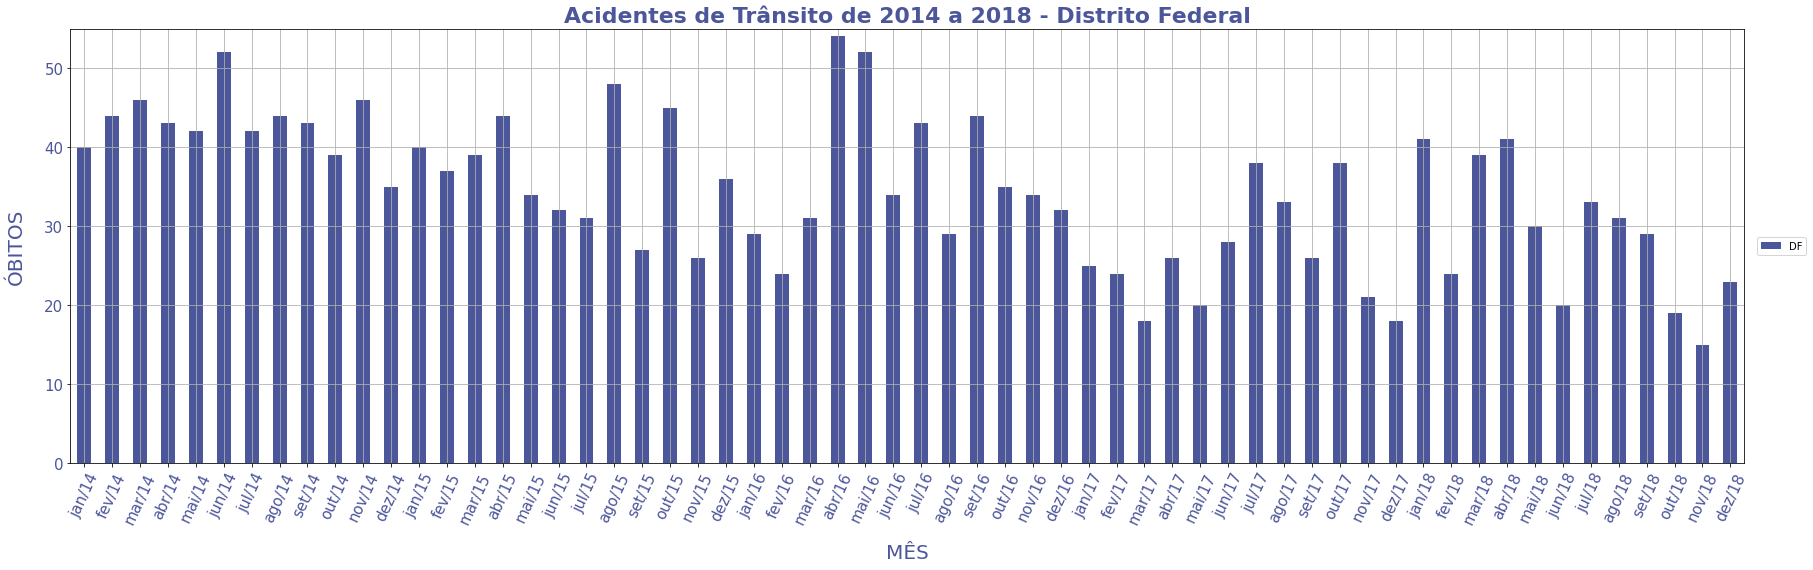

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Distrito Federal"
- Mínimo: 15 óbitos em nov/18;
- Máximo: 54 óbitos em abr/16;
- Média:  34 óbitos por mês;
- Total 2056 mortes no período;
- Taxa de 67 óbitos a cada 100.000 habitantes.

22 -)


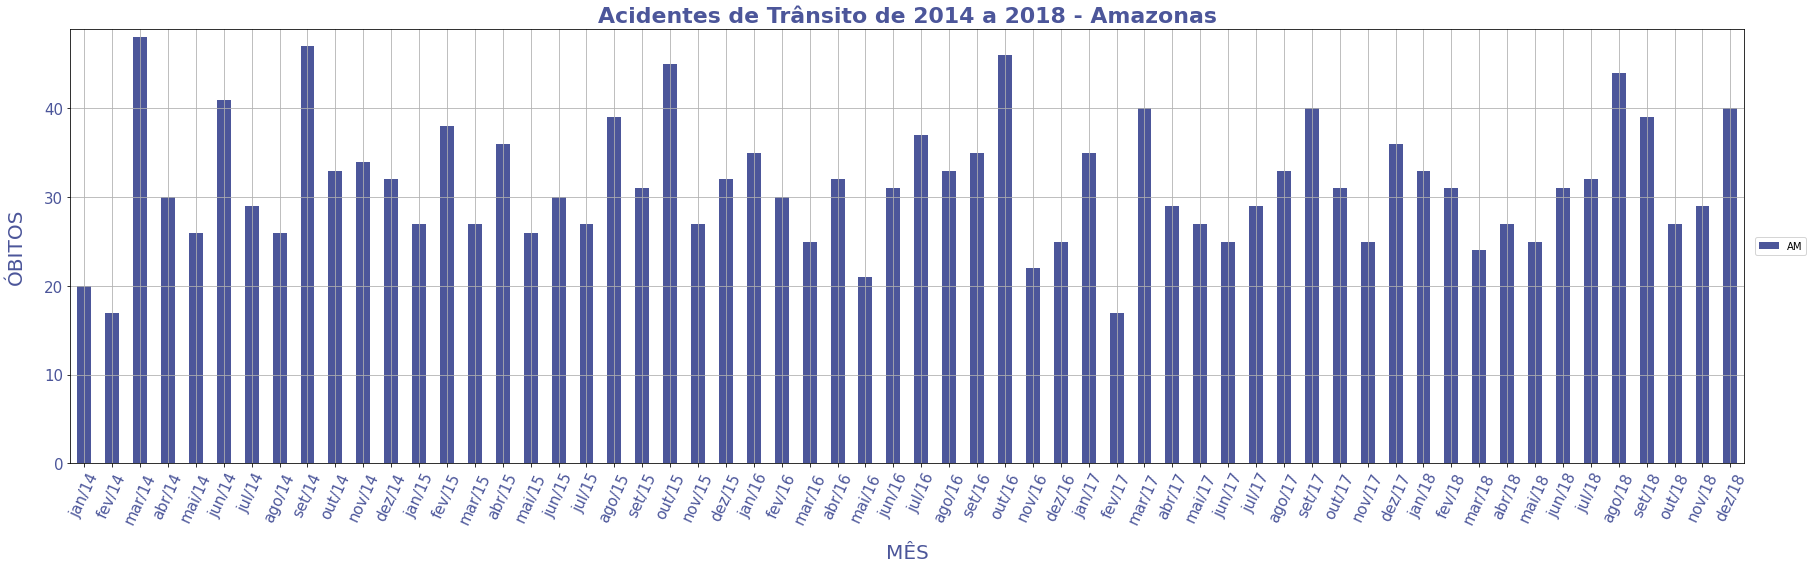

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Amazonas"
- Mínimo: 17 óbitos em fev/14;
- Máximo: 48 óbitos em mar/14;
- Média:  31 óbitos por mês;
- Total 1889 mortes no período;
- Taxa de 45 óbitos a cada 100.000 habitantes.

23 -)


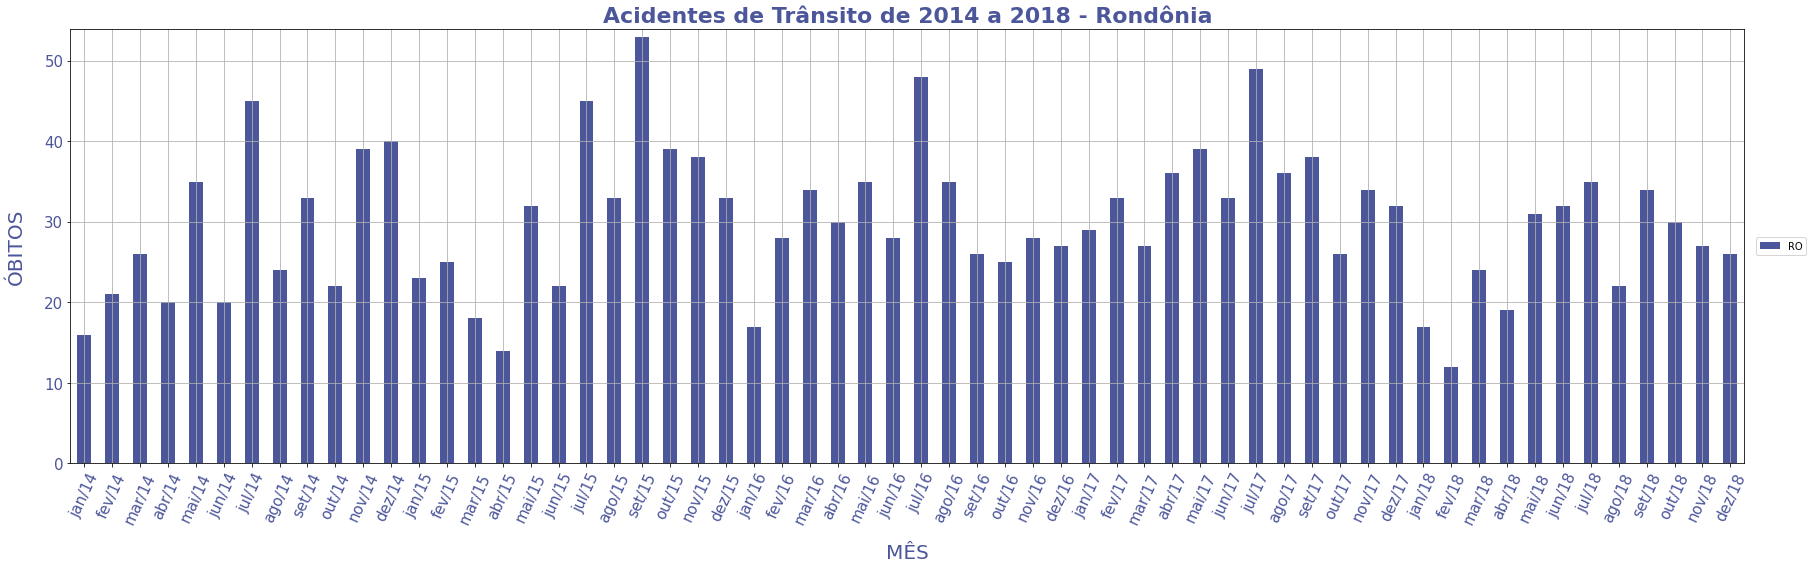

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Rondônia"
- Mínimo: 12 óbitos em fev/18;
- Máximo: 53 óbitos em set/15;
- Média:  30 óbitos por mês;
- Total 1798 mortes no período;
- Taxa de 100 óbitos a cada 100.000 habitantes.

24 -)


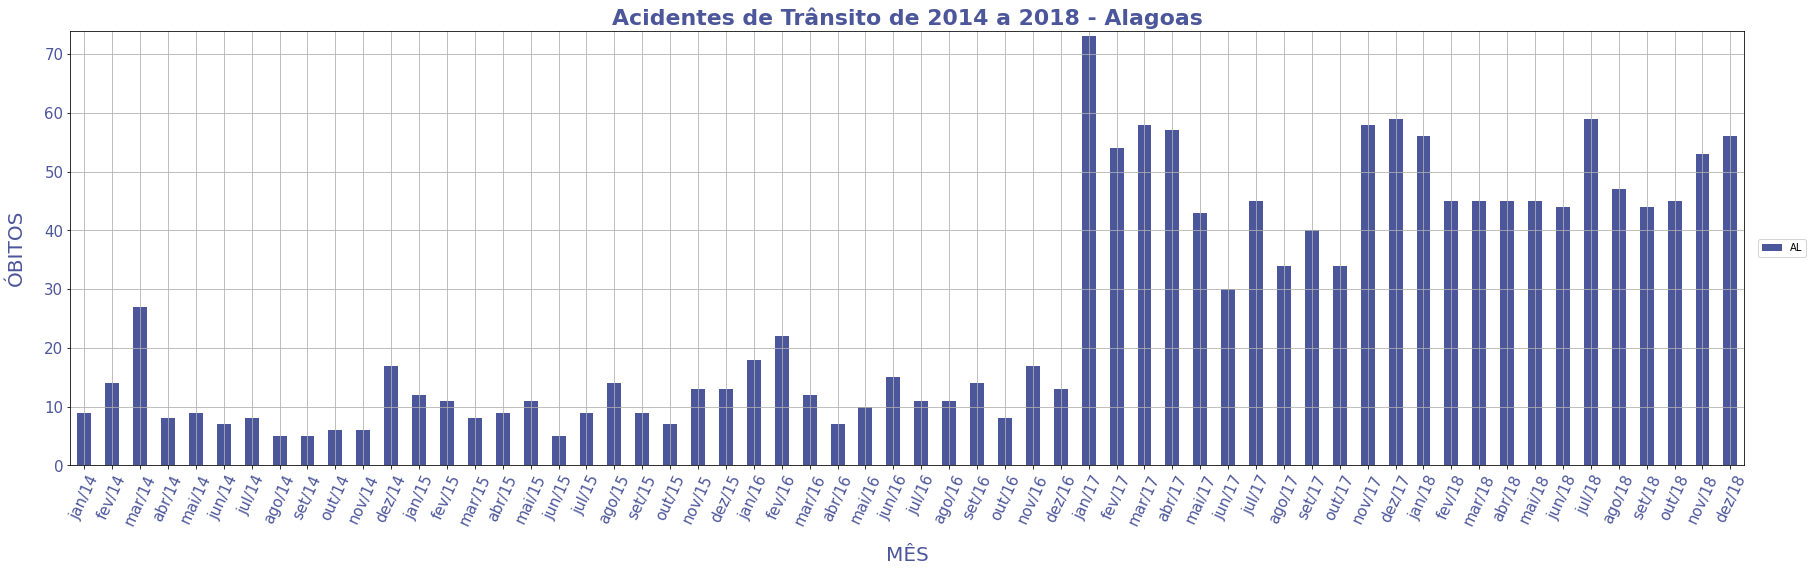

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Alagoas"
- Mínimo: 5 óbitos em ago/14;
- Máximo: 73 óbitos em jan/17;
- Média:  26 óbitos por mês;
- Total 1569 mortes no período;
- Taxa de 47 óbitos a cada 100.000 habitantes.

25 -)


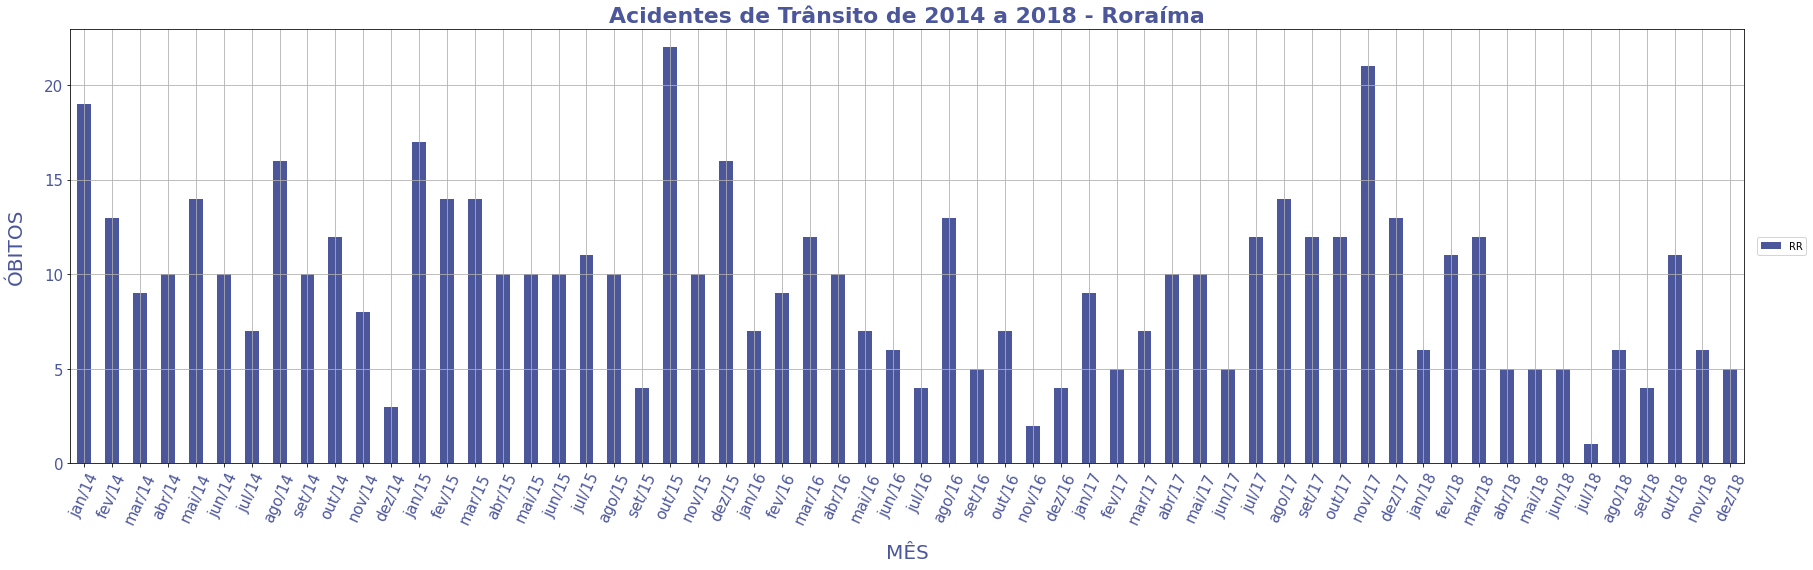

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Roraíma"
- Mínimo: 1 óbitos em jul/18;
- Máximo: 22 óbitos em out/15;
- Média:  10 óbitos por mês;
- Total 572 mortes no período;
- Taxa de 91 óbitos a cada 100.000 habitantes.

26 -)


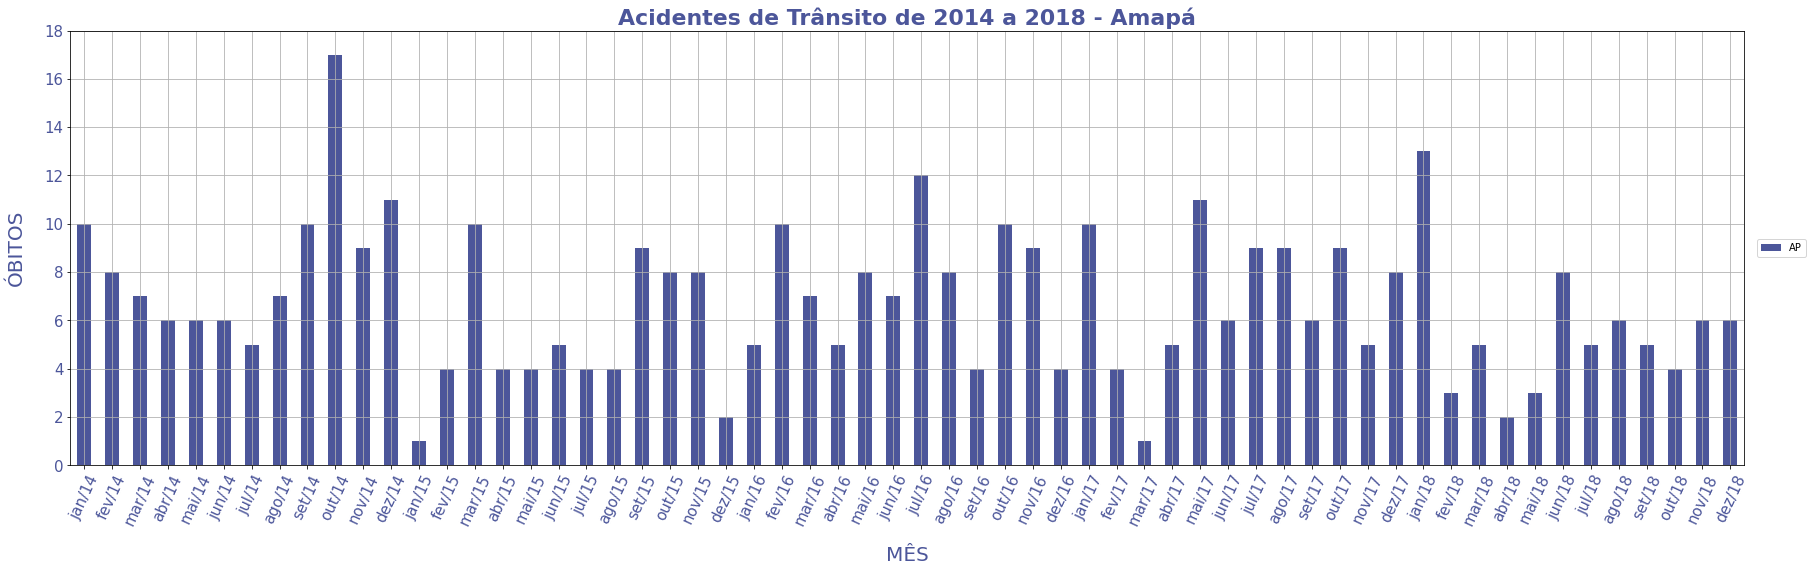

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Amapá"
- Mínimo: 1 óbitos em jan/15;
- Máximo: 17 óbitos em out/14;
- Média:  7 óbitos por mês;
- Total 403 mortes no período;
- Taxa de 47 óbitos a cada 100.000 habitantes.

27 -)


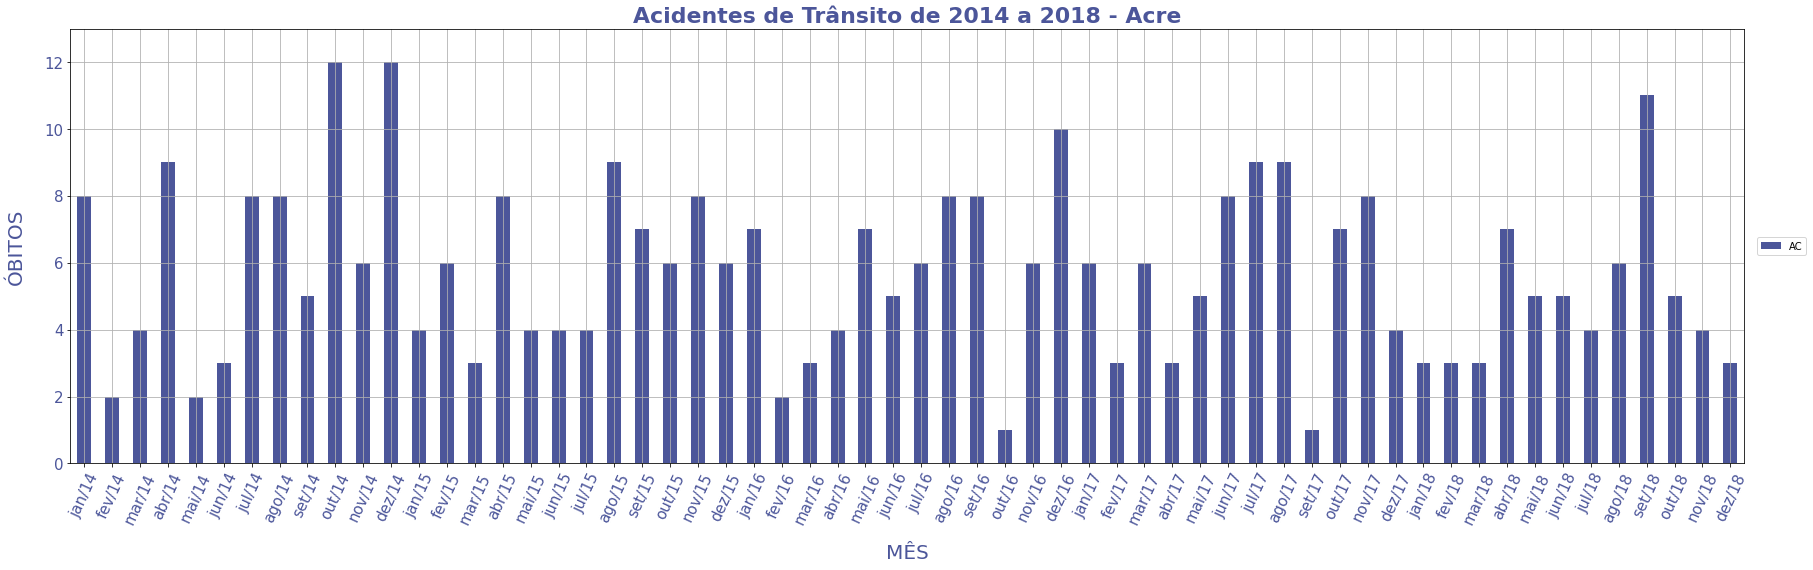

Gráfico: "Acidentes de Trânsito de 2014 a 2018 - Acre"
- Mínimo: 1 óbitos em out/16;
- Máximo: 12 óbitos em out/14;
- Média:  6 óbitos por mês;
- Total 343 mortes no período;
- Taxa de 38 óbitos a cada 100.000 habitantes.


In [ ]:
cont = 1
for estado in estados:
    print()
    print(cont,'-)')
    plot_UF_mes(estado[0])
    cont+=1

## **Análise da série de gráficos "Acidentes de Trânsito de 2014 a 2018" por Estado:**<p>

Relatório Geral para todos os estados:<p>

> **São Paulo** apresentou índices com o valor mínimo da série de 238 óbitos em jan/18, o valor máximo de 531 óbitos em mai/14, média de 371 óbitos por mês e um total 22281 mortes no período, com uma taxa de 48 óbitos a cada 100.000 habitantes.<p>

> **Minas Gerais** apresentou índices com o valor mínimo da série de 201 óbitos em fev/16, o valor máximo de 355 óbitos em jul/17, média de 269 óbitos por mês e um total 16123 mortes no período, com uma taxa de 76 óbitos a cada 100.000 habitantes.<p>

> **Paraná** apresentou índices com o valor mínimo da série de 140 óbitos em fev/15, o valor máximo de 271 óbitos em mar/14, média de 191 óbitos por mês e um total 11468 mortes no período, com uma taxa de 100 óbitos a cada 100.000 habitantes.<p>

> **Bahia** apresentou índices com o valor mínimo da série de 98 óbitos em fev/18, o valor máximo de 192 óbitos em dez/14, média de 145 óbitos por mês e um total 8718 mortes no período, com uma taxa de 58 óbitos a cada 100.000 habitantes.<p>

> **Pernambuco** apresentou índices com o valor mínimo da série de 103 óbitos em out/18, o valor máximo de 170 óbitos em set/16, média de 135 óbitos por mês e um total 8093 mortes no período, com uma taxa de 84 óbitos a cada 100.000 habitantes.<p>

> **Rio de Janeiro** apresentou índices com o valor mínimo da série de 85 óbitos em nov/16, o valor máximo de 197 óbitos em mar/14, média de 134 óbitos por mês e um total 8054 mortes no período, com uma taxa de 46 óbitos a cada 100.000 habitantes.<p>

> **Rio Grande do Sul** apresentou índices com o valor mínimo da série de 76 óbitos em out/15, o valor máximo de 171 óbitos em abr/18, média de 125 óbitos por mês e um total 7514 mortes no período, com uma taxa de 66 óbitos a cada 100.000 habitantes.<p>

> **Santa Catarina** apresentou índices com o valor mínimo da série de 93 óbitos em nov/18, o valor máximo de 197 óbitos em mar/15, média de 122 óbitos por mês e um total 7336 mortes no período, com uma taxa de 101 óbitos a cada 100.000 habitantes.<p>

> **Ceará** apresentou índices com o valor mínimo da série de 81 óbitos em abr/18, o valor máximo de 174 óbitos em dez/15, média de 121 óbitos por mês e um total 7232 mortes no período, com uma taxa de 79 óbitos a cada 100.000 habitantes.<p>

> **Goiás** apresentou índices com o valor mínimo da série de 92 óbitos em nov/15, o valor máximo de 161 óbitos em ago/14, média de 119 óbitos por mês e um total 7121 mortes no período, com uma taxa de 100 óbitos a cada 100.000 habitantes.<p>

> **Maranhão** apresentou índices com o valor mínimo da série de 56 óbitos em mar/17, o valor máximo de 157 óbitos em out/16, média de 103 óbitos por mês e um total 6195 mortes no período, com uma taxa de 87 óbitos a cada 100.000 habitantes.<p>

> **Piauí** apresentou índices com o valor mínimo da série de 59 óbitos em mar/15, o valor máximo de 116 óbitos em dez/14, média de 86 óbitos por mês e um total 5132 mortes no período, com uma taxa de 156 óbitos a cada 100.000 habitantes.<p>

> **Pará** apresentou índices com o valor mínimo da série de 60 óbitos em fev/16, o valor máximo de 115 óbitos em jul/17, média de 84 óbitos por mês e um total 5051 mortes no período, com uma taxa de 58 óbitos a cada 100.000 habitantes.<p>

> **Mato Grosso** apresentou índices com o valor mínimo da série de 48 óbitos em fev/17, o valor máximo de 96 óbitos em jun/16, média de 72 óbitos por mês e um total 4333 mortes no período, com uma taxa de 123 óbitos a cada 100.000 habitantes.<p>

> **Espírito Santo** apresentou índices com o valor mínimo da série de 34 óbitos em dez/18, o valor máximo de 104 óbitos em jun/14, média de 61 óbitos por mês e um total 3682 mortes no período, com uma taxa de 91 óbitos a cada 100.000 habitantes.<p>

> **Paraíba** apresentou índices com o valor mínimo da série de 39 óbitos em jun/14, o valor máximo de 84 óbitos em dez/18, média de 56 óbitos por mês e um total 3340 mortes no período, com uma taxa de 83 óbitos a cada 100.000 habitantes.<p>

> **Mato Grosso do Sul** apresentou índices com o valor mínimo da série de 31 óbitos em mar/18, o valor máximo de 82 óbitos em out/14, média de 52 óbitos por mês e um total 3103 mortes no período, com uma taxa de 110 óbitos a cada 100.000 habitantes.<p>

> **Tocantins** apresentou índices com o valor mínimo da série de 21 óbitos em fev/18, o valor máximo de 60 óbitos em set/16, média de 39 óbitos por mês e um total 2363 mortes no período, com uma taxa de 149 óbitos a cada 100.000 habitantes.<p>

> **Sergipe** apresentou índices com o valor mínimo da série de 24 óbitos em jul/18, o valor máximo de 55 óbitos em set/15, média de 38 óbitos por mês e um total 2282 mortes no período, com uma taxa de 98 óbitos a cada 100.000 habitantes.<p>

> **Rio Grande do Norte** apresentou índices com o valor mínimo da série de 20 óbitos em nov/17, o valor máximo de 60 óbitos em dez/15, média de 34 óbitos por mês e um total 2067 mortes no período, com uma taxa de 58 óbitos a cada 100.000 habitantes.<p>

> **Distrito Federal** apresentou índices com o valor mínimo da série de 15 óbitos em nov/18, o valor máximo de 54 óbitos em abr/16, média de 34 óbitos por mês e um total 2056 mortes no período, com uma taxa de 67 óbitos a cada 100.000 habitantes.<p>

> **Amazonas** apresentou índices com o valor mínimo da série de 17 óbitos em fev/14, o valor máximo de 48 óbitos em mar/14, média de 31 óbitos por mês e um total 1889 mortes no período, com uma taxa de 45 óbitos a cada 100.000 habitantes.<p>

> **Rondônia** apresentou índices com o valor mínimo da série de 12 óbitos em fev/18, o valor máximo de 53 óbitos em set/15, média de 30 óbitos por mês e um total 1798 mortes no período, com uma taxa de 100 óbitos a cada 100.000 habitantes.<p>

> **Alagoas** apresentou índices com o valor mínimo da série de 5 óbitos em ago/14, o valor máximo de 73 óbitos em jan/17, média de 26 óbitos por mês e um total 1569 mortes no período, com uma taxa de 47 óbitos a cada 100.000 habitantes.<p>

> **Roraíma** apresentou índices com o valor mínimo da série de 1 óbitos em jul/18, o valor máximo de 22 óbitos em out/15, média de 10 óbitos por mês e um total 572 mortes no período, com uma taxa de 91 óbitos a cada 100.000 habitantes.<p>

> **Amapá** apresentou índices com o valor mínimo da série de 1 óbitos em jan/15, o valor máximo de 17 óbitos em out/14, média de 7 óbitos por mês e um total 403 mortes no período, com uma taxa de 47 óbitos a cada 100.000 habitantes.<p>

> **Acre** apresentou índices com o valor mínimo da série de 1 óbitos em out/16, o valor máximo de 12 óbitos em out/14, média de 6 óbitos por mês e um total 343 mortes no período, com uma taxa de 38 óbitos a cada 100.000 habitantes.<p>

>**Quandidade de óbitos para 100 mil habitantes:**<p>
1º - Piauí: 156.39;<p>
2º - Tocantins: 148.59;<p>
3º - Mato Grosso: 122.88;<p>
4º - Mato Grosso do Sul: 110.45;<p>
5º - Santa Catarina: 101.15;<p>
6º - Goiás: 100.10;<p>
7º - Rondônia: 100.09;<p>
8º - Paraná: 99.58;<p>
9º - Sergipe: 98.41;<p>
10º - Roraíma: 90.62;<p>
11º - Espírito Santo: 90.60;<p>
12º - Maranhão: 87.07;<p>
13º - Pernambuco: 84.16;<p>
14º - Paraíba: 82.69;<p>
15º - Ceará: 78.72;<p>
16º - Minas Gerais: 75.72;<p>
17º - Distrito Federal: 67.30;<p>
18º - Rio Grande do Sul: 65.78;<p>
19º - Rio Grande do Norte: 58.49;<p>
20º - Bahia: 58.39;<p>
21º - Pará: 58.12;<p>
22º - São Paulo: 48.13;<p>
23º - Alagoas: 46.81;<p>
24º - Amapá: 46.76;<p>
25º - Rio de Janeiro: 46.38;<p>
26º - Amazonas: 44.89;<p>
27º - Acre: 38.35.<p>

>**Quantidade de habitantes por estado em 2020 de acordo com o IBGE:** <p>
1º - São Paulo: 46289333 habitantes;<p>
2º - Minas Gerais: 21292666 habitantes;<p>
3º - Rio de Janeiro: 17366189 habitantes;<p>
4º - Bahia: 14930634 habitantes;<p>
5º - Paraná: 11516840 habitantes;<p>
6º - Rio Grande do Sul: 11422973 habitantes;<p>
7º - Pernambuco: 9616621 habitantes;<p>
8º - Ceará: 9187103 habitantes;<p>
9º - Pará: 8690745 habitantes;<p>
10º - Santa Catarina: 7252502 habitantes;<p>
11º - Maranhão: 7114598 habitantes;<p>
12º - Goiás: 7113540 habitantes;<p>
13º - Amazonas: 4207714 habitantes;<p>
14º - Espírito Santo: 4064052 habitantes;<p>
15º - Paraíba: 4039277 habitantes;<p>
16º - Rio Grande do Norte: 3534165 habitantes;<p>
17º - Mato Grosso: 3526220 habitantes;<p>
18º - Alagoas: 3351543 habitantes;<p>
19º - Piauí: 3281480 habitantes;<p>
20º - Distrito Federal: 3055149 habitantes;<p>
21º - Mato Grosso do Sul: 2809394 habitantes;<p>
22º - Sergipe: 2318822 habitantes;<p>
23º - Rondônia: 1796460 habitantes;<p>
24º - Tocantins: 1590248 habitantes;<p>
25º - Acre: 894470 habitantes;<p>
26º - Amapá: 861773 habitantes;<p>
27º - Roraíma: 631181 habitantes.<p>
**Frota de Veículos por Estado:**<p>
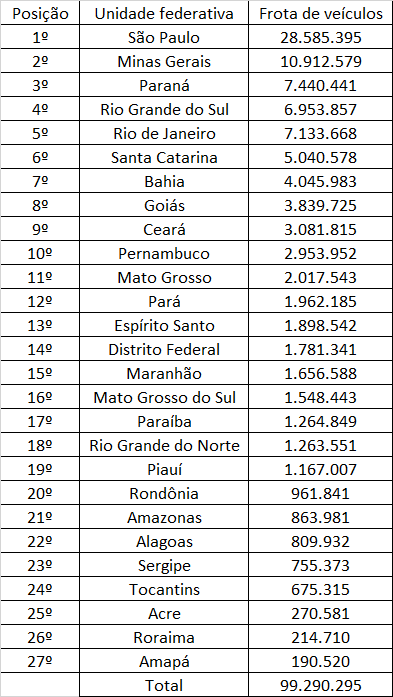

**Fonte:**<p>
 IBGE, IBGE (27 de agosto de 2020). «Estimativa Populacional 2020». ibge.gov.br. Consultado em 27 de agosto de 2020 - ftp://ftp.ibge.gov.br/<p>
Estimativas_de_Populacao/Estimativas_2020/estimativa_dou_2020.xls <p>
 https://cidades.ibge.gov.br/brasil/pesquisa/22/28120?indicador=28120 <p>
 https://agenciadenoticias.ibge.gov.br/media/com_mediaibge/arquivos/3ab72e84b974fe7e319496552fb560bb.xlsx<p>

##**Análise dos óbitos por estados ao longo do período:**<p>
>**São Paulo** é o estado com mais óbitos de todos, o que sem dúvida é um dado preocupante, contudo também, talvez seja o estado com a maior quantidade de políticas públicas, e muitas vêm sendo aplicadas no últimos anos, possuí a maior frota de veículos de todo o país e também é o mais populoso.<p>
Podemos notar no gráfico uma forte queda nos óbitos na série, uma forte atuação de sazonalidade, ou seja, nos meses de férias escolares ocorrem quedas significativas na quantidade de óbitos.<p>
Outro dado que gostaria de destacar, é que apesar de ser o estado com o maior número de óbitos, se considerarmos a taxa de óbitos pela quantidade de habitantes, veremos que o estado está entre os mais seguros, sendo o 22º em número de mortes.<p>
>**Minas Gerais** é um estado muito grande, seja em extensão seja pela quantidade de habitantes, o segundo mais populoso, é o segundo estado em quantidade de óbitos, porém devemos perceber que é o 16º se considerarmos a quantidade de habitantes, sendo depois de São Paulo o segundo estado mais populoso e a segunda maior frota de veículos.<p>
Assim como em São Paulo o gráfico apresenta uma redução na quantidade de óbitos durante a evolução da série, e também temos ação de sazonalidade, mas menor se comparado com o gráfico de São Paulo.<p>
**Paraná** é o estado o mais populoso da região sul e quinto mais populoso, possuí também a terceira maior frota do país, é o 8º com mais óbitos por habitante e o terceiro em número de óbitos de todas as série.<p>
O gráfico possui variações de sazonalidade, indicando reduções de óbitos nos meses de férias escolares, e podemos perceber uma queda nos casos apenas a partir do segundo ano, demonstrando uma certa estabilidade ao longo do período, o que não é bom, pois indica que ou não houveram políticas públicas ou foram inadquadas e insuficientes.<p>
**Bahia** é o quarto estado em número de óbitos, e também o quarto em número de habitantes, contudo se considerarmos a taxa de óbitos pela quantidade de habitantes é o 20º, possuí a sétima maior frota de veículos.<p>
Podemos verificar analisando o gráfico que não existe padrões de temporariedade bem definidos, talvez por ser um estado com forte cultura turística, é possível notar uma forte tendência de queda de óbitos ao logo da série.<p>
**Pernanbuco** é o sétimo estado em quantidade de habitantes, contando com a 10º maior frota, o quinto com mais óbitos da série, e o 13º se considerarmos as taxas de óbitos em relação a quantidade de habitantes.<p>
Aparemente houve uma queda apenas em 2018, se mantendo estável nos anos anteriores, não é possível identificar pontos de sazonalidade, sendo que o gráfico aparenta quedas irregulares em meses aleatórios.<p>
**Rio de Janeiro** é o terceiro estado mais populoso, o 5º com mais veículos, o sexto com maior número de óbitos, figurando em 25º levando em conta a taxa de óbitos pela população do estado, o que o coloca entre os estados mais seguros, apesar do trânsito carioca ser sabidamente uma loucura.<p>
Analisando os gráficos não é possível visualizar pontos de sazionalidade, podemos perceber que houve uma forte queda a partir de janeiro de 2016, que se manteve, até subir levemente em 2018, não retornando aos mesmos patamares, mas ainda sim exigindo a retomada de mais políticas que possam reduzir os índices.<p>
**Rio Grande do Sul** é o sexto estado mais populoso, é o quarto estado em quantidade de veículos, o sétimo da série com mais óbitos e o 18º estado considerando os óbitos pela população.<p>
Analisando os gráficos não existe perfis de sazonalidade e nem podemos identificar padrões de queda, o que indica políticas pública ineficazes ou insuficientes.<p>
**Santa Catarina** é o décimo estado mais populoso, é o oitavo com mais casos de óbitos, e o quinto mais violento considerando a taxa de óbitos por habitantes, possuí sexta maior frota.<p>
Em análise ao gráfico podemos notar um padrão com uma queda muito leve nos índices de óbitos ao longo da série, praticamente estável, considerando que a quantidade de óbitos é alta, em relação a quantidade de habitantes, o estado carece de políticas públicas adequadas para a melhora do quadro.<p>
**Ceará** é o oitavo estado mais populoso, a nona maior frota de veículos, o nono com maior número de óbitos e o 15º considerando a taxa de óbitos por habitantes, fica na região nordeste, e também tem características turísticas.<p>
No gráfico podemos notar pontos de sacionalidade, e se considerarmos as áreas dos gráficos é possível notar quedas sutis nos óbitos ao longo da série. O que indica que pode haver uma redução por conta da campanhas públicas, ou simplesmente uma casualidade, levando em conta que não vemos nenhum ponto de corte onde abruptamente a série mudou para uma intenção de queda.<p>
**Goiás** é o estado do centro-oeste com maior número de óbitos, sendo o décimo estado em número de mortes, é 12º estado mais populoso, e o oitavo em quantidade de véiculos, se considerarmos a taxa por habitantes é sexto menos seguro.<p>
Podemos ver alguns padrões de sazionalidade pequenos e sutil queda analisando o gráfico, mas não podemos dizer que houve efetiva atuação do poder público em políticas de redução de acidentes.<p>
**Maranhão** esse estado é o 11º com maior quantidade de óbitos em acidentes de trânsito no período, tendo a décima maior frota da veículos, é o sétimo mais populoso e o 13º mais perigoso considerando a taxa de óbitos por habitantes.<p>
Nós podemos observar analisando as áreas do gráfico, que a partir de 2017 o estado entrou de redução do número de óbitos, e pode indicar alguma política de redução de acidentes.<p>
**Piauí** é o estado mais violento considerando a taxa de óbitos para cada 100 mil habitantes, possuí a 19ª maior frota do país, é também o 19º estado mais populoso, é o 12º estado com mais óbitos.<p>
O gráfico se mantém praticamente estável com 5 picos em meses onde o número de óbitos no trânsito disparou, passando de 100 mortes, podemos notar uma sutil redução em 2018.<p>
**Pará** é o nono estado mais populoso, tem a 12º maior frota de veículos e está em 21º na taxa de óbitos no trânsito pela quantidade de habitantes, é o 13º estado com maior número de óbitos.<p>
No gráfico é possível identificar forte sazonalidade, com os índices caindo durante as férias escolares e voltando a subir ao longo do ano, podemos notar que a tendência do gráfico segue entre uma estabilidade para um padrão de sutil incremento no número de óbitos.<p>
**Mato Grosso** é o terceiro estado mais violento no trânsito de acordo com a taxa de óbitos pela quantidade de habitantes e o 14º com mais óbitos em todo país, tem a 17ª maior população e a 11ª maior frota veícular do país.<p>
No gráfico podemos notar variações pequenas mês a mês, se mantendo em um patamar sempre acima de 60 mortes ao mês, tendo uma média de 72 óbitos.<p>
**Espirito Santo** é o 14º estado mais populoso, com a 13ª maior frota, é o 11º estado mais violento considerando a quantidade de habitantes e o 15º com mais óbitos no período.<p>
Se analisarmos em dois períodos considerando 2014 e 2018, houve queda no número de óbitos, porém entre 2015 e 2017 o gráfico apresentou incremento no número de casos.<p>
**Paraíba** é o 16º estado com a maior quantidade de óbitos, e o 14º mais violente de acordo com a taxa que leve em conta a quantidade de habitantes. Tem a 17ª maior frota de veículos e é o 15º estado com maior população.<p>
O gráfico para esse estado se mantém estável em toda a série com uma redução sútil nos últimos 24 meses da série.<p>
**Mato Grosso do Sul** possuí a 21ª maior população, com a 16ª maior frota de veículos, é o 17º com mais óbito no período estudado, mas é o 4º mais violento se considerarmos a população.<p>
O gráfico apresenta estabilidade, com redução pouco sensivel nos apontamentos entre a primeira e a segunda metade da série.<p>
**Tocantins** é o segundo estado mais violento considerando a taxa de óbitos para 100 mil habitantes, é um dos cinco estados menos populosos, estando na 24ª posição e possuí também a 24ª maior frota.<p>
Se analizarmos em quartis, podemos verificar que os dois primeiros se mantem estáveis para o número de mortes no trânsito, o terceiro tem uma elevação considerável, com uma redução também considerável, o quarto quartil, apresenta varição descendente em relação aos demais.<p>
**Sergipe** é o nono estado com mais óbitos em proporção ao número de habitantes, é o 19º em número de casos, possui a 22ª maior população e a 23ª maior frota de veículos.<p>
O gráfico mantém estabilidade, com relativa queda ao longo da séria, não apresentando pontos de sazonalidade.<p>
**Rio Grande do Norte** é o 16º estado mais populoso, possui a 18ª maior frota de veículos, está em 19º na taxa de óbitos pela quantidade de habitantes e está na 20ª posição pelo número de óbitos totais no período.<p>
O grafico trás uma dispersão de valores com alguma tendência de sazonalidade, durante os períodos não escolares, e se mantém praticamente estável com um redução sútil no volume de óbitos entre 2017 e 2018.<p>
**Distrito Federal** é a unidade da federação com 20ª maior população, o que surpreende pelo seu tamanho territorial, poussui a 14ª maior frota de veículos, e está em 17º na quantidade de óbitos em relação a população, sendo o 21º com mais óbitos.<p>
O grafico aponta para queda no número de óbitos ao longo do período. O que pode indicar boas práticas públicas na redução de acidentes.<p>
**Amazonas** é o 13º estado mais populoso, com a 21ª maior frota de veículos, é o 22º com maior número de óbitos e o segundo estado mais seguro levando em conta a taxa de óbitos por habitantes.<p>
Analisando o gráfico não é possível tomarmos muitas conclusão, uma vez que apresenta um perfil bastante aleatório no quadro de óbitos, o que possivelmente indica que não existe políticas próprias para a prevenção de acidentes, e que provalvelmente o perfil de segurança que o gráfico apresenta deve estar relacionado com outras coisas, como o perfil do tráfego da região, o tipo de atividade, a topografia, perfil de registro de óbitos.<p>
**Rondônia** é o 22º estado com mais óbitos registrados no período, é o sétimo mais violento se considerarmos o tamanho da população, que é a 23º, a frota de veículos é a 20ª maior.<p>
Analisando o gráfico é possível visualizar um forte perfil sazonal, e a série, praticamente se mantém estável, o que indica que não devem haver efetivas políticas de prevenção de acidentes.<p>
**Alagoas** possuí a 22ª maior frota de veículos, é o 18º estado em população, e figura em 23º se levarmos em conta a quantidade de óbitos em relação ao número de habitantes.<p>
Todavia analisando a série temos um impressionante crecimento no número de óbitos a partir de 2017, o que pode indicar muitas coisas, incluindo mudança na apuração dos óbitos, é um bom caso a ser estudado mais a fundo.<p>
**Roraíma** é o estado menos populoso do pais de acordo com o IBGE, tem a segunda menor frota de veículos, é o 25º com maior registro de óbitos e o 10º se levarmos em conta o número de habitantes do estado.<p>
O gráfico mostra um perfil de óbitos relativamente regular, com uma média de 10 óbitos ao mês.<p>
**Amapá** figurando no noticiário pelas semanas recentes de apagão, o Amapá conta com a menor frota de veículos do país, e a segunda menor população do país, é o penúltimo estado em número de mortes, e figura em 24º lugar na taxa de óbitos em relação a quantidade de pessoas.<p>
O gráfico apresenta um padrão aleatório, o que é uma tendência, locais com maior terrítório físico e menor quantidade de pessoas tendem a ter menos acidentes, seguindo um caso clássico de dispersão de partículas.<p>
**Acre** por fim, mas não menos importante, temos o último estado em número de óbitos, sendo o estado mais seguro em 27º, considerando a taxa de óbitos para 100 mil habitantes, a frota e a população são a 25ª maior.<p>
O gráfico assim como o do Amapá também não é muito conclusivo, uma vez que indica um padrão de dispesão aleatória, algo que não mencionei no caso anterior, que também pode fazer sentido é que essa aleatoriedade esteja relacionada com a amostra pequena, 343 registros ao longo de 5 anos, ou seja dispersos em 60 meses pode ajudar a não formar um número suficiente de dados para gerar um padrão.<p>




##Conclusão:
>Durante o meu estudo pude análisar vários gráficos, verificar muitas tendências, filtrar e limpar os dados para chegar nos resultados mais claros.<p>
Analisar esses óbitos me deixou ainda mais chocado, mesmo para um gestor de trânsito que convide diariamente com a violência do trânsito, ver os dados me deixou atônito.<p>
A Visão Zero nos trás como meta o conceito de que um número adequado de mortes é zero, o objetivo é que nenhuma pessoa morra. O que vejo é que além de estarmos muito longe disso, vivemos quase que uma epidemia, nossos mortos no trânsito beiram número maiores que de conflitos armados e guerras, só como exemplo, em 5 anos, 60.295 motociclistas perderam as suas vidas em acidentes,
no mesmo período a guerra cívil da Líbia teve mais de 8 mil mortes.<p>
O que gostaria de trazer com esse projeto, além de valorar meu apredizado com algo que considero importante, e levo como filosofia de vida, a segurança de trânsito, era demonstrar a importância de políticas públicas na redução dos índices de acidentes, e consequente redução no número de óbitos, o que pudemos perceber no estudo com os estados, o estados maiores, apesar de ter uma contagem de óbitos muito grande no período, não necessamente são os mais violentos, se considerarmos a frota e as quantidades de veículos.<p>

**Fonte:**<p>
https://noticias.r7.com/internacional/libia-vive-5-anos-de-guerra-civil-com-mais-de-8-mil-mortes-19012020


Observação: Embora eu seja funcionário da Companhia de Engenharia de Tráfego - CET, e Gestor de Trânsito há 12 anos, esse estudo não tem qualquer relação com a companhia, foi elaborado em caráter didático pessoal, expressando somente as opinões e conclusões pessoais do autor.<p>
Observação 2: Sou muito grato por tudo que aprendi nesses anos todos na CET.<p>

